# Assignment 1: (DA6401) Introduction to Deep Learning

##### self declaration 

I, Ashutosh Patidar, swear on my honour that I have written the code and the report by myself and have not copied it from the internet or other students.

##### installing dependencies and setting up the wandb

In [3]:
!pip install wandb

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: da24s006 (da24s006-indian-institue-of-technology-madras-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [5]:
wandb.init(project='Backprop_From_Scratch')

In [6]:
import matplotlib.pyplot as plt 
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Question 1(2 Marks):

In [16]:
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

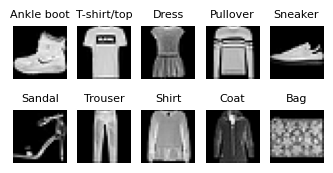

In [20]:
plotted, plot_no = [], 1
plt.figure(figsize=(4, 2))

# Initialize W&B run
wandb.init(project="backprop-from-scratch", name="plot_unique_labels")
for index, label in enumerate(train_labels): 

    if len(plotted) == len(set(train_labels)):
        break
        
    if label not in plotted: 
        plt.subplot(2, 5, plot_no)
        plt.imshow(train_images[index], cmap='grey')
        plotted.append(label)
        plt.title(f'{fashion_mnist_labels[label]}', fontsize=8)
        plt.axis("off")
        plot_no += 1

# getting the final figure
fig = plt.gcf()

#loggint the figure of wandb
wandb.log({"unique_labels_plot": wandb.Image(fig)})

plt.show()
wandb.finish()

### Question 2(10 Marks):

In [388]:
import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
            
    def predict_probability_distribution(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return neuron_outputs[-1]
    

In [393]:
# making the data ready to train the model

# Splitting the trainig data into train and validation
indices = np.arange(train_images.shape[0])
np.random.shuffle(indices)
train_size = 50000

train_x = train_images[indices[:train_size]]
train_y = train_labels[indices[:train_size]]
val_x = train_images[indices[train_size:]]
val_y = train_labels[indices[train_size:]]

train_x = train_x.reshape(train_x.shape[0], -1)
val_x = val_x.reshape(val_x.shape[0], -1)

# train_x.ravel()
# val_y.ravel()

# converting y's into one hot vector
num_classes = 10
train_y = np.eye(num_classes)[train_y]
val_y = np.eye(num_classes)[val_y]

# let's do it for test data as well
test_images = test_images.reshape(test_images.shape[0], -1)
test_labels = np.eye(num_classes)[test_labels]

In [395]:
# now let's create and train the network

# Edit the number of hidden layers and number of neurons form below list
layer_size = [784, 128, 64, 10] 
model = backprop_from_scratch(layer_size)

# now let's predict the probability distribution over the images
test_predictions = model.predict_probability_distribution(test_images) 
print(test_predictions)


[[0.06168792 0.10075537 0.03558735 ... 0.06398749 0.03049815 0.10467455]
 [0.07445819 0.11142469 0.04108252 ... 0.09940702 0.0298485  0.10449761]
 [0.07179087 0.13397358 0.04530227 ... 0.09630841 0.05370399 0.1049611 ]
 ...
 [0.07518774 0.08862722 0.03441221 ... 0.08850596 0.02593024 0.12750576]
 [0.08590609 0.14939869 0.05677292 ... 0.07607444 0.04345514 0.11763598]
 [0.09704804 0.08651904 0.0355858  ... 0.06684135 0.03228255 0.0989908 ]]


### Question 3(24 Marks):

##### Optimization algorithms to implement:

- **sgd:** make update with respect to a batch of the datapoints.
- **momentum based gradient descent:** will make an update using momentum at each step.
- **nestrov accelerated gradient descent:** why not to move a little based of momentum we've.
- **rms prop:** make learning rate inversly prop to expnentionally accumulating update histroy in that particular direction.
- **adam:** use the history and momentum, both the ideas together with a bias correction.
- **nadam:** add nestrov effect in adam.

#### vanila gradient descent



In [399]:
import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            # making an update
            self.weights[i] -= dw * learning_rate
            self.biases[i] -= db * learning_rate
        
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]
                neuron_outputs = self.forward_pass(batch_x)
                loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent numerical underflow
                total_loss += loss
                batch_num += 1
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)
    

In [401]:
# initializing hyperparms in wandb
wandb.init(project='vanilla_gradient_descent', 
           config={ 'Learning_rate' : 0.01, 
                    'epochs' : 50, 
                    'batch_size' : 32, 
                    'layer_size' : [784, 128, 64, 10]})

config.Learning_rate = 0.5
print(wandb.config)
config = wandb.config

# now let's create and train the network
model = backprop_from_scratch(config.layer_size)
# passing batch size = size of the data
model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size)


{'Learning_rate': 0.5, 'epochs': 2, 'batch_size': 32, 'layer_size': [784, 128, 64, 10], 'optimizer': 'Nadam'}
32
epoch: 0, train_loss:1.9701, val_accuracy: 0.2825


In [403]:
# now let's evaluate on the test set
test_predictions = model.predict(test_images) 
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
print(f"test_accuracy:{test_accuracy: .4f}") 
wandb.log({'test_accuracy': test_accuracy})

test_accuracy: 0.2850


#### momentum based sgd

In [150]:
# converted the same code for sgd for momentum sgd
 
import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # parameter of momentum
        self.beta = 0.90

    
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            # computing the momentum
            self.weights_velocity[i] = self.beta * self.weights_velocity[i] + dw
            self.bias_velocity[i] = self.beta * self.bias_velocity[i] + db

            # making an update
            self.weights[i] -= self.weights_velocity[i] * learning_rate
            self.biases[i] -= self.bias_velocity[i] * learning_rate

    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):

        weights_velocity, bias_velocity, beta = 0, 0, 0.95
        for epoch in range(epochs): 
            # First shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]
                neuron_outputs = self.forward_pass(batch_x)
                loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent numberical underflow
                total_loss += loss
                batch_num += 1
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)
    

In [152]:
# initializing hyperparms in wandb
wandb.init(project='backprop_scratch', 
           config={ 'Learning_rate' : 0.001, 
                    'epochs' : 50, 
                    'batch_size' : 32, 
                    'layer_size' : [784, 128, 64, 10],
                  'optimizer': ['sgd', 'momentum sgd'],
                  'beta': 0.90})

print(wandb.config)

config = wandb.config
config.Learning_rate = 0.001
config.batch_size = 32

# now let's create and train the network
model = backprop_from_scratch(config.layer_size)

model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size)



{'Learning_rate': 0.001, 'epochs': 50, 'batch_size': 32, 'layer_size': [784, 128, 64, 10]}
epoch: 0, train_loss:1.4112, val_accuracy: 0.7204
epoch: 1, train_loss:0.8460, val_accuracy: 0.7577
epoch: 2, train_loss:0.7022, val_accuracy: 0.7636
epoch: 3, train_loss:0.6540, val_accuracy: 0.7860
epoch: 4, train_loss:0.6333, val_accuracy: 0.7882
epoch: 5, train_loss:0.6228, val_accuracy: 0.7847
epoch: 6, train_loss:0.6147, val_accuracy: 0.7978
epoch: 7, train_loss:0.6110, val_accuracy: 0.7903
epoch: 8, train_loss:0.6089, val_accuracy: 0.7949
epoch: 9, train_loss:0.5990, val_accuracy: 0.7893
epoch: 10, train_loss:0.6107, val_accuracy: 0.7803
epoch: 11, train_loss:0.6105, val_accuracy: 0.7844
epoch: 12, train_loss:0.6037, val_accuracy: 0.7792
epoch: 13, train_loss:0.5969, val_accuracy: 0.7907
epoch: 14, train_loss:0.5965, val_accuracy: 0.7779
epoch: 15, train_loss:0.6075, val_accuracy: 0.7869
epoch: 16, train_loss:0.6169, val_accuracy: 0.7813
epoch: 17, train_loss:0.6178, val_accuracy: 0.7818
e

In [161]:
# now let's evaluate on the test set
test_predictions = model.predict(test_images) 
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
print(f"test_accuracy:{test_accuracy: .4f}") 
wandb.log({'test_accuracy': test_accuracy})

test_accuracy: 0.7657


#### NAG

In [225]:
# converted the same code for sgd for momentum sgd

import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # parameter of momentum
        self.beta = 0.90

    
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta * self.weights_velocity[i]) 
            + self.biases[i] - self.beta * self.bias_velocity[i] 
            
            h = self.sigmoid(a)
            neuron_outputs.append(h)
            
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta * self.weights_velocity[-1]) 
        + self.biases[-1] - self.beta * self.bias_velocity[-1]
        
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # Computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):

            # neuron_ouputs depend on the data, which we have computed in the forward pass
            # but delta will depend on on the weight matrices
    
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, (self.weights[i] - self.beta * self.weights_velocity[i]).T) * self.sigmoid_derivative(neuron_outputs[i])

            # computing the momentum
            self.weights_velocity[i] = self.beta * self.weights_velocity[i] + dw
            self.bias_velocity[i] = self.beta * self.bias_velocity[i] + db

            # making an update
            self.weights[i] -= self.weights_velocity[i] * learning_rate
            self.biases[i] -= self.bias_velocity[i] * learning_rate

    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):

        weights_velocity, bias_velocity, beta = 0, 0, 0.95
        for epoch in range(epochs): 
            # First shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]
                neuron_outputs = self.forward_pass(batch_x)
                loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent numberical underflow
                total_loss += loss
                batch_num += 1
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)
    

question is how are going to compute gradient exactly at a little bit farther distance in the direction of the momentum.

change: changed the values of biases and weights in forward function and backwork function and computed gradient at a little farther values of weights and bias.

In [227]:
# initializing hyperparms in wandb
wandb.init(project='backprop_scratch', 
           config={ 'Learning_rate' : 0.001, 
                    'epochs' : 50, 
                    'batch_size' : 32, 
                    'layer_size' : [784, 128, 64, 10],
                  'optimizer': ['sgd', 'momentum sgd'],
                  'beta': 0.90})

print(wandb.config)

config = wandb.config

config.batch_size = 32
config.Learning_rate = 0.001

# now let's create and train the network
model = backprop_from_scratch(config.layer_size)

model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size)



{'Learning_rate': 0.5, 'epochs': 50, 'batch_size': 50000, 'layer_size': [784, 128, 64, 10]}
epoch: 0, train_loss:2.3683, val_accuracy: 0.1048
epoch: 1, train_loss:2.4912, val_accuracy: 0.1685
epoch: 2, train_loss:2.4400, val_accuracy: 0.3565
epoch: 3, train_loss:2.1617, val_accuracy: 0.2881
epoch: 4, train_loss:1.8930, val_accuracy: 0.4710
epoch: 5, train_loss:1.6833, val_accuracy: 0.4729
epoch: 6, train_loss:1.5278, val_accuracy: 0.5347
epoch: 7, train_loss:1.4153, val_accuracy: 0.5876
epoch: 8, train_loss:1.3095, val_accuracy: 0.6184
epoch: 9, train_loss:1.2220, val_accuracy: 0.6249
epoch: 10, train_loss:1.1707, val_accuracy: 0.5311
epoch: 11, train_loss:1.1606, val_accuracy: 0.5211
epoch: 12, train_loss:1.2205, val_accuracy: 0.4909
epoch: 13, train_loss:1.2194, val_accuracy: 0.4563
epoch: 14, train_loss:1.2705, val_accuracy: 0.5441
epoch: 15, train_loss:1.1652, val_accuracy: 0.4732
epoch: 16, train_loss:1.1547, val_accuracy: 0.5209
epoch: 17, train_loss:1.3940, val_accuracy: 0.4661


In [229]:
# now let's evaluate on the test set
test_predictions = model.predict(test_images) 
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
print(f"test_accuracy:{test_accuracy: .4f}") 
wandb.log({'test_accuracy': test_accuracy})

test_accuracy: 0.7432


#### RMS prop 

In [269]:
import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
         # delarin and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        self.beta = 0.9
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
            self.history_weights[i] = self.beta * self.history_weights[i] + (1 - self.beta) * (dw ** 2)
            self.history_bias[i] = self.beta * self.history_bias[i] + (1 - self.beta) * (db ** 2) 
            self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
            self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12) 
        
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]
                neuron_outputs = self.forward_pass(batch_x)
                loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent numerical underflow
                total_loss += loss
                batch_num += 1
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)



In [271]:
# initializing hyperparms in wandb
wandb.init(project='backprop_scratch', 
           config={ 'Learning_rate' : 0.001, 
                    'epochs' : 50, 
                    'batch_size' : 32, 
                    'layer_size' : [784, 128, 64, 10],
                  'optimizer': ['sgd', 'momentum sgd'],
                  'beta': 0.90})

config.batch_size = 32
config.Learning_rate = 0.001
print(wandb.config)

config = wandb.config

# now let's create and train the network
model = backprop_from_scratch(config.layer_size)

model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size)


{'Learning_rate': 0.001, 'epochs': 50, 'batch_size': 32, 'layer_size': [784, 128, 64, 10]}
epoch: 0, train_loss:0.8116, val_accuracy: 0.7628
epoch: 1, train_loss:0.5895, val_accuracy: 0.8105
epoch: 2, train_loss:0.5571, val_accuracy: 0.8000
epoch: 3, train_loss:0.5324, val_accuracy: 0.8177
epoch: 4, train_loss:0.5195, val_accuracy: 0.8128
epoch: 5, train_loss:0.5058, val_accuracy: 0.8126
epoch: 6, train_loss:0.5011, val_accuracy: 0.8194
epoch: 7, train_loss:0.4904, val_accuracy: 0.8261
epoch: 8, train_loss:0.4851, val_accuracy: 0.8239
epoch: 9, train_loss:0.4759, val_accuracy: 0.8340
epoch: 10, train_loss:0.4758, val_accuracy: 0.8304
epoch: 11, train_loss:0.4664, val_accuracy: 0.8332
epoch: 12, train_loss:0.4657, val_accuracy: 0.8224
epoch: 13, train_loss:0.4661, val_accuracy: 0.8308
epoch: 14, train_loss:0.4646, val_accuracy: 0.8301
epoch: 15, train_loss:0.4580, val_accuracy: 0.8369
epoch: 16, train_loss:0.4540, val_accuracy: 0.8397
epoch: 17, train_loss:0.4560, val_accuracy: 0.8390
e

In [276]:
# now let's evaluate on the test set
test_predictions = model.predict(test_images) 
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
print(f"test_accuracy:{test_accuracy: .4f}") 
wandb.log({'test_accuracy': test_accuracy})

test_accuracy: 0.8374


#### adam

we have both momentum and history terms here in update rule, kind of incorporating the both ideas from momentum and RMS prop

In [289]:
import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
         # delarin and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            # adding the momentum
            self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
            self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
            
            # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
            self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
            self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 

            # implementing the adam rule for update with bias corrected
            self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
            self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
        
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]
                neuron_outputs = self.forward_pass(batch_x)
                loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent numerical underflow
                total_loss += loss
                batch_num += 1
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)



In [291]:
# initializing hyperparms in wandb
wandb.init(project='backprop_scratch', 
           config={ 'Learning_rate' : 0.001, 
                    'epochs' : 50, 
                    'batch_size' : 32, 
                    'layer_size' : [784, 128, 64, 10],
                  'optimizer': ['sgd', 'momentum sgd'],
                  'beta': 0.90})

config.batch_size = 32
config.Learning_rate = 0.001
print(wandb.config)

config = wandb.config

# now let's create and train the network
model = backprop_from_scratch(config.layer_size)

model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size)


{'Learning_rate': 0.001, 'epochs': 50, 'batch_size': 32, 'layer_size': [784, 128, 64, 10]}
epoch: 0, train_loss:0.9571, val_accuracy: 0.7083
epoch: 1, train_loss:0.7377, val_accuracy: 0.7421
epoch: 2, train_loss:0.7018, val_accuracy: 0.7159
epoch: 3, train_loss:0.6930, val_accuracy: 0.7339
epoch: 4, train_loss:0.6586, val_accuracy: 0.7374
epoch: 5, train_loss:0.6810, val_accuracy: 0.7373
epoch: 6, train_loss:0.6546, val_accuracy: 0.7668
epoch: 7, train_loss:0.6588, val_accuracy: 0.7540
epoch: 8, train_loss:0.6340, val_accuracy: 0.7455
epoch: 9, train_loss:0.6450, val_accuracy: 0.7700
epoch: 10, train_loss:0.6362, val_accuracy: 0.7362
epoch: 11, train_loss:0.6525, val_accuracy: 0.7618
epoch: 12, train_loss:0.6404, val_accuracy: 0.7488
epoch: 13, train_loss:0.6395, val_accuracy: 0.7360
epoch: 14, train_loss:0.6179, val_accuracy: 0.7809
epoch: 15, train_loss:0.5981, val_accuracy: 0.7725
epoch: 16, train_loss:0.6150, val_accuracy: 0.7625
epoch: 17, train_loss:0.6226, val_accuracy: 0.7868
e

In [292]:
# now let's evaluate on the test set
test_predictions = model.predict(test_images) 
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
print(f"test_accuracy:{test_accuracy: .4f}") 
wandb.log({'test_accuracy': test_accuracy})

test_accuracy: 0.8011


#### nadam

there is a little change in adam, we just need to change the bias corrected momentum term.

In [305]:
import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
         # delarin and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            # adding the momentum
            self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
            self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
            
            # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
            self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
            self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
            
            # implementing the nadam rule for update with bias corrected
            self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
            self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
        
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]
                neuron_outputs = self.forward_pass(batch_x)
                loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent num underflow
                total_loss += loss
                batch_num += 1
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)



In [307]:
# initializing hyperparms in wandb
wandb.init(project='backprop_scratch', 
           config={ 'Learning_rate' : 0.001, 
                    'epochs' : 50, 
                    'batch_size' : 32, 
                    'layer_size' : [784, 128, 64, 10],
                  'optimizer': ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam'],
                  'beta': 0.90})

config.batch_size = 32
config.Learning_rate = 0.001
print(wandb.config)

config = wandb.config

# now let's create and train the network
model = backprop_from_scratch(config.layer_size)

model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size)


{'Learning_rate': 0.001, 'epochs': 50, 'batch_size': 32, 'layer_size': [784, 128, 64, 10]}
epoch: 0, train_loss:0.9505, val_accuracy: 0.6881
epoch: 1, train_loss:0.7208, val_accuracy: 0.7190
epoch: 2, train_loss:0.7140, val_accuracy: 0.7253
epoch: 3, train_loss:0.7019, val_accuracy: 0.7474
epoch: 4, train_loss:0.6932, val_accuracy: 0.7219
epoch: 5, train_loss:0.6906, val_accuracy: 0.7432
epoch: 6, train_loss:0.6686, val_accuracy: 0.7378
epoch: 7, train_loss:0.6739, val_accuracy: 0.7520
epoch: 8, train_loss:0.6461, val_accuracy: 0.7461
epoch: 9, train_loss:0.6465, val_accuracy: 0.7479
epoch: 10, train_loss:0.6472, val_accuracy: 0.7699
epoch: 11, train_loss:0.6330, val_accuracy: 0.7483
epoch: 12, train_loss:0.6443, val_accuracy: 0.7632
epoch: 13, train_loss:0.6240, val_accuracy: 0.7578
epoch: 14, train_loss:0.6208, val_accuracy: 0.7502
epoch: 15, train_loss:0.6359, val_accuracy: 0.7490
epoch: 16, train_loss:0.6163, val_accuracy: 0.7637
epoch: 17, train_loss:0.6059, val_accuracy: 0.7439
e

In [308]:
# now let's evaluate on the test set
test_predictions = model.predict(test_images) 
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
print(f"test_accuracy:{test_accuracy: .4f}") 
wandb.log({'test_accuracy': test_accuracy})

test_accuracy: 0.7904


#### writing all the optimization algos in one implementation:

In [421]:
import numpy as np 

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
         # delarin and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    
    def forward_pass_NAG(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i]) 
            + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
            
            h = self.sigmoid(a)
            neuron_outputs.append(h)
            
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1]) 
        + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
        
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs

    
    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            if optimizer == 'sgd':

                # making an update
                self.weights[i] -= dw * learning_rate
                self.biases[i] -= db * learning_rate

                
            elif optimizer == 'momentum sgd':
                
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
        
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate

            elif optimizer == 'RMS_Prop':
                
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)

            elif optimizer == 'Adam':
                
                # adding the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
    
                # implementing the adam rule for update with bias corrected
                self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 

            elif optimizer == 'Nadam':
                
                # adding the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
    
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                
                # implementing the nadam rule for update with bias corrected
                self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 

    # if optmizer is NAG
    def backword_pass_NAG(self, X, y, neuron_outputs, learning_rate):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # Computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):

            # neuron_ouputs depend on the data, which we have computed in the forward pass
            # but delta will depend on on the weight matrices
    
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i]).T) * self.sigmoid_derivative(neuron_outputs[i])

            # computing the momentum
            self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
            self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db

            # making an update
            self.weights[i] -= self.weights_velocity[i] * learning_rate
            self.biases[i] -= self.bias_velocity[i] * learning_rate
            
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size, optimizer):
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                if optimizer != 'NAG':
                    neuron_outputs = self.forward_pass(batch_x)
                else: 
                    neuron_outputs = self.forward_pass_NAG(batch_x)
                    
                loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent num underflow
                total_loss += loss
                batch_num += 1
                
                if optimizer != 'NAG':
                    self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer)
                else: 
                    self.backword_pass_NAG(batch_x, batch_y, neuron_outputs, learning_rate)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)



In [423]:
# initializing hyperparms in wandb
wandb.init(project='backprop_scratch', 
           config={ 'Learning_rate' : 0.001, 
                    'epochs' : 50, 
                    'batch_size' : 32, 
                    'layer_size' : [784, 128, 64, 10],
                  'optimizer': 'NAG',
                  'beta': 0.90})

optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
config = wandb.config
config.Learning_rate = 0.001
config.optimizer = 'sgd'
config.epochs = 10
print(wandb.config)

# now let's create and train the network
model = backprop_from_scratch(config.layer_size)
model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size, config.optimizer)


{'Learning_rate': 0.001, 'epochs': 10, 'batch_size': 32, 'layer_size': [784, 128, 64, 10], 'optimizer': 'sgd'}
epoch: 0, train_loss:2.1310, val_accuracy: 0.5757
epoch: 1, train_loss:1.7980, val_accuracy: 0.6261
epoch: 2, train_loss:1.5951, val_accuracy: 0.6426
epoch: 3, train_loss:1.4327, val_accuracy: 0.6549
epoch: 4, train_loss:1.2992, val_accuracy: 0.6731
epoch: 5, train_loss:1.1915, val_accuracy: 0.6900
epoch: 6, train_loss:1.1041, val_accuracy: 0.7048
epoch: 7, train_loss:1.0335, val_accuracy: 0.7148
epoch: 8, train_loss:0.9741, val_accuracy: 0.7309
epoch: 9, train_loss:0.9247, val_accuracy: 0.7456


In [414]:
# now let's evaluate on the test set
test_predictions = model.predict(test_images) 
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
print(f"test_accuracy:{test_accuracy: .4f}") 
wandb.log({'test_accuracy': test_accuracy})

test_accuracy: 0.8150


### Question 4:(10 Marks):

- further work make the code work from command promt and training logs should be visible wandb meanwhile its traning.
- quesiton 4 requires you to implement with different regularization/activation/initializatin and make it flexible.
- required you to implement the code with loss squred error.
- and to run a lot of experiments.

##### made the code flexible for MSE

In [489]:
import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
         # delarin and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
     
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs


    def forward_pass_NAG(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i]) 
            + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
            
            h = self.sigmoid(a)
            neuron_outputs.append(h)
            
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1]) 
        + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
        
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs


    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':   
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            if optimizer == 'sgd':

                # making an update
                self.weights[i] -= dw * learning_rate
                self.biases[i] -= db * learning_rate

                
            elif optimizer == 'momentum sgd':
                
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
        
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate

            elif optimizer == 'RMS_Prop':
                
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)

            elif optimizer == 'Adam':
                
                # adding the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
    
                # implementing the adam rule for update with bias corrected
                self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 

            elif optimizer == 'Nadam':
                
                # adding the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
    
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                
                # implementing the nadam rule for update with bias corrected
                self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 

    # if optmizer is NAG
    def backword_pass_NAG(self, X, y, neuron_outputs, learning_rate):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # Computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):

            # neuron_ouputs depend on the data, which we have computed in the forward pass
            # but delta will depend on on the weight matrices
    
            dw = np.dot(neuron_outputs[i].T, delta) / batch_size
            db = np.sum(delta, axis=0, keepdims=True) / batch_size
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i]).T) * self.sigmoid_derivative(neuron_outputs[i])

            # computing the momentum
            self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
            self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db

            # making an update
            self.weights[i] -= self.weights_velocity[i] * learning_rate
            self.biases[i] -= self.bias_velocity[i] * learning_rate
            
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="RMS_Prop", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                if optimizer != 'NAG':
                    neuron_outputs = self.forward_pass(batch_x)
                else: 
                    neuron_outputs = self.forward_pass_NAG(batch_x)
                    
                if loss_function == 'categorical_cross_entropy':
                  loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) # to prevent num underflow
                else:
                  loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                if optimizer != 'NAG':
                    self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function)
                else: 
                    self.backword_pass_NAG(batch_x, batch_y, neuron_outputs, learning_rate)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)


if __name__ == "__main__": # will run only when script will be executed directly
    
    wandb.login()
    # will check first which data is given in the arguement, yet to do that
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # making the data ready to train the model

    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = 50000

    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1)
    val_x = val_x.reshape(val_x.shape[0], -1)


    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1)
    test_labels = np.eye(num_classes)[test_labels]

    # initializing hyperparms in wandb
    optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    loss = ['mean_squared', 'categorical_cross_entropy']
    
    wandb.init(project='backprop_scratch', 
            config={ 'Learning_rate' : 0.001, 
                        'epochs' : 50, 
                        'batch_size' : 32, 
                        'layer_size' : [784, 128, 64, 10], 
                    'optimizer': 'RMS_Prop',
                    'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
                    'beta_2': 0.999,
                   'loss_function': 'mean_squared'}         # use beta 2 for Nadam and Adam
            ) # select optimizer from optimizer list up there 

    config.beta_1 = 0.900
    config.beta_2 = 0.999
    config.epochs = 50
    config.loss_function = 'mean_squared'
    
    config = wandb.config
    print(wandb.config)

    # now let's create and train the network
    model = backprop_from_scratch(config.layer_size)
    model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size, config.optimizer, config.beta_1, config.beta_2, config.loss_function)

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})


SyntaxError: invalid syntax (2059849918.py, line 121)

##### incorporated weight decay

In [28]:
import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
         # delarin and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
     
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
            
    def forward_pass(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
            h = self.sigmoid(a)
            neuron_outputs.append(h)
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs


    def forward_pass_NAG(self, data_X):
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        for i in range(self.num_layers - 2): 
            
            # print("ran")
            # print(neuron_outputs[-1].shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)
            
            a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i]) 
            + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
            
            h = self.sigmoid(a)
            neuron_outputs.append(h)
            
        # pass thorugh the output layer
        a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1]) 
        + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
        
        output = self.softmax(a)
        neuron_outputs.append(output)
        return neuron_outputs


    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 
        
        
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':   
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):
            
            dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
            db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])

            if optimizer == 'sgd':

                # making an update
                self.weights[i] -= dw * learning_rate
                self.biases[i] -= db * learning_rate

                
            elif optimizer == 'momentum sgd':
                
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
        
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate

            elif optimizer == 'RMS_Prop':
                
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)

            elif optimizer == 'Adam':
                
                # adding the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
    
                # implementing the adam rule for update with bias corrected
                self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 

            elif optimizer == 'Nadam':
                
                # adding the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
    
                # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                
                # implementing the nadam rule for update with bias corrected
                self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 

    # if optmizer is NAG
    def backword_pass_NAG(self, X, y, neuron_outputs, learning_rate, weight_decay):
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # Computing gradies with repect to the output layer 
        delta = neuron_outputs[-1] - y
        
        # computing gradient with respect to hidden layers
        for i in range(self.num_layers - 2, -1, -1):

            # neuron_ouputs depend on the data, which we have computed in the forward pass
            # but delta will depend on on the weight matrices
            
            dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
            db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
            
            if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i]).T) * self.sigmoid_derivative(neuron_outputs[i])

            # computing the momentum
            self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
            self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db

            # making an update
            self.weights[i] -= self.weights_velocity[i] * learning_rate
            self.biases[i] -= self.bias_velocity[i] * learning_rate
            
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="RMS_Prop", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                if optimizer != 'NAG':
                    neuron_outputs = self.forward_pass(batch_x)
                else: 
                    neuron_outputs = self.forward_pass_NAG(batch_x)

                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2)
                    
                l2_norm_params = l2_norm_bias + l2_norm_weights
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                if optimizer != 'NAG':
                    self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
                else: 
                    self.backword_pass_NAG(batch_x, batch_y, neuron_outputs, learning_rate, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)


if __name__ == "__main__": # will run only when script will be executed directly
    
    wandb.login()
    # will check first which data is given in the arguement, yet to do that
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # making the data ready to train the model

    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = 50000

    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1)
    val_x = val_x.reshape(val_x.shape[0], -1)


    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1)
    test_labels = np.eye(num_classes)[test_labels]

    # initializing hyperparms in wandb
    optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    loss = ['mean_squared', 'categorical_cross_entropy']
    
    wandb.init(project='backprop_scratch', 
            config={ 'Learning_rate' : 0.001, 
                        'epochs' : 50, 
                        'batch_size' : 32, 
                        'layer_size' : [784, 128, 64, 10], 
                    'optimizer': 'RMS_Prop',
                    'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
                    'beta_2': 0.999,         # use beta 2 for Nadam and Adam
                   'loss_function': 'mean_squared',
                    'weight_decay': 0
                   }         
            ) # select optimizer from optimizer list up there 

    config.beta_1 = 0.900
    config.beta_2 = 0.999
    config.epochs = 10
    config.loss_function = 'mean_squared'
    config.weight_decay = 0
    config.optimizer = 'NAG'
    config = wandb.config
    print(wandb.config)

    # now let's create and train the network
    model = backprop_from_scratch(config.layer_size)
    model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size, config.optimizer, config.beta_1, config.beta_2, config.loss_function, config.weight_decay)

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


{'Learning_rate': 0.01, 'epochs': 10, 'batch_size': 32, 'layer_size': [784, 128, 64, 10], 'optimizer': 'NAG', 'beta_1': 0.9, 'beta_2': 0.999, 'loss_function': 'mean_squared', 'weight_decay': 0, 'activation_function': 'ReLu'}
epoch: 0, train_loss:0.7511, val_accuracy: 0.5813
epoch: 1, train_loss:0.6660, val_accuracy: 0.5437
epoch: 2, train_loss:0.6414, val_accuracy: 0.5095
epoch: 3, train_loss:0.6419, val_accuracy: 0.4708
epoch: 4, train_loss:0.6066, val_accuracy: 0.5809
epoch: 5, train_loss:0.5855, val_accuracy: 0.5081
epoch: 6, train_loss:0.5675, val_accuracy: 0.5943
epoch: 7, train_loss:0.5773, val_accuracy: 0.5120
epoch: 8, train_loss:0.5350, val_accuracy: 0.4476
epoch: 9, train_loss:0.5264, val_accuracy: 0.5290
test_accuracy: 0.5349


##### fixed some bugs: 1) Made single function for nestrov as well, 2) Corrected inferencing for nestrov

In [61]:
import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size):
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.initialize_params()
        
         # delarin and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
     
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2/self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
            
    def forward_pass(self, data_X, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
                
                # print("ran")
                # print(neuron_outputs[-1].shape)
                # print(self.weights[i].shape)
                # print(self.biases[i].shape)
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                h = self.sigmoid(a)
                neuron_outputs.append(h)
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
            
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 
                
                # print("ran")
                # print(neuron_outputs[-1].shape)
                # print(self.weights[i].shape)
                # print(self.biases[i].shape)
                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i]) 
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                h = self.sigmoid(a)
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1]) 
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
            


    # def forward_pass_NAG(self, data_X):
    #     neuron_outputs = [data_X]
    #     # pass thorugh hidden layers

        
    #     for i in range(self.num_layers - 2): 
            
    #         # print("ran")
    #         # print(neuron_outputs[-1].shape)
    #         # print(self.weights[i].shape)
    #         # print(self.biases[i].shape)
            
    #         a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i]) 
    #         + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
            
    #         h = self.sigmoid(a)
    #         neuron_outputs.append(h)
            
    #     # pass thorugh the output layer
    #     a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1]) 
    #     + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
        
    #     output = self.softmax(a)
    #     neuron_outputs.append(output)
    #     return neuron_outputs


    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return max(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - np.tanh(x) ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':   
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
    
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i]).T) * self.sigmoid_derivative(neuron_outputs[i])
    
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # # if optmizer is NAG
    # def backword_pass_NAG(self, X, y, neuron_outputs, learning_rate, weight_decay):
        
    #     # compute the gradient at given value of params
    #     batch_size = len(X)
        
    #     # Computing gradies with repect to the output layer 
    #     delta = neuron_outputs[-1] - y
        
    #     # computing gradient with respect to hidden layers
    #     for i in range(self.num_layers - 2, -1, -1):

    #         # neuron_ouputs depend on the data, which we have computed in the forward pass
    #         # but delta will depend on on the weight matrices
            
    #         dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
    #         db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
            
    #         if i>0: # because computing delta for i=0 will be absolutely un-necessary.
    #             delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i]).T) * self.sigmoid_derivative(neuron_outputs[i])

    #         # computing the momentum
    #         self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
    #         self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db

    #         # making an update
    #         self.weights[i] -= self.weights_velocity[i] * learning_rate
    #         self.biases[i] -= self.bias_velocity[i] * learning_rate
        
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs): 
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, optimizer)

                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2)
                    
                l2_norm_params = l2_norm_bias + l2_norm_weights
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
            
    def predict(self, X): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X)
        return np.argmax(neuron_outputs[-1], axis=1)


if __name__ == "__main__": # will run only when script will be executed directly
    
    wandb.login()
    # will check first which data is given in the arguement, yet to do that
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # making the data ready to train the model

    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = 50000

    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255


    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # initializing hyperparms in wandb
    optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    loss = ['mean_squared', 'categorical_cross_entropy']
    activation_function = ['ReLu', 'Sigmoid', 'Linear', 'tanh']
    
    wandb.init(project='backprop_scratch', 
            config={ 'Learning_rate' : 0.001, 
                        'epochs' : 50, 
                        'batch_size' : 32, 
                        'layer_size' : [784, 128, 64, 10], 
                    'optimizer': 'RMS_Prop',
                    'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
                    'beta_2': 0.999,         # use beta 2 for Nadam and Adam
                   'loss_function': 'mean_squared',
                    'weight_decay': 0,
                    'activation_function': 'ReLu'
                   }         
            ) # select optimizer from optimizer list up there 
    
    config = wandb.config
    config.beta_1 = 0.900
    config.beta_2 = 0.999
    config.epochs = 10
    config.loss_function = 'categorical_cross_entropy'
    config.weight_decay = 0
    config.optimizer = 'NAG'
    config.Learning_rate = 0.001
    print(wandb.config)

    # now let's create and train the network
    model = backprop_from_scratch(config.layer_size)
    model.train(train_x, train_y, val_x, val_y, config.epochs, config.Learning_rate, config.batch_size, config.optimizer, config.beta_1, config.beta_2, config.loss_function, config.weight_decay, config.activation_function)
    # now let's evaluate on the test set
    test_predictions = model.predict(test_images) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


{'Learning_rate': 0.001, 'epochs': 10, 'batch_size': 32, 'layer_size': [784, 128, 64, 10], 'optimizer': 'NAG', 'beta_1': 0.9, 'beta_2': 0.999, 'loss_function': 'categorical_cross_entropy', 'weight_decay': 0, 'activation_function': 'ReLu', 'initialization': 'xavier', 'activation': 'ReLu'}
epoch: 0, train_loss:1.7924, val_accuracy: 0.5953
epoch: 1, train_loss:1.3727, val_accuracy: 0.6759
epoch: 2, train_loss:1.1526, val_accuracy: 0.7124
epoch: 3, train_loss:1.0215, val_accuracy: 0.7294
epoch: 4, train_loss:0.9282, val_accuracy: 0.7382
epoch: 5, train_loss:0.8694, val_accuracy: 0.7438
epoch: 6, train_loss:0.8218, val_accuracy: 0.7486
epoch: 7, train_loss:0.7924, val_accuracy: 0.7520
epoch: 8, train_loss:0.7625, val_accuracy: 0.7581
epoch: 9, train_loss:0.7448, val_accuracy: 0.7645
test_accuracy: 0.7554


### Question:4(10 Marks)

In [2]:
import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2) 
                l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

def sweep_train():

    wandb.init()
    config = wandb.config

    sweep_name = f"hl_{config.hidden_num}_bs_{config.batch_size}_ac_{config.activation_function}"
    wandb.run.name = sweep_name
    
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # to reproduce the results
    # np.random.seed(10)
    
    # making the data ready to train the model
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = 0.9 * len(train_images) # usnig 
    
    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # now let's create and train the network
    model = backprop_from_scratch([784] + [config.hidden_size] * config.hidden_num + [10], 
                                  config.activation_function, 
                                  config.initialization)
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config.epochs, 
                config.Learning_rate, 
                config.batch_size, 
                config.optimizer, 
                config.beta_1, 
                config.beta_2, 
                config.loss_function, 
                config.weight_decay, 
                config.activation_function
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config.Learning_rate) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})

# sweep configs
sweep_configurations = {
    "method": "random", 
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5, 10]},
        "hidden_num": {"values": [3, 4, 5]},
        "hidden_size": {"values": [32, 64, 128]},
        "weight_decay": {"values": [0.0, 0.0005, 0.5]},
        "Learning_rate": {"values": [1e-3, 1e-4]},
        "optimizer": {"values": ["sgd", "momentum sgd", "NAG", "RMS_Prop", "Adam", "Nadam"]},
        "batch_size": {"values": [16, 32, 64]},
        "initialization": {"values": ["random", "xavier"]},
        "activation_function": {"values": ["Sigmoid", "tanh", "ReLu"]},
        "beta_1": {"values": [0.90]},
        "beta_2": {"values": [0.99]},
        "loss_function": {"values": ['categorical_cross_entropy', 'mean_squared']}
    }
}



    #-----------------------------------------------------------------------------------------------------

    
    # initializing hyperparms in wandb

    # epochs = [5, 10]
    # hidden_num = [3, 4, 5]
    # hidden_size = [32, 64, 128]
    # weight_decay = [0, 0.0005, 0.5]
    # Learning_rate = [1e-3, 1e-4]
    # optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    # batch_size = [16, 32, 64]
    # initialization = ['xavier', 'random'] # introduced xavier and random initialization
    # activation_function = ['ReLu', 'Sigmoid', 'Linear', 'tanh']
    # loss = ['mean_squared', 'categorical_cross_entropy']

    
    
    
    # wandb.init(project='backprop_scratch', 
    #         config={ 'Learning_rate' : 0.001, 
    #                     'epochs' : 50, 
    #                     'batch_size' : 32, 
    #                     'layer_size' : [784, 64, 64, 10], 
    #                 'optimizer': 'RMS_Prop',
    #                 'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
    #                 'beta_2': 0.999,         # use beta 2 for Nadam and Adam
    #                'loss_function': 'mean_squared',
    #                 'weight_decay': 0,
    #                 'activation_function': 'ReLu',
    #                 'initialization': 'random'
    #                }         
    #         )

    # config.hidden_size = 64
    # config.hidden_num = 2
    # config.layer_size = [784] + [config.hidden_size] * config.hidden_num + [10]
    # config.beta_1 = 0.900
    # config.beta_2 = 0.999
    # config.epochs = 2
    # config.loss_function = 'categorical_cross_entropy'
    # config.weight_decay = 0
    # config.optimizer = 'NAG'
    # config.Learning_rate = 0.01
    # config.activation_function = 'ReLu'
    # config.initialization = 'xavier'
    # config.batch_size = 32
    
    # config = wandb.config
    # print(wandb.config)


# executing sweep
if __name__ == "__main__":
    # Creating a sweep
    sweep_id = wandb.sweep(sweep_configurations, project="Question_4")
    # starting sweep agent
    wandb.agent(sweep_id, function=sweep_train)
    


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: af2kokvi
Sweep URL: https://wandb.ai/da24s006-indian-institue-of-technology-madras-/Question_4/sweeps/af2kokvi


wandb: Agent Starting Run: wnf40v1u with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005
wandb: Currently logged in as: da24s006 (da24s006-indian-institue-of-technology-madras-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


epoch: 0, train_loss:0.9314, val_accuracy: 0.0980
epoch: 1, train_loss:0.9153, val_accuracy: 0.1942
epoch: 2, train_loss:0.9041, val_accuracy: 0.1959
epoch: 3, train_loss:0.8729, val_accuracy: 0.1986
epoch: 4, train_loss:0.8438, val_accuracy: 0.2652
epoch: 5, train_loss:0.8257, val_accuracy: 0.3114
epoch: 6, train_loss:0.8091, val_accuracy: 0.2965
epoch: 7, train_loss:0.7912, val_accuracy: 0.3618
epoch: 8, train_loss:0.7729, val_accuracy: 0.4153
epoch: 9, train_loss:0.7559, val_accuracy: 0.4343
test_accuracy: 0.4351


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▇▆▅▄▃▂▂▁
val_accuracy,▁▃▃▃▄▅▅▆██
epoch,9
test_accuracy,0.4351
train_loss,0.75592
val_accuracy,0.4343


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4o3r47xo with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:20.7898, val_accuracy: 0.5324
epoch: 1, train_loss:17.3620, val_accuracy: 0.5825
epoch: 2, train_loss:16.4462, val_accuracy: 0.5893
epoch: 3, train_loss:15.9647, val_accuracy: 0.6345
epoch: 4, train_loss:15.6998, val_accuracy: 0.6376
epoch: 5, train_loss:15.4943, val_accuracy: 0.6224
epoch: 6, train_loss:15.3556, val_accuracy: 0.6733
epoch: 7, train_loss:15.2368, val_accuracy: 0.6615
epoch: 8, train_loss:15.1435, val_accuracy: 0.6515
epoch: 9, train_loss:15.0557, val_accuracy: 0.6610
test_accuracy: 0.6545


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▄▆▆▅█▇▇▇
epoch,9
test_accuracy,0.6545
train_loss,15.05567
val_accuracy,0.661


wandb: Agent Starting Run: bq0wde6l with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:24.3435, val_accuracy: 0.0980
epoch: 1, train_loss:11.6134, val_accuracy: 0.0980
epoch: 2, train_loss:5.7982, val_accuracy: 0.0980
epoch: 3, train_loss:3.1397, val_accuracy: 0.0980
epoch: 4, train_loss:1.9242, val_accuracy: 0.0980
epoch: 5, train_loss:1.3684, val_accuracy: 0.0980
epoch: 6, train_loss:1.1142, val_accuracy: 0.0980
epoch: 7, train_loss:0.9980, val_accuracy: 0.0980
epoch: 8, train_loss:0.9448, val_accuracy: 0.0980
epoch: 9, train_loss:0.9205, val_accuracy: 0.0980
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▂▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,0.92049
val_accuracy,0.098


wandb: Agent Starting Run: ev1fq8qh with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:10376.0030, val_accuracy: 0.1386
epoch: 1, train_loss:449.9916, val_accuracy: 0.1033
epoch: 2, train_loss:20.3382, val_accuracy: 0.0949
epoch: 3, train_loss:1.7414, val_accuracy: 0.0980
epoch: 4, train_loss:0.9364, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▂▁▁▁
epoch,4
test_accuracy,0.1
train_loss,0.93644
val_accuracy,0.0949


wandb: Agent Starting Run: lkebpau2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5871, val_accuracy: 0.7221
epoch: 1, train_loss:0.3736, val_accuracy: 0.8209
epoch: 2, train_loss:0.3036, val_accuracy: 0.8262
epoch: 3, train_loss:0.2798, val_accuracy: 0.8421
epoch: 4, train_loss:0.2669, val_accuracy: 0.8427
epoch: 5, train_loss:0.2580, val_accuracy: 0.8469
epoch: 6, train_loss:0.2514, val_accuracy: 0.8472
epoch: 7, train_loss:0.2460, val_accuracy: 0.8524
epoch: 8, train_loss:0.2416, val_accuracy: 0.8573
epoch: 9, train_loss:0.2371, val_accuracy: 0.8530
test_accuracy: 0.8482


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▆▆▇▇▇▇███
epoch,9
test_accuracy,0.8482
train_loss,0.23709
val_accuracy,0.853


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8i13blvw with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7105, val_accuracy: 0.1136
epoch: 1, train_loss:1.7891, val_accuracy: 0.0982
epoch: 2, train_loss:1.7990, val_accuracy: 0.0982
epoch: 3, train_loss:1.7989, val_accuracy: 0.0982
epoch: 4, train_loss:1.7989, val_accuracy: 0.0982
epoch: 5, train_loss:1.7989, val_accuracy: 0.0982
epoch: 6, train_loss:1.7990, val_accuracy: 0.0982
epoch: 7, train_loss:1.7989, val_accuracy: 0.0982
epoch: 8, train_loss:1.7990, val_accuracy: 0.0982
epoch: 9, train_loss:1.7989, val_accuracy: 0.0982
test_accuracy: 0.1001


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,▁▇████████
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1001
train_loss,1.79894
val_accuracy,0.0982


wandb: Agent Starting Run: mkv21nzg with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:4.5746, val_accuracy: 0.8013
epoch: 1, train_loss:2.0734, val_accuracy: 0.8270
epoch: 2, train_loss:1.4376, val_accuracy: 0.8442
epoch: 3, train_loss:1.1245, val_accuracy: 0.8514
epoch: 4, train_loss:0.9515, val_accuracy: 0.8510
test_accuracy: 0.8468


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.8468
train_loss,0.9515
val_accuracy,0.851


wandb: Agent Starting Run: 1cpwfju5 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8021, val_accuracy: 0.5555
epoch: 1, train_loss:0.5400, val_accuracy: 0.7055
epoch: 2, train_loss:0.3963, val_accuracy: 0.7490
epoch: 3, train_loss:0.3376, val_accuracy: 0.7793
epoch: 4, train_loss:0.3029, val_accuracy: 0.8001
epoch: 5, train_loss:0.2788, val_accuracy: 0.8163
epoch: 6, train_loss:0.2613, val_accuracy: 0.8248
epoch: 7, train_loss:0.2487, val_accuracy: 0.8270
epoch: 8, train_loss:0.2399, val_accuracy: 0.8351
epoch: 9, train_loss:0.2326, val_accuracy: 0.8367
test_accuracy: 0.8301


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▃▂▂▂▁▁▁▁
val_accuracy,▁▅▆▇▇▇████
epoch,9
test_accuracy,0.8301
train_loss,0.23263
val_accuracy,0.8367


wandb: Agent Starting Run: qfnzltqa with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:456.0727, val_accuracy: 0.0980
epoch: 1, train_loss:2.3027, val_accuracy: 0.1010
epoch: 2, train_loss:2.3027, val_accuracy: 0.0975
epoch: 3, train_loss:2.3026, val_accuracy: 0.1013
epoch: 4, train_loss:2.3026, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▂▇▁█▄
epoch,4
test_accuracy,0.1
train_loss,2.30263
val_accuracy,0.099


wandb: Agent Starting Run: r6cdd7fl with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:13893.7515, val_accuracy: 0.0738
epoch: 1, train_loss:10678.4037, val_accuracy: 0.0983
epoch: 2, train_loss:8091.1611, val_accuracy: 0.1068
epoch: 3, train_loss:6040.8162, val_accuracy: 0.1210
epoch: 4, train_loss:4441.3983, val_accuracy: 0.1452
test_accuracy: 0.1378


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▃▄▆█
epoch,4
test_accuracy,0.1378
train_loss,4441.39828
val_accuracy,0.1452


wandb: Agent Starting Run: 0pyaiyf9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:9.1255, val_accuracy: 0.0985
epoch: 1, train_loss:9.1036, val_accuracy: 0.0985
epoch: 2, train_loss:9.0808, val_accuracy: 0.0986
epoch: 3, train_loss:9.0580, val_accuracy: 0.0984
epoch: 4, train_loss:9.0358, val_accuracy: 0.0980
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▅▃▁
val_accuracy,▇▇█▆▁
epoch,4
test_accuracy,0.1
train_loss,9.0358
val_accuracy,0.098


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yg23sgof with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4021, val_accuracy: 0.8248
epoch: 1, train_loss:0.2401, val_accuracy: 0.8405
epoch: 2, train_loss:0.2147, val_accuracy: 0.8520
epoch: 3, train_loss:0.2020, val_accuracy: 0.8532
epoch: 4, train_loss:0.1930, val_accuracy: 0.8587
epoch: 5, train_loss:0.1863, val_accuracy: 0.8612
epoch: 6, train_loss:0.1815, val_accuracy: 0.8691
epoch: 7, train_loss:0.1773, val_accuracy: 0.8675
epoch: 8, train_loss:0.1724, val_accuracy: 0.8736
epoch: 9, train_loss:0.1689, val_accuracy: 0.8755
test_accuracy: 0.8614


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▃▅▅▆▆▇▇██
epoch,9
test_accuracy,0.8614
train_loss,0.16891
val_accuracy,0.8755


wandb: Agent Starting Run: q3o7w61s with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:11.7424, val_accuracy: 0.1020
epoch: 1, train_loss:1.0692, val_accuracy: 0.1006
epoch: 2, train_loss:0.9004, val_accuracy: 0.1013
epoch: 3, train_loss:0.9001, val_accuracy: 0.0949
epoch: 4, train_loss:0.9001, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▇▇▁▅
epoch,4
test_accuracy,0.1
train_loss,0.9001
val_accuracy,0.099


wandb: Agent Starting Run: sh0h4hoc with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7916, val_accuracy: 0.1015
epoch: 1, train_loss:1.7862, val_accuracy: 0.1052
epoch: 2, train_loss:1.7774, val_accuracy: 0.1096
epoch: 3, train_loss:1.7692, val_accuracy: 0.1114
epoch: 4, train_loss:1.7671, val_accuracy: 0.1150
epoch: 5, train_loss:1.7692, val_accuracy: 0.1275
epoch: 6, train_loss:1.7014, val_accuracy: 0.1493
epoch: 7, train_loss:1.6754, val_accuracy: 0.1614
epoch: 8, train_loss:1.6768, val_accuracy: 0.1588
epoch: 9, train_loss:1.6512, val_accuracy: 0.1791
test_accuracy: 0.1806


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,██▇▇▇▇▄▂▂▁
val_accuracy,▁▁▂▂▂▃▅▆▆█
epoch,9
test_accuracy,0.1806
train_loss,1.65119
val_accuracy,0.1791


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c5zw9sjc with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:10.7647, val_accuracy: 0.2465
epoch: 1, train_loss:9.0986, val_accuracy: 0.3043
epoch: 2, train_loss:8.7515, val_accuracy: 0.3395
epoch: 3, train_loss:8.5588, val_accuracy: 0.3830
epoch: 4, train_loss:8.4097, val_accuracy: 0.4420
test_accuracy: 0.4449


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▃▄▆█
epoch,4
test_accuracy,0.4449
train_loss,8.40968
val_accuracy,0.442


wandb: Agent Starting Run: 918tqdwg with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7704, val_accuracy: 0.1425
epoch: 1, train_loss:1.6975, val_accuracy: 0.1608
epoch: 2, train_loss:1.6851, val_accuracy: 0.1519
epoch: 3, train_loss:1.6945, val_accuracy: 0.1620
epoch: 4, train_loss:1.6794, val_accuracy: 0.1657
test_accuracy: 0.1616


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▂▁
val_accuracy,▁▇▄▇█
epoch,4
test_accuracy,0.1616
train_loss,1.67937
val_accuracy,0.1657


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: p2imtxb3 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:10.7895, val_accuracy: 0.0949
epoch: 1, train_loss:2.3106, val_accuracy: 0.0949
epoch: 2, train_loss:2.3027, val_accuracy: 0.1013
epoch: 3, train_loss:2.3027, val_accuracy: 0.0975
epoch: 4, train_loss:2.3027, val_accuracy: 0.0980
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▁█▄▄
epoch,4
test_accuracy,0.1
train_loss,2.30268
val_accuracy,0.098


wandb: Agent Starting Run: ytgmlylb with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:8.7774, val_accuracy: 0.2060
epoch: 1, train_loss:1.2459, val_accuracy: 0.0975
epoch: 2, train_loss:0.9152, val_accuracy: 0.0949
epoch: 3, train_loss:0.9007, val_accuracy: 0.0949
epoch: 4, train_loss:0.9000, val_accuracy: 0.0990
epoch: 5, train_loss:0.9000, val_accuracy: 0.0975
epoch: 6, train_loss:0.9000, val_accuracy: 0.0975
epoch: 7, train_loss:0.9000, val_accuracy: 0.0949
epoch: 8, train_loss:0.9000, val_accuracy: 0.0975
epoch: 9, train_loss:0.9000, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,0.9
val_accuracy,0.0949


wandb: Agent Starting Run: 807y3ker with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:6.8249, val_accuracy: 0.1033
epoch: 1, train_loss:2.3042, val_accuracy: 0.0990
epoch: 2, train_loss:2.3029, val_accuracy: 0.1013
epoch: 3, train_loss:2.3029, val_accuracy: 0.0949
epoch: 4, train_loss:2.3029, val_accuracy: 0.1006
epoch: 5, train_loss:2.3029, val_accuracy: 0.1010
epoch: 6, train_loss:2.3029, val_accuracy: 0.1033
epoch: 7, train_loss:2.3030, val_accuracy: 0.0980
epoch: 8, train_loss:2.3028, val_accuracy: 0.1033
epoch: 9, train_loss:2.3030, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▄▆▁▆▆█▄█▃
epoch,9
test_accuracy,0.1
train_loss,2.30301
val_accuracy,0.0975


wandb: Agent Starting Run: 47ni4imb with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:6107.5241, val_accuracy: 0.0949
epoch: 1, train_loss:3.7049, val_accuracy: 0.0975
epoch: 2, train_loss:2.3142, val_accuracy: 0.0949
epoch: 3, train_loss:2.3142, val_accuracy: 0.0975
epoch: 4, train_loss:2.3147, val_accuracy: 0.1024
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▃▁▃█
epoch,4
test_accuracy,0.1
train_loss,2.31475
val_accuracy,0.1024


wandb: Agent Starting Run: y1fvcltk with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:983.7503, val_accuracy: 0.0949
epoch: 1, train_loss:1.1644, val_accuracy: 0.0949
epoch: 2, train_loss:0.9001, val_accuracy: 0.0949
epoch: 3, train_loss:0.9000, val_accuracy: 0.0949
epoch: 4, train_loss:0.9000, val_accuracy: 0.0975
epoch: 5, train_loss:0.9000, val_accuracy: 0.0975
epoch: 6, train_loss:0.9000, val_accuracy: 0.1010
epoch: 7, train_loss:0.9000, val_accuracy: 0.0980
epoch: 8, train_loss:0.9000, val_accuracy: 0.0949
epoch: 9, train_loss:0.9000, val_accuracy: 0.1013
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▄▄█▄▁█
epoch,9
test_accuracy,0.1
train_loss,0.9
val_accuracy,0.1013


wandb: Agent Starting Run: 539jr2hb with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:14.7510, val_accuracy: 0.4659
epoch: 1, train_loss:11.3874, val_accuracy: 0.6044
epoch: 2, train_loss:8.8240, val_accuracy: 0.6652
epoch: 3, train_loss:6.6111, val_accuracy: 0.7154
epoch: 4, train_loss:4.8641, val_accuracy: 0.7476
test_accuracy: 0.7376


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7376
train_loss,4.86411
val_accuracy,0.7476


wandb: Agent Starting Run: gwcvhqyj with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:10.3803, val_accuracy: 0.3062
epoch: 1, train_loss:7.6146, val_accuracy: 0.5470
epoch: 2, train_loss:6.5187, val_accuracy: 0.6549
epoch: 3, train_loss:5.7080, val_accuracy: 0.6933
epoch: 4, train_loss:5.1199, val_accuracy: 0.7164
epoch: 5, train_loss:4.6567, val_accuracy: 0.7328
epoch: 6, train_loss:4.2772, val_accuracy: 0.7471
epoch: 7, train_loss:3.9596, val_accuracy: 0.7570
epoch: 8, train_loss:3.6911, val_accuracy: 0.7651
epoch: 9, train_loss:3.4598, val_accuracy: 0.7741
test_accuracy: 0.7638


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆▇▇▇████
epoch,9
test_accuracy,0.7638
train_loss,3.45981
val_accuracy,0.7741


wandb: Agent Starting Run: j5wqfst6 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:4361.5814, val_accuracy: 0.5327
epoch: 1, train_loss:1231.8529, val_accuracy: 0.5144
epoch: 2, train_loss:223.5285, val_accuracy: 0.4526
epoch: 3, train_loss:28.2241, val_accuracy: 0.1013
epoch: 4, train_loss:4.1951, val_accuracy: 0.1013
epoch: 5, train_loss:2.3440, val_accuracy: 0.0975
epoch: 6, train_loss:2.3027, val_accuracy: 0.0975
epoch: 7, train_loss:2.3027, val_accuracy: 0.0949
epoch: 8, train_loss:2.3027, val_accuracy: 0.0975
epoch: 9, train_loss:2.3027, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▁▁▁▁▁▁▁▁
val_accuracy,██▇▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30271
val_accuracy,0.0975


wandb: Agent Starting Run: z1uwfzqk with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:52.6927, val_accuracy: 0.0980
epoch: 1, train_loss:12.8545, val_accuracy: 0.1013
epoch: 2, train_loss:4.5126, val_accuracy: 0.0949
epoch: 3, train_loss:2.7657, val_accuracy: 0.0980
epoch: 4, train_loss:2.3998, val_accuracy: 0.0949
epoch: 5, train_loss:2.3231, val_accuracy: 0.0975
epoch: 6, train_loss:2.3072, val_accuracy: 0.1024
epoch: 7, train_loss:2.3037, val_accuracy: 0.1020
epoch: 8, train_loss:2.3030, val_accuracy: 0.0949
epoch: 9, train_loss:2.3030, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▄▇▁▄▁▃██▁▅
epoch,9
test_accuracy,0.1
train_loss,2.30301
val_accuracy,0.099


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: musb9pgz with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9697, val_accuracy: 0.1010
epoch: 1, train_loss:0.9210, val_accuracy: 0.1024
epoch: 2, train_loss:0.9126, val_accuracy: 0.0980
epoch: 3, train_loss:0.9087, val_accuracy: 0.0990
epoch: 4, train_loss:0.9063, val_accuracy: 0.1013
epoch: 5, train_loss:0.9048, val_accuracy: 0.0980
epoch: 6, train_loss:0.9038, val_accuracy: 0.0990
epoch: 7, train_loss:0.9032, val_accuracy: 0.1006
epoch: 8, train_loss:0.9027, val_accuracy: 0.0980
epoch: 9, train_loss:0.9024, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▇█▄▅▇▄▅▆▄▁
epoch,9
test_accuracy,0.1
train_loss,0.90245
val_accuracy,0.0949


wandb: Agent Starting Run: tuy55jet with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.2379, val_accuracy: 0.5581
epoch: 1, train_loss:1.1473, val_accuracy: 0.6925
epoch: 2, train_loss:0.8964, val_accuracy: 0.7473
epoch: 3, train_loss:0.8037, val_accuracy: 0.7893
epoch: 4, train_loss:0.7412, val_accuracy: 0.8004
test_accuracy: 0.7902


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.7902
train_loss,0.74116
val_accuracy,0.8004


wandb: Agent Starting Run: 03wtcilt with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:2159.1493, val_accuracy: 0.2279
epoch: 1, train_loss:95.5574, val_accuracy: 0.1648
epoch: 2, train_loss:5.0563, val_accuracy: 0.0949
epoch: 3, train_loss:1.0825, val_accuracy: 0.0949
epoch: 4, train_loss:0.9080, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▅▁▁▁
epoch,4
test_accuracy,0.1
train_loss,0.90801
val_accuracy,0.099


wandb: Agent Starting Run: b40r7lwz with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:28.6414, val_accuracy: 0.3931
epoch: 1, train_loss:13.3009, val_accuracy: 0.1052
epoch: 2, train_loss:6.6820, val_accuracy: 0.0949
epoch: 3, train_loss:3.8363, val_accuracy: 0.0949
epoch: 4, train_loss:2.7799, val_accuracy: 0.0949
epoch: 5, train_loss:2.4444, val_accuracy: 0.0980
epoch: 6, train_loss:2.3436, val_accuracy: 0.0949
epoch: 7, train_loss:2.3131, val_accuracy: 0.0980
epoch: 8, train_loss:2.3039, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30262
val_accuracy,0.0949


wandb: Agent Starting Run: 1bqly0el with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.2272, val_accuracy: 0.7365
epoch: 1, train_loss:0.7225, val_accuracy: 0.7908
epoch: 2, train_loss:0.6008, val_accuracy: 0.8181
epoch: 3, train_loss:0.5440, val_accuracy: 0.8285
epoch: 4, train_loss:0.5126, val_accuracy: 0.8338
test_accuracy: 0.8299


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.8299
train_loss,0.5126
val_accuracy,0.8338


wandb: Agent Starting Run: jh62mqam with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.8937, val_accuracy: 0.5595
epoch: 1, train_loss:1.0418, val_accuracy: 0.6946
epoch: 2, train_loss:0.8036, val_accuracy: 0.7512
epoch: 3, train_loss:0.7034, val_accuracy: 0.7720
epoch: 4, train_loss:0.6406, val_accuracy: 0.7989
epoch: 5, train_loss:0.6000, val_accuracy: 0.8094
epoch: 6, train_loss:0.5726, val_accuracy: 0.8125
epoch: 7, train_loss:0.5517, val_accuracy: 0.8224
epoch: 8, train_loss:0.5356, val_accuracy: 0.8264
epoch: 9, train_loss:0.5219, val_accuracy: 0.8332
test_accuracy: 0.8204


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
epoch,9
test_accuracy,0.8204
train_loss,0.52194
val_accuracy,0.8332


wandb: Agent Starting Run: l447bzlg with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:35.5534, val_accuracy: 0.0990
epoch: 1, train_loss:2.7395, val_accuracy: 0.0990
epoch: 2, train_loss:2.3030, val_accuracy: 0.0975
epoch: 3, train_loss:2.3027, val_accuracy: 0.0949
epoch: 4, train_loss:2.3027, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,██▅▁▁
epoch,4
test_accuracy,0.1
train_loss,2.30271
val_accuracy,0.0949


wandb: Agent Starting Run: lgqpo9wa with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3902, val_accuracy: 0.8414
epoch: 1, train_loss:0.3086, val_accuracy: 0.8501
epoch: 2, train_loss:0.2882, val_accuracy: 0.8623
epoch: 3, train_loss:0.2748, val_accuracy: 0.8511
epoch: 4, train_loss:0.2649, val_accuracy: 0.8643
epoch: 5, train_loss:0.2564, val_accuracy: 0.8637
epoch: 6, train_loss:0.2492, val_accuracy: 0.8563
epoch: 7, train_loss:0.2426, val_accuracy: 0.8715
epoch: 8, train_loss:0.2378, val_accuracy: 0.8728
epoch: 9, train_loss:0.2327, val_accuracy: 0.8699
test_accuracy: 0.8604


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▆▃▆▆▄██▇
epoch,9
test_accuracy,0.8604
train_loss,0.23268
val_accuracy,0.8699


wandb: Agent Starting Run: jju45yin with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:36.5873, val_accuracy: 0.1963
epoch: 1, train_loss:17.1700, val_accuracy: 0.2993
epoch: 2, train_loss:8.3192, val_accuracy: 0.3631
epoch: 3, train_loss:4.2827, val_accuracy: 0.2707
epoch: 4, train_loss:2.4421, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▄▆█▆▁
epoch,4
test_accuracy,0.1
train_loss,2.44207
val_accuracy,0.0949


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zb8fjxd9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3260, val_accuracy: 0.8397
epoch: 1, train_loss:0.2174, val_accuracy: 0.8456
epoch: 2, train_loss:0.2014, val_accuracy: 0.8493
epoch: 3, train_loss:0.1898, val_accuracy: 0.8604
epoch: 4, train_loss:0.1816, val_accuracy: 0.8663
epoch: 5, train_loss:0.1753, val_accuracy: 0.8673
epoch: 6, train_loss:0.1704, val_accuracy: 0.8734
epoch: 7, train_loss:0.1655, val_accuracy: 0.8710
epoch: 8, train_loss:0.1602, val_accuracy: 0.8789
epoch: 9, train_loss:0.1563, val_accuracy: 0.8735
test_accuracy: 0.8684


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▂▃▅▆▆▇▇█▇
epoch,9
test_accuracy,0.8684
train_loss,0.15629
val_accuracy,0.8735


wandb: Agent Starting Run: lwj6lg5y with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:20.0460, val_accuracy: 0.4266
epoch: 1, train_loss:17.5811, val_accuracy: 0.5159
epoch: 2, train_loss:16.9741, val_accuracy: 0.5524
epoch: 3, train_loss:16.6340, val_accuracy: 0.5838
epoch: 4, train_loss:16.3912, val_accuracy: 0.5891
test_accuracy: 0.5945


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.5945
train_loss,16.39122
val_accuracy,0.5891


wandb: Agent Starting Run: puobn0tg with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:42.5811, val_accuracy: 0.0960
epoch: 1, train_loss:4.0718, val_accuracy: 0.0990
epoch: 2, train_loss:2.3803, val_accuracy: 0.0975
epoch: 3, train_loss:2.3060, val_accuracy: 0.0949
epoch: 4, train_loss:2.3028, val_accuracy: 0.0949
epoch: 5, train_loss:2.3026, val_accuracy: 0.0949
epoch: 6, train_loss:2.3026, val_accuracy: 0.0980
epoch: 7, train_loss:2.3026, val_accuracy: 0.0949
epoch: 8, train_loss:2.3026, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▃█▅▁▁▁▆▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.3026
val_accuracy,0.0949


wandb: Agent Starting Run: zhcxulbp with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8976, val_accuracy: 0.1709
epoch: 1, train_loss:0.8952, val_accuracy: 0.1857
epoch: 2, train_loss:0.8928, val_accuracy: 0.1900
epoch: 3, train_loss:0.8901, val_accuracy: 0.1928
epoch: 4, train_loss:0.8868, val_accuracy: 0.1949
test_accuracy: 0.1925


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▅▃▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.1925
train_loss,0.88681
val_accuracy,0.1949


wandb: Agent Starting Run: 22d8qe3q with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5804, val_accuracy: 0.7726
epoch: 1, train_loss:0.3657, val_accuracy: 0.8189
epoch: 2, train_loss:0.3202, val_accuracy: 0.8203
epoch: 3, train_loss:0.2997, val_accuracy: 0.8387
epoch: 4, train_loss:0.2876, val_accuracy: 0.8399
test_accuracy: 0.8331


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▆██
epoch,4
test_accuracy,0.8331
train_loss,0.28764
val_accuracy,0.8399


wandb: Agent Starting Run: gdllcfnz with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:11.3059, val_accuracy: 0.1020
epoch: 1, train_loss:2.3050, val_accuracy: 0.0949
epoch: 2, train_loss:2.3026, val_accuracy: 0.0990
epoch: 3, train_loss:2.3026, val_accuracy: 0.0975
epoch: 4, train_loss:2.3026, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▁▅▄▅
epoch,4
test_accuracy,0.1
train_loss,2.30262
val_accuracy,0.099


wandb: Agent Starting Run: fvylflrj with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4226, val_accuracy: 0.8100
epoch: 1, train_loss:0.2531, val_accuracy: 0.8323
epoch: 2, train_loss:0.2249, val_accuracy: 0.8378
epoch: 3, train_loss:0.2105, val_accuracy: 0.8456
epoch: 4, train_loss:0.2019, val_accuracy: 0.8504
epoch: 5, train_loss:0.1942, val_accuracy: 0.8475
epoch: 6, train_loss:0.1890, val_accuracy: 0.8608
epoch: 7, train_loss:0.1845, val_accuracy: 0.8673
epoch: 8, train_loss:0.1805, val_accuracy: 0.8638
epoch: 9, train_loss:0.1770, val_accuracy: 0.8663
test_accuracy: 0.8615


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▄▅▆▆▇███
epoch,9
test_accuracy,0.8615
train_loss,0.17703
val_accuracy,0.8663


wandb: Agent Starting Run: c3npq91h with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.1619, val_accuracy: 0.1507
epoch: 1, train_loss:1.1266, val_accuracy: 0.1713
epoch: 2, train_loss:1.1146, val_accuracy: 0.1836
epoch: 3, train_loss:1.1037, val_accuracy: 0.2043
epoch: 4, train_loss:1.0933, val_accuracy: 0.2163
epoch: 5, train_loss:1.0724, val_accuracy: 0.1891
epoch: 6, train_loss:1.0058, val_accuracy: 0.2280
epoch: 7, train_loss:0.9596, val_accuracy: 0.2490
epoch: 8, train_loss:0.9073, val_accuracy: 0.2804
epoch: 9, train_loss:0.8847, val_accuracy: 0.3061
test_accuracy: 0.3003


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▇▇▆▆▄▃▂▁
val_accuracy,▁▂▂▃▄▃▄▅▇█
epoch,9
test_accuracy,0.3003
train_loss,0.8847
val_accuracy,0.3061


wandb: Agent Starting Run: 221kpo2s with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:15761.8112, val_accuracy: 0.1200
epoch: 1, train_loss:13990.0646, val_accuracy: 0.1092
epoch: 2, train_loss:12394.7684, val_accuracy: 0.1083
epoch: 3, train_loss:10948.1609, val_accuracy: 0.1146
epoch: 4, train_loss:9640.7012, val_accuracy: 0.1231
epoch: 5, train_loss:8462.9393, val_accuracy: 0.1336
epoch: 6, train_loss:7405.5676, val_accuracy: 0.1428
epoch: 7, train_loss:6459.4572, val_accuracy: 0.1412
epoch: 8, train_loss:5615.8381, val_accuracy: 0.1407
epoch: 9, train_loss:4866.2436, val_accuracy: 0.1404
test_accuracy: 0.1371


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▃▂▁▁
val_accuracy,▃▁▁▂▄▆████
epoch,9
test_accuracy,0.1371
train_loss,4866.24358
val_accuracy,0.1404


wandb: Agent Starting Run: o4338u7h with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3816.6750, val_accuracy: 0.0791
epoch: 1, train_loss:787.2370, val_accuracy: 0.0980
epoch: 2, train_loss:104.4481, val_accuracy: 0.1024
epoch: 3, train_loss:9.3423, val_accuracy: 0.0949
epoch: 4, train_loss:1.2307, val_accuracy: 0.1010
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▇█▆█
epoch,4
test_accuracy,0.1
train_loss,1.23072
val_accuracy,0.101


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: oyl1lhcp with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:28.6414, val_accuracy: 0.3931
epoch: 1, train_loss:13.3009, val_accuracy: 0.1052
epoch: 2, train_loss:6.6820, val_accuracy: 0.0949
epoch: 3, train_loss:3.8363, val_accuracy: 0.0949
epoch: 4, train_loss:2.7799, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,█▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,2.77992
val_accuracy,0.0949


wandb: Agent Starting Run: l2ej1mlh with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:35.2127, val_accuracy: 0.1142
epoch: 1, train_loss:35.0377, val_accuracy: 0.1570
epoch: 2, train_loss:34.8908, val_accuracy: 0.2013
epoch: 3, train_loss:34.7776, val_accuracy: 0.2264
epoch: 4, train_loss:34.6829, val_accuracy: 0.2424
epoch: 5, train_loss:34.5980, val_accuracy: 0.2509
epoch: 6, train_loss:34.5213, val_accuracy: 0.2618
epoch: 7, train_loss:34.4482, val_accuracy: 0.2714
epoch: 8, train_loss:34.3771, val_accuracy: 0.2797
epoch: 9, train_loss:34.3073, val_accuracy: 0.2870
test_accuracy: 0.2757


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▃▅▆▆▇▇▇██
epoch,9
test_accuracy,0.2757
train_loss,34.30726
val_accuracy,0.287


wandb: Agent Starting Run: q7m5q60b with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.3095, val_accuracy: 0.1628
epoch: 1, train_loss:2.3010, val_accuracy: 0.1184
epoch: 2, train_loss:2.2994, val_accuracy: 0.1787
epoch: 3, train_loss:2.2976, val_accuracy: 0.2317
epoch: 4, train_loss:2.2955, val_accuracy: 0.1507
epoch: 5, train_loss:2.2930, val_accuracy: 0.1955
epoch: 6, train_loss:2.2903, val_accuracy: 0.2543
epoch: 7, train_loss:2.2869, val_accuracy: 0.3320
epoch: 8, train_loss:2.2827, val_accuracy: 0.4316
epoch: 9, train_loss:2.2772, val_accuracy: 0.3076
test_accuracy: 0.3090


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▆▆▅▅▄▄▃▂▁
val_accuracy,▂▁▂▄▂▃▄▆█▅
epoch,9
test_accuracy,0.309
train_loss,2.27719
val_accuracy,0.3076


wandb: Agent Starting Run: 24peyg5y with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3319, val_accuracy: 0.8232
epoch: 1, train_loss:0.2297, val_accuracy: 0.8519
epoch: 2, train_loss:0.2081, val_accuracy: 0.8565
epoch: 3, train_loss:0.1951, val_accuracy: 0.8599
epoch: 4, train_loss:0.1850, val_accuracy: 0.8649
epoch: 5, train_loss:0.1768, val_accuracy: 0.8698
epoch: 6, train_loss:0.1707, val_accuracy: 0.8688
epoch: 7, train_loss:0.1651, val_accuracy: 0.8764
epoch: 8, train_loss:0.1610, val_accuracy: 0.8738
epoch: 9, train_loss:0.1567, val_accuracy: 0.8807
test_accuracy: 0.8773


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▅▆▇▇▇▇█
epoch,9
test_accuracy,0.8773
train_loss,0.15668
val_accuracy,0.8807


wandb: Agent Starting Run: f2klnqb6 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3694, val_accuracy: 0.8228
epoch: 1, train_loss:0.2850, val_accuracy: 0.8446
epoch: 2, train_loss:0.2607, val_accuracy: 0.8593
epoch: 3, train_loss:0.2493, val_accuracy: 0.8333
epoch: 4, train_loss:0.2422, val_accuracy: 0.8574
epoch: 5, train_loss:0.2386, val_accuracy: 0.8573
epoch: 6, train_loss:0.2345, val_accuracy: 0.8677
epoch: 7, train_loss:0.2322, val_accuracy: 0.8676
epoch: 8, train_loss:0.2279, val_accuracy: 0.8674
epoch: 9, train_loss:0.2259, val_accuracy: 0.8604
test_accuracy: 0.8530


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▇▃▆▆███▇
epoch,9
test_accuracy,0.853
train_loss,0.22593
val_accuracy,0.8604


wandb: Agent Starting Run: mj84klh5 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:4.1158, val_accuracy: 0.0980
epoch: 1, train_loss:2.3028, val_accuracy: 0.0990
epoch: 2, train_loss:2.3028, val_accuracy: 0.1013
epoch: 3, train_loss:2.3028, val_accuracy: 0.0949
epoch: 4, train_loss:2.3028, val_accuracy: 0.1006
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▄▅█▁▇
epoch,4
test_accuracy,0.1
train_loss,2.30275
val_accuracy,0.1006


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7sy1xo0z with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:44.2123, val_accuracy: 0.1024
epoch: 1, train_loss:8.0907, val_accuracy: 0.0990
epoch: 2, train_loss:2.8751, val_accuracy: 0.0949
epoch: 3, train_loss:2.3326, val_accuracy: 0.0990
epoch: 4, train_loss:2.3039, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,█▅▁▅▁
epoch,4
test_accuracy,0.1
train_loss,2.30387
val_accuracy,0.0949


wandb: Agent Starting Run: m8ozewsh with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3884, val_accuracy: 0.8280
epoch: 1, train_loss:0.2816, val_accuracy: 0.8432
epoch: 2, train_loss:0.2628, val_accuracy: 0.8490
epoch: 3, train_loss:0.2515, val_accuracy: 0.8588
epoch: 4, train_loss:0.2434, val_accuracy: 0.8614
epoch: 5, train_loss:0.2374, val_accuracy: 0.8662
epoch: 6, train_loss:0.2319, val_accuracy: 0.8663
epoch: 7, train_loss:0.2280, val_accuracy: 0.8644
epoch: 8, train_loss:0.2238, val_accuracy: 0.8649
epoch: 9, train_loss:0.2203, val_accuracy: 0.8711
test_accuracy: 0.8647


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▄▆▆▇▇▇▇█
epoch,9
test_accuracy,0.8647
train_loss,0.22033
val_accuracy,0.8711


wandb: Agent Starting Run: rkkgxwpl with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3883, val_accuracy: 0.8159
epoch: 1, train_loss:0.2489, val_accuracy: 0.8424
epoch: 2, train_loss:0.2232, val_accuracy: 0.8417
epoch: 3, train_loss:0.2099, val_accuracy: 0.8612
epoch: 4, train_loss:0.2008, val_accuracy: 0.8595
epoch: 5, train_loss:0.1927, val_accuracy: 0.8623
epoch: 6, train_loss:0.1867, val_accuracy: 0.8662
epoch: 7, train_loss:0.1824, val_accuracy: 0.8706
epoch: 8, train_loss:0.1781, val_accuracy: 0.8734
epoch: 9, train_loss:0.1739, val_accuracy: 0.8766
test_accuracy: 0.8688


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▄▆▆▆▇▇██
epoch,9
test_accuracy,0.8688
train_loss,0.17391
val_accuracy,0.8766


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qa5go94j with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:28969.8247, val_accuracy: 0.0982
epoch: 1, train_loss:21194.8906, val_accuracy: 0.0974
epoch: 2, train_loss:15506.6087, val_accuracy: 0.0986
epoch: 3, train_loss:11344.9706, val_accuracy: 0.1156
epoch: 4, train_loss:8300.2821, val_accuracy: 0.1343
test_accuracy: 0.1322


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▁▁▄█
epoch,4
test_accuracy,0.1322
train_loss,8300.28207
val_accuracy,0.1343


wandb: Agent Starting Run: xjm6xjrj with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:2.1284, val_accuracy: 0.1020
epoch: 1, train_loss:0.9006, val_accuracy: 0.1024
epoch: 2, train_loss:0.9006, val_accuracy: 0.1010
epoch: 3, train_loss:0.9006, val_accuracy: 0.0949
epoch: 4, train_loss:0.9006, val_accuracy: 0.1020
epoch: 5, train_loss:0.9006, val_accuracy: 0.1013
epoch: 6, train_loss:0.9006, val_accuracy: 0.1033
epoch: 7, train_loss:0.9006, val_accuracy: 0.1013
epoch: 8, train_loss:0.9006, val_accuracy: 0.1010
epoch: 9, train_loss:0.9006, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▇▇▆▁▇▆█▆▆▁
epoch,9
test_accuracy,0.1
train_loss,0.90057
val_accuracy,0.0949


wandb: Agent Starting Run: anue6a1h with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:21.7358, val_accuracy: 0.1020
epoch: 1, train_loss:5.8431, val_accuracy: 0.1020
epoch: 2, train_loss:2.7527, val_accuracy: 0.0949
epoch: 3, train_loss:2.3473, val_accuracy: 0.0949
epoch: 4, train_loss:2.3053, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,██▁▁▄
epoch,4
test_accuracy,0.1
train_loss,2.30531
val_accuracy,0.0975


wandb: Agent Starting Run: g2v16hmx with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:8.4665, val_accuracy: 0.0817
epoch: 1, train_loss:8.3796, val_accuracy: 0.0807
epoch: 2, train_loss:8.3604, val_accuracy: 0.0875
epoch: 3, train_loss:8.3401, val_accuracy: 0.0940
epoch: 4, train_loss:8.3149, val_accuracy: 0.1014
test_accuracy: 0.1036


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▁▁▃▅█
epoch,4
test_accuracy,0.1036
train_loss,8.31485
val_accuracy,0.1014


wandb: Agent Starting Run: yjeinpe1 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


C:\Users\Ashutosh Patidar\AppData\Local\Temp\ipykernel_2476\1821882276.py:284: RuntimeWarning: overflow encountered in square
  l2_norm_weights += np.sum(self.weights[i] ** 2)
C:\Anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Ashutosh Patidar\AppData\Local\Temp\ipykernel_2476\1821882276.py:286: RuntimeWarning: overflow encountered in square
  l2_norm_bias += np.sum(self.biases[i] ** 2)


epoch: 0, train_loss:nan, val_accuracy: 0.1033
epoch: 1, train_loss:nan, val_accuracy: 0.1033
epoch: 2, train_loss:nan, val_accuracy: 0.1033
epoch: 3, train_loss:nan, val_accuracy: 0.1033
epoch: 4, train_loss:nan, val_accuracy: 0.1033
epoch: 5, train_loss:nan, val_accuracy: 0.1033
epoch: 6, train_loss:nan, val_accuracy: 0.1033
epoch: 7, train_loss:nan, val_accuracy: 0.1033
epoch: 8, train_loss:nan, val_accuracy: 0.1033
epoch: 9, train_loss:nan, val_accuracy: 0.1033
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,nan
val_accuracy,0.1033


wandb: Agent Starting Run: yecllo7r with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:35.4458, val_accuracy: 0.0671
epoch: 1, train_loss:35.4037, val_accuracy: 0.0710
epoch: 2, train_loss:35.3640, val_accuracy: 0.0728
epoch: 3, train_loss:35.3249, val_accuracy: 0.0752
epoch: 4, train_loss:35.2870, val_accuracy: 0.0798
test_accuracy: 0.0808


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▃▄▅█
epoch,4
test_accuracy,0.0808
train_loss,35.28703
val_accuracy,0.0798


wandb: Agent Starting Run: x2yfvv5p with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.5237, val_accuracy: 0.3988
epoch: 1, train_loss:1.2778, val_accuracy: 0.6074
epoch: 2, train_loss:0.9921, val_accuracy: 0.6570
epoch: 3, train_loss:0.8892, val_accuracy: 0.6699
epoch: 4, train_loss:0.8354, val_accuracy: 0.6751
test_accuracy: 0.6694


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆███
epoch,4
test_accuracy,0.6694
train_loss,0.83545
val_accuracy,0.6751


wandb: Agent Starting Run: berlbzll with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8801, val_accuracy: 0.3530
epoch: 1, train_loss:0.8093, val_accuracy: 0.5257
epoch: 2, train_loss:0.7262, val_accuracy: 0.5820
epoch: 3, train_loss:0.6452, val_accuracy: 0.6316
epoch: 4, train_loss:0.5779, val_accuracy: 0.6492
test_accuracy: 0.6447


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.6447
train_loss,0.57787
val_accuracy,0.6492


wandb: Agent Starting Run: soubai1x with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5880, val_accuracy: 0.7383
epoch: 1, train_loss:0.3380, val_accuracy: 0.7859
epoch: 2, train_loss:0.2936, val_accuracy: 0.8144
epoch: 3, train_loss:0.2623, val_accuracy: 0.8284
epoch: 4, train_loss:0.2382, val_accuracy: 0.8458
test_accuracy: 0.8331


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8331
train_loss,0.23822
val_accuracy,0.8458


wandb: Agent Starting Run: y8pyboce with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.0599, val_accuracy: 0.6528
epoch: 1, train_loss:0.6192, val_accuracy: 0.5044
epoch: 2, train_loss:0.5235, val_accuracy: 0.5349
epoch: 3, train_loss:0.4821, val_accuracy: 0.5268
epoch: 4, train_loss:0.4592, val_accuracy: 0.5456
test_accuracy: 0.5302


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,█▁▂▂▃
epoch,4
test_accuracy,0.5302
train_loss,0.45917
val_accuracy,0.5456


wandb: Agent Starting Run: tpny5g25 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:18.3168, val_accuracy: 0.3184
epoch: 1, train_loss:12.3965, val_accuracy: 0.4747
epoch: 2, train_loss:9.6750, val_accuracy: 0.5377
epoch: 3, train_loss:8.3897, val_accuracy: 0.5641
epoch: 4, train_loss:7.5707, val_accuracy: 0.5814
test_accuracy: 0.5836


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.5836
train_loss,7.57073
val_accuracy,0.5814


wandb: Agent Starting Run: bwwazelq with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.0649, val_accuracy: 0.0957
epoch: 1, train_loss:1.0646, val_accuracy: 0.0967
epoch: 2, train_loss:1.0644, val_accuracy: 0.0970
epoch: 3, train_loss:1.0642, val_accuracy: 0.0985
epoch: 4, train_loss:1.0639, val_accuracy: 0.0998
epoch: 5, train_loss:1.0637, val_accuracy: 0.1004
epoch: 6, train_loss:1.0635, val_accuracy: 0.1017
epoch: 7, train_loss:1.0633, val_accuracy: 0.1026
epoch: 8, train_loss:1.0631, val_accuracy: 0.1036
epoch: 9, train_loss:1.0629, val_accuracy: 0.1059
test_accuracy: 0.1060


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▅▄▃▂▂▁
val_accuracy,▁▂▂▃▄▄▅▆▆█
epoch,9
test_accuracy,0.106
train_loss,1.06285
val_accuracy,0.1059


wandb: Agent Starting Run: cvtvo1ap with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:1.5491, val_accuracy: 0.1024
epoch: 1, train_loss:0.9000, val_accuracy: 0.0975
epoch: 2, train_loss:0.9000, val_accuracy: 0.1013
epoch: 3, train_loss:0.9000, val_accuracy: 0.0980
epoch: 4, train_loss:0.9000, val_accuracy: 0.1024
epoch: 5, train_loss:0.9000, val_accuracy: 0.0990
epoch: 6, train_loss:0.9000, val_accuracy: 0.1010
epoch: 7, train_loss:0.9000, val_accuracy: 0.0975
epoch: 8, train_loss:0.9000, val_accuracy: 0.0975
epoch: 9, train_loss:0.9000, val_accuracy: 0.1006
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▁▆▂█▃▆▁▁▅
epoch,9
test_accuracy,0.1
train_loss,0.90004
val_accuracy,0.1006


wandb: Agent Starting Run: ddrfv0dz with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2671, val_accuracy: 0.8357
epoch: 1, train_loss:0.2130, val_accuracy: 0.8468
epoch: 2, train_loss:0.1959, val_accuracy: 0.8670
epoch: 3, train_loss:0.1866, val_accuracy: 0.8624
epoch: 4, train_loss:0.1789, val_accuracy: 0.8678
test_accuracy: 0.8579


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▃█▇█
epoch,4
test_accuracy,0.8579
train_loss,0.17895
val_accuracy,0.8678


wandb: Agent Starting Run: yzuz8j06 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:6850.7244, val_accuracy: 0.1013
epoch: 1, train_loss:2.4593, val_accuracy: 0.0975
epoch: 2, train_loss:0.9001, val_accuracy: 0.1024
epoch: 3, train_loss:0.9001, val_accuracy: 0.1024
epoch: 4, train_loss:0.9001, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▆▁██▁
epoch,4
test_accuracy,0.1
train_loss,0.90007
val_accuracy,0.0975


wandb: Agent Starting Run: xfn2xms6 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2605, val_accuracy: 0.8559
epoch: 1, train_loss:0.2024, val_accuracy: 0.8492
epoch: 2, train_loss:0.1885, val_accuracy: 0.8699
epoch: 3, train_loss:0.1758, val_accuracy: 0.8731
epoch: 4, train_loss:0.1688, val_accuracy: 0.8770
epoch: 5, train_loss:0.1616, val_accuracy: 0.8812
epoch: 6, train_loss:0.1561, val_accuracy: 0.8796
epoch: 7, train_loss:0.1517, val_accuracy: 0.8762
epoch: 8, train_loss:0.1472, val_accuracy: 0.8731
epoch: 9, train_loss:0.1424, val_accuracy: 0.8816
test_accuracy: 0.8709


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▂▁▅▆▇██▇▆█
epoch,9
test_accuracy,0.8709
train_loss,0.14242
val_accuracy,0.8816


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cyfbz0m5 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:6227.7795, val_accuracy: 0.0877
epoch: 1, train_loss:4835.1588, val_accuracy: 0.0807
epoch: 2, train_loss:3706.5165, val_accuracy: 0.0837
epoch: 3, train_loss:2802.0902, val_accuracy: 0.0929
epoch: 4, train_loss:2087.6479, val_accuracy: 0.0721
test_accuracy: 0.0726


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▆▄▅█▁
epoch,4
test_accuracy,0.0726
train_loss,2087.64788
val_accuracy,0.0721


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c0gye94c with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:21295.3736, val_accuracy: 0.1154
epoch: 1, train_loss:5495.9372, val_accuracy: 0.1465
epoch: 2, train_loss:1051.2296, val_accuracy: 0.1024
epoch: 3, train_loss:139.8491, val_accuracy: 0.1024
epoch: 4, train_loss:12.1910, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▁▁▁
val_accuracy,▄█▂▂▁
epoch,4
test_accuracy,0.1
train_loss,12.19099
val_accuracy,0.0975


wandb: Agent Starting Run: dns7whxi with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:6234.9811, val_accuracy: 0.1137
epoch: 1, train_loss:4850.7517, val_accuracy: 0.1354
epoch: 2, train_loss:3724.3136, val_accuracy: 0.1571
epoch: 3, train_loss:2819.4793, val_accuracy: 0.1810
epoch: 4, train_loss:2103.8355, val_accuracy: 0.1957
test_accuracy: 0.1945


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▃▅▇█
epoch,4
test_accuracy,0.1945
train_loss,2103.8355
val_accuracy,0.1957


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 199bx2sf with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:8.0816, val_accuracy: 0.2204
epoch: 1, train_loss:5.2132, val_accuracy: 0.3118
epoch: 2, train_loss:3.9498, val_accuracy: 0.3768
epoch: 3, train_loss:3.2357, val_accuracy: 0.4204
epoch: 4, train_loss:2.7323, val_accuracy: 0.4501
epoch: 5, train_loss:2.3891, val_accuracy: 0.4854
epoch: 6, train_loss:2.1255, val_accuracy: 0.5081
epoch: 7, train_loss:1.9083, val_accuracy: 0.5158
epoch: 8, train_loss:1.7313, val_accuracy: 0.5273
epoch: 9, train_loss:1.5914, val_accuracy: 0.5486
test_accuracy: 0.5362


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▃▄▅▆▇▇▇██
epoch,9
test_accuracy,0.5362
train_loss,1.59141
val_accuracy,0.5486


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x9b4dczm with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:8.7251, val_accuracy: 0.5167
epoch: 1, train_loss:5.8936, val_accuracy: 0.6222
epoch: 2, train_loss:4.4200, val_accuracy: 0.6730
epoch: 3, train_loss:3.4349, val_accuracy: 0.7004
epoch: 4, train_loss:2.7932, val_accuracy: 0.7490
epoch: 5, train_loss:2.3587, val_accuracy: 0.7770
epoch: 6, train_loss:2.0257, val_accuracy: 0.7737
epoch: 7, train_loss:1.7535, val_accuracy: 0.7980
epoch: 8, train_loss:1.5254, val_accuracy: 0.8256
epoch: 9, train_loss:1.3477, val_accuracy: 0.8237
test_accuracy: 0.8113


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▃▅▅▆▇▇▇██
epoch,9
test_accuracy,0.8113
train_loss,1.34774
val_accuracy,0.8237


wandb: Agent Starting Run: hz3xwi0q with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5496, val_accuracy: 0.8479
epoch: 1, train_loss:0.3914, val_accuracy: 0.8545
epoch: 2, train_loss:0.3581, val_accuracy: 0.8650
epoch: 3, train_loss:0.3356, val_accuracy: 0.8682
epoch: 4, train_loss:0.3201, val_accuracy: 0.8645
epoch: 5, train_loss:0.3087, val_accuracy: 0.8763
epoch: 6, train_loss:0.2986, val_accuracy: 0.8715
epoch: 7, train_loss:0.2895, val_accuracy: 0.8748
epoch: 8, train_loss:0.2809, val_accuracy: 0.8766
epoch: 9, train_loss:0.2732, val_accuracy: 0.8773
test_accuracy: 0.8717


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▅█▇▇██
epoch,9
test_accuracy,0.8717
train_loss,0.2732
val_accuracy,0.8773


wandb: Agent Starting Run: nq2tht75 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.7481, val_accuracy: 0.8323
epoch: 1, train_loss:0.5305, val_accuracy: 0.8486
epoch: 2, train_loss:0.4888, val_accuracy: 0.8505
epoch: 3, train_loss:0.4641, val_accuracy: 0.8551
epoch: 4, train_loss:0.4449, val_accuracy: 0.8644
test_accuracy: 0.8594


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▅▆█
epoch,4
test_accuracy,0.8594
train_loss,0.44493
val_accuracy,0.8644


wandb: Agent Starting Run: 58jofal4 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:41.5693, val_accuracy: 0.2298
epoch: 1, train_loss:38.2334, val_accuracy: 0.3719
epoch: 2, train_loss:34.8855, val_accuracy: 0.4007
epoch: 3, train_loss:31.7410, val_accuracy: 0.4874
epoch: 4, train_loss:28.8759, val_accuracy: 0.5026
epoch: 5, train_loss:26.2190, val_accuracy: 0.5091
epoch: 6, train_loss:23.7590, val_accuracy: 0.5146
epoch: 7, train_loss:21.5033, val_accuracy: 0.5188
epoch: 8, train_loss:19.4356, val_accuracy: 0.5219
epoch: 9, train_loss:17.5647, val_accuracy: 0.5271
test_accuracy: 0.5241


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▄▃▂▂▁
val_accuracy,▁▄▅▇▇█████
epoch,9
test_accuracy,0.5241
train_loss,17.56469
val_accuracy,0.5271


wandb: Agent Starting Run: nxaw20s0 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:9.0804, val_accuracy: 0.1020
epoch: 1, train_loss:8.9707, val_accuracy: 0.1020
epoch: 2, train_loss:8.8599, val_accuracy: 0.1020
epoch: 3, train_loss:8.7509, val_accuracy: 0.1020
epoch: 4, train_loss:8.6430, val_accuracy: 0.1020
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,8.64302
val_accuracy,0.102


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wri72syx with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:9.9017, val_accuracy: 0.0952
epoch: 1, train_loss:9.6850, val_accuracy: 0.0952
epoch: 2, train_loss:9.5698, val_accuracy: 0.0952
epoch: 3, train_loss:9.4567, val_accuracy: 0.0952
epoch: 4, train_loss:9.3453, val_accuracy: 0.0993
epoch: 5, train_loss:9.2360, val_accuracy: 0.0983
epoch: 6, train_loss:9.1284, val_accuracy: 0.0978
epoch: 7, train_loss:9.0225, val_accuracy: 0.0952
epoch: 8, train_loss:8.9183, val_accuracy: 0.0952
epoch: 9, train_loss:8.8157, val_accuracy: 0.0978
test_accuracy: 0.1003


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▄▃▂▂▁
val_accuracy,▁▁▁▁█▆▅▁▁▅
epoch,9
test_accuracy,0.1003
train_loss,8.81567
val_accuracy,0.0978


wandb: Agent Starting Run: fy4hah16 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:8.8616, val_accuracy: 0.0955
epoch: 1, train_loss:8.8546, val_accuracy: 0.0959
epoch: 2, train_loss:8.8477, val_accuracy: 0.0963
epoch: 3, train_loss:8.8414, val_accuracy: 0.0981
epoch: 4, train_loss:8.8353, val_accuracy: 0.0987
test_accuracy: 0.0962


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▂▃▇█
epoch,4
test_accuracy,0.0962
train_loss,8.83528
val_accuracy,0.0987


wandb: Agent Starting Run: t1xd4av2 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.3675, val_accuracy: 0.1112
epoch: 1, train_loss:2.3530, val_accuracy: 0.1284
epoch: 2, train_loss:2.3522, val_accuracy: 0.1523
epoch: 3, train_loss:2.3513, val_accuracy: 0.1610
epoch: 4, train_loss:2.3504, val_accuracy: 0.0949
test_accuracy: 0.0936


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▃▅▇█▁
epoch,4
test_accuracy,0.0936
train_loss,2.35039
val_accuracy,0.0949


wandb: Agent Starting Run: dmaow447 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:6616.8524, val_accuracy: 0.1081
epoch: 1, train_loss:5819.4419, val_accuracy: 0.1119
epoch: 2, train_loss:5100.2677, val_accuracy: 0.1220
epoch: 3, train_loss:4454.0477, val_accuracy: 0.1368
epoch: 4, train_loss:3876.2188, val_accuracy: 0.1520
epoch: 5, train_loss:3360.3044, val_accuracy: 0.1646
epoch: 6, train_loss:2901.8340, val_accuracy: 0.1738
epoch: 7, train_loss:2496.0635, val_accuracy: 0.1841
epoch: 8, train_loss:2138.4001, val_accuracy: 0.1902
epoch: 9, train_loss:1824.2521, val_accuracy: 0.1899
test_accuracy: 0.1881


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▃▂▁▁
val_accuracy,▁▁▂▃▅▆▇▇██
epoch,9
test_accuracy,0.1881
train_loss,1824.25213
val_accuracy,0.1899


wandb: Agent Starting Run: 7lwu06sw with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4800, val_accuracy: 0.7679
epoch: 1, train_loss:0.2697, val_accuracy: 0.8298
epoch: 2, train_loss:0.2322, val_accuracy: 0.8401
epoch: 3, train_loss:0.2134, val_accuracy: 0.8125
epoch: 4, train_loss:0.2013, val_accuracy: 0.8370
epoch: 5, train_loss:0.1917, val_accuracy: 0.8408
epoch: 6, train_loss:0.1848, val_accuracy: 0.8646
epoch: 7, train_loss:0.1793, val_accuracy: 0.8675
epoch: 8, train_loss:0.1745, val_accuracy: 0.8653
epoch: 9, train_loss:0.1694, val_accuracy: 0.8716
test_accuracy: 0.8624


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▅▆▄▆▆████
epoch,9
test_accuracy,0.8624
train_loss,0.16939
val_accuracy,0.8716


wandb: Agent Starting Run: oo1tysa4 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:2148.3935, val_accuracy: 0.2180
epoch: 1, train_loss:96.6099, val_accuracy: 0.1127
epoch: 2, train_loss:6.4492, val_accuracy: 0.0949
epoch: 3, train_loss:2.4847, val_accuracy: 0.0949
epoch: 4, train_loss:2.3106, val_accuracy: 0.0990
epoch: 5, train_loss:2.3030, val_accuracy: 0.1010
epoch: 6, train_loss:2.3026, val_accuracy: 0.0975
epoch: 7, train_loss:2.3026, val_accuracy: 0.0980
epoch: 8, train_loss:2.3026, val_accuracy: 0.0975
epoch: 9, train_loss:2.3026, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▂▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30261
val_accuracy,0.0975


wandb: Agent Starting Run: 3afhe1v0 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5665, val_accuracy: 0.8129
epoch: 1, train_loss:0.4042, val_accuracy: 0.8409
epoch: 2, train_loss:0.3606, val_accuracy: 0.8581
epoch: 3, train_loss:0.3375, val_accuracy: 0.8600
epoch: 4, train_loss:0.3257, val_accuracy: 0.8728
test_accuracy: 0.8618


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8618
train_loss,0.32568
val_accuracy,0.8728


wandb: Agent Starting Run: g5kt5ru9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:5.1050, val_accuracy: 0.0980
epoch: 1, train_loss:0.9019, val_accuracy: 0.1024
epoch: 2, train_loss:0.9019, val_accuracy: 0.1010
epoch: 3, train_loss:0.9019, val_accuracy: 0.0949
epoch: 4, train_loss:0.9019, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▄█▇▁▅
epoch,4
test_accuracy,0.1
train_loss,0.90187
val_accuracy,0.099


wandb: Agent Starting Run: h086f5ds with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7903, val_accuracy: 0.8037
epoch: 1, train_loss:0.5149, val_accuracy: 0.8163
epoch: 2, train_loss:0.4633, val_accuracy: 0.8339
epoch: 3, train_loss:0.4346, val_accuracy: 0.8354
epoch: 4, train_loss:0.4082, val_accuracy: 0.8429
epoch: 5, train_loss:0.3897, val_accuracy: 0.8447
epoch: 6, train_loss:0.3737, val_accuracy: 0.8435
epoch: 7, train_loss:0.3632, val_accuracy: 0.8547
epoch: 8, train_loss:0.3494, val_accuracy: 0.8545
epoch: 9, train_loss:0.3381, val_accuracy: 0.8554
test_accuracy: 0.8487


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▃▅▅▆▇▆███
epoch,9
test_accuracy,0.8487
train_loss,0.33813
val_accuracy,0.8554


wandb: Agent Starting Run: anvbscs7 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9112, val_accuracy: 0.0975
epoch: 1, train_loss:0.9027, val_accuracy: 0.1033
epoch: 2, train_loss:0.9021, val_accuracy: 0.1010
epoch: 3, train_loss:0.9016, val_accuracy: 0.1024
epoch: 4, train_loss:0.9014, val_accuracy: 0.1013
epoch: 5, train_loss:0.9012, val_accuracy: 0.0975
epoch: 6, train_loss:0.9010, val_accuracy: 0.1024
epoch: 7, train_loss:0.9011, val_accuracy: 0.1010
epoch: 8, train_loss:0.9009, val_accuracy: 0.0949
epoch: 9, train_loss:0.9009, val_accuracy: 0.0980
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▂▁▁▁▁▁▁▁
val_accuracy,▃█▆▇▆▃▇▆▁▄
epoch,9
test_accuracy,0.1
train_loss,0.90091
val_accuracy,0.098


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0wsvzit4 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:16.4485, val_accuracy: 0.4318
epoch: 1, train_loss:10.1736, val_accuracy: 0.5409
epoch: 2, train_loss:8.1359, val_accuracy: 0.5811
epoch: 3, train_loss:6.7708, val_accuracy: 0.5992
epoch: 4, train_loss:5.5586, val_accuracy: 0.6076
epoch: 5, train_loss:4.6450, val_accuracy: 0.6080
epoch: 6, train_loss:3.9974, val_accuracy: 0.6092
epoch: 7, train_loss:3.5165, val_accuracy: 0.6268
epoch: 8, train_loss:3.1345, val_accuracy: 0.6299
epoch: 9, train_loss:2.8403, val_accuracy: 0.6273
test_accuracy: 0.6295


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
epoch,9
test_accuracy,0.6295
train_loss,2.84028
val_accuracy,0.6273


wandb: Agent Starting Run: 0cqxxy36 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:5134.7120, val_accuracy: 0.1003
epoch: 1, train_loss:197.3246, val_accuracy: 0.1020
epoch: 2, train_loss:2.3500, val_accuracy: 0.1020
epoch: 3, train_loss:0.9008, val_accuracy: 0.1010
epoch: 4, train_loss:0.9009, val_accuracy: 0.1010
epoch: 5, train_loss:0.9008, val_accuracy: 0.1013
epoch: 6, train_loss:0.9008, val_accuracy: 0.0975
epoch: 7, train_loss:0.9009, val_accuracy: 0.1010
epoch: 8, train_loss:0.9008, val_accuracy: 0.1020
epoch: 9, train_loss:0.9008, val_accuracy: 0.1010
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▅██▆▆▇▁▆█▆
epoch,9
test_accuracy,0.1
train_loss,0.90082
val_accuracy,0.101


wandb: Agent Starting Run: hcvxlulb with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4094, val_accuracy: 0.8220
epoch: 1, train_loss:0.2435, val_accuracy: 0.8426
epoch: 2, train_loss:0.2181, val_accuracy: 0.8477
epoch: 3, train_loss:0.2058, val_accuracy: 0.8530
epoch: 4, train_loss:0.1973, val_accuracy: 0.8579
epoch: 5, train_loss:0.1908, val_accuracy: 0.8559
epoch: 6, train_loss:0.1863, val_accuracy: 0.8651
epoch: 7, train_loss:0.1816, val_accuracy: 0.8592
epoch: 8, train_loss:0.1782, val_accuracy: 0.8696
epoch: 9, train_loss:0.1746, val_accuracy: 0.8714
test_accuracy: 0.8606


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▅▆▆▇▆██
epoch,9
test_accuracy,0.8606
train_loss,0.17458
val_accuracy,0.8714


wandb: Agent Starting Run: rknplcc5 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:35.5036, val_accuracy: 0.1055
epoch: 1, train_loss:35.4603, val_accuracy: 0.1344
epoch: 2, train_loss:35.3765, val_accuracy: 0.1434
epoch: 3, train_loss:35.3701, val_accuracy: 0.1190
epoch: 4, train_loss:35.3405, val_accuracy: 0.1739
test_accuracy: 0.1748


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▃▂▁
val_accuracy,▁▄▅▂█
epoch,4
test_accuracy,0.1748
train_loss,35.34045
val_accuracy,0.1739


wandb: Agent Starting Run: xeg5pmua with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5127, val_accuracy: 0.8503
epoch: 1, train_loss:0.3974, val_accuracy: 0.8482
epoch: 2, train_loss:0.3673, val_accuracy: 0.8515
epoch: 3, train_loss:0.3460, val_accuracy: 0.8571
epoch: 4, train_loss:0.3328, val_accuracy: 0.8656
test_accuracy: 0.8629


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▂▁▂▅█
epoch,4
test_accuracy,0.8629
train_loss,0.33284
val_accuracy,0.8656


wandb: Agent Starting Run: hqem9mow with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:14828.5815, val_accuracy: 0.1177
epoch: 1, train_loss:13098.4639, val_accuracy: 0.1431
epoch: 2, train_loss:11517.2455, val_accuracy: 0.1634
epoch: 3, train_loss:10080.6271, val_accuracy: 0.1856
epoch: 4, train_loss:8783.2864, val_accuracy: 0.2092
test_accuracy: 0.2105


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▃▄▆█
epoch,4
test_accuracy,0.2105
train_loss,8783.28642
val_accuracy,0.2092


wandb: Agent Starting Run: 6ch3lag8 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.5571, val_accuracy: 0.1317
epoch: 1, train_loss:1.4899, val_accuracy: 0.1670
epoch: 2, train_loss:1.4275, val_accuracy: 0.1893
epoch: 3, train_loss:1.3822, val_accuracy: 0.2212
epoch: 4, train_loss:1.3400, val_accuracy: 0.2479
epoch: 5, train_loss:1.3081, val_accuracy: 0.2557
epoch: 6, train_loss:1.2761, val_accuracy: 0.2806
epoch: 7, train_loss:1.2425, val_accuracy: 0.2867
epoch: 8, train_loss:1.2119, val_accuracy: 0.3052
epoch: 9, train_loss:1.1926, val_accuracy: 0.3239
test_accuracy: 0.3214


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▃▂▁▁
val_accuracy,▁▂▃▄▅▆▆▇▇█
epoch,9
test_accuracy,0.3214
train_loss,1.19263
val_accuracy,0.3239


wandb: Agent Starting Run: i15j1mca with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:6.1891, val_accuracy: 0.5647
epoch: 1, train_loss:3.2688, val_accuracy: 0.6755
epoch: 2, train_loss:1.9681, val_accuracy: 0.7527
epoch: 3, train_loss:1.3029, val_accuracy: 0.7916
epoch: 4, train_loss:0.9166, val_accuracy: 0.8038
epoch: 5, train_loss:0.6912, val_accuracy: 0.8313
epoch: 6, train_loss:0.5485, val_accuracy: 0.8442
epoch: 7, train_loss:0.4527, val_accuracy: 0.8544
epoch: 8, train_loss:0.3909, val_accuracy: 0.8464
epoch: 9, train_loss:0.3479, val_accuracy: 0.8602
test_accuracy: 0.8481


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▃▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇████
epoch,9
test_accuracy,0.8481
train_loss,0.34793
val_accuracy,0.8602


wandb: Agent Starting Run: 6645oq79 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:24.4461, val_accuracy: 0.1033
epoch: 1, train_loss:2.6913, val_accuracy: 0.1006
epoch: 2, train_loss:0.9566, val_accuracy: 0.0980
epoch: 3, train_loss:0.9001, val_accuracy: 0.0975
epoch: 4, train_loss:0.9001, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,█▅▂▁▃
epoch,4
test_accuracy,0.1
train_loss,0.90009
val_accuracy,0.099


wandb: Agent Starting Run: 6kkbf1xo with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3825.4640, val_accuracy: 0.1648
epoch: 1, train_loss:791.5054, val_accuracy: 0.2606
epoch: 2, train_loss:104.8379, val_accuracy: 0.0975
epoch: 3, train_loss:9.3615, val_accuracy: 0.1020
epoch: 4, train_loss:1.2321, val_accuracy: 0.1010
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▄█▁▁▁
epoch,4
test_accuracy,0.1
train_loss,1.23209
val_accuracy,0.101


wandb: Agent Starting Run: 63bt9nkl with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.0837, val_accuracy: 0.7691
epoch: 1, train_loss:0.7065, val_accuracy: 0.7970
epoch: 2, train_loss:0.6559, val_accuracy: 0.8239
epoch: 3, train_loss:0.6265, val_accuracy: 0.8384
epoch: 4, train_loss:0.6071, val_accuracy: 0.8458
epoch: 5, train_loss:0.5945, val_accuracy: 0.8519
epoch: 6, train_loss:0.5836, val_accuracy: 0.8468
epoch: 7, train_loss:0.5778, val_accuracy: 0.8544
epoch: 8, train_loss:0.5716, val_accuracy: 0.8571
epoch: 9, train_loss:0.5677, val_accuracy: 0.8573
test_accuracy: 0.8542


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▅▇▇█▇███
epoch,9
test_accuracy,0.8542
train_loss,0.56765
val_accuracy,0.8573


wandb: Agent Starting Run: vdxacuj0 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:8.9958, val_accuracy: 0.7878
epoch: 1, train_loss:3.0677, val_accuracy: 0.8287
epoch: 2, train_loss:1.7651, val_accuracy: 0.8387
epoch: 3, train_loss:1.2267, val_accuracy: 0.8516
epoch: 4, train_loss:0.9362, val_accuracy: 0.8198
epoch: 5, train_loss:0.7643, val_accuracy: 0.8405
epoch: 6, train_loss:0.6529, val_accuracy: 0.8356
epoch: 7, train_loss:0.5801, val_accuracy: 0.8537
epoch: 8, train_loss:0.5335, val_accuracy: 0.8570
epoch: 9, train_loss:0.4992, val_accuracy: 0.8524
test_accuracy: 0.8456


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▇▄▆▆███
epoch,9
test_accuracy,0.8456
train_loss,0.49922
val_accuracy,0.8524


wandb: Agent Starting Run: z1oluy50 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:60.4260, val_accuracy: 0.0975
epoch: 1, train_loss:10.8095, val_accuracy: 0.1006
epoch: 2, train_loss:3.1464, val_accuracy: 0.0949
epoch: 3, train_loss:2.3453, val_accuracy: 0.1006
epoch: 4, train_loss:2.3040, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▄█▁█▆
epoch,4
test_accuracy,0.1
train_loss,2.304
val_accuracy,0.099


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8z8gjclm with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:19.3353, val_accuracy: 0.2898
epoch: 1, train_loss:18.6153, val_accuracy: 0.3854
epoch: 2, train_loss:18.3634, val_accuracy: 0.4395
epoch: 3, train_loss:18.1664, val_accuracy: 0.4847
epoch: 4, train_loss:17.9997, val_accuracy: 0.5172
test_accuracy: 0.5177


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.5177
train_loss,17.99973
val_accuracy,0.5172


wandb: Agent Starting Run: wls5rfhx with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:10.3527, val_accuracy: 0.0949
epoch: 1, train_loss:2.4044, val_accuracy: 0.0949
epoch: 2, train_loss:2.3028, val_accuracy: 0.0949
epoch: 3, train_loss:2.3027, val_accuracy: 0.0949
epoch: 4, train_loss:2.3027, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▁▁▁█
epoch,4
test_accuracy,0.1
train_loss,2.30267
val_accuracy,0.099


wandb: Agent Starting Run: wzva0e8r with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:27.9004, val_accuracy: 0.7860
epoch: 1, train_loss:15.7497, val_accuracy: 0.8173
epoch: 2, train_loss:9.2537, val_accuracy: 0.8379
epoch: 3, train_loss:6.0366, val_accuracy: 0.8386
epoch: 4, train_loss:4.3114, val_accuracy: 0.8584
test_accuracy: 0.8461


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▆█
epoch,4
test_accuracy,0.8461
train_loss,4.3114
val_accuracy,0.8584


wandb: Agent Starting Run: y3vfo215 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.1131, val_accuracy: 0.7718
epoch: 1, train_loss:0.6226, val_accuracy: 0.8125
epoch: 2, train_loss:0.5442, val_accuracy: 0.8306
epoch: 3, train_loss:0.5067, val_accuracy: 0.8352
epoch: 4, train_loss:0.4835, val_accuracy: 0.8451
epoch: 5, train_loss:0.4661, val_accuracy: 0.8494
epoch: 6, train_loss:0.4542, val_accuracy: 0.8511
epoch: 7, train_loss:0.4435, val_accuracy: 0.8531
epoch: 8, train_loss:0.4345, val_accuracy: 0.8556
epoch: 9, train_loss:0.4268, val_accuracy: 0.8562
test_accuracy: 0.8483


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇████
epoch,9
test_accuracy,0.8483
train_loss,0.42684
val_accuracy,0.8562


wandb: Agent Starting Run: z58tldtg with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:1.8714, val_accuracy: 0.1024
epoch: 1, train_loss:0.9012, val_accuracy: 0.1020
epoch: 2, train_loss:0.9012, val_accuracy: 0.0949
epoch: 3, train_loss:0.9012, val_accuracy: 0.1024
epoch: 4, train_loss:0.9013, val_accuracy: 0.1013
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,██▁█▇
epoch,4
test_accuracy,0.1
train_loss,0.90129
val_accuracy,0.1013


wandb: Agent Starting Run: ujuwbpad with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:19.0872, val_accuracy: 0.3169
epoch: 1, train_loss:3.5403, val_accuracy: 0.0949
epoch: 2, train_loss:2.3394, val_accuracy: 0.0949
epoch: 3, train_loss:2.3026, val_accuracy: 0.0975
epoch: 4, train_loss:2.3026, val_accuracy: 0.0980
epoch: 5, train_loss:2.3026, val_accuracy: 0.1013
epoch: 6, train_loss:2.3026, val_accuracy: 0.1010
epoch: 7, train_loss:2.3026, val_accuracy: 0.0949
epoch: 8, train_loss:2.3026, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.3026
val_accuracy,0.0975


wandb: Agent Starting Run: ge6oefet with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:8.0461, val_accuracy: 0.0949
epoch: 1, train_loss:2.3042, val_accuracy: 0.0949
epoch: 2, train_loss:2.3026, val_accuracy: 0.0949
epoch: 3, train_loss:2.3026, val_accuracy: 0.0949
epoch: 4, train_loss:2.3026, val_accuracy: 0.0975
epoch: 5, train_loss:2.3026, val_accuracy: 0.0975
epoch: 6, train_loss:2.3026, val_accuracy: 0.1010
epoch: 7, train_loss:2.3026, val_accuracy: 0.0980
epoch: 8, train_loss:2.3026, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.1013
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▄▄█▄▁█
epoch,9
test_accuracy,0.1
train_loss,2.30261
val_accuracy,0.1013


wandb: Agent Starting Run: h0lftcqo with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.4294, val_accuracy: 0.1008
epoch: 1, train_loss:2.4197, val_accuracy: 0.1010
epoch: 2, train_loss:2.4100, val_accuracy: 0.1010
epoch: 3, train_loss:2.4002, val_accuracy: 0.1013
epoch: 4, train_loss:2.3903, val_accuracy: 0.1018
test_accuracy: 0.1012


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▅▃▁
val_accuracy,▁▂▂▅█
epoch,4
test_accuracy,0.1012
train_loss,2.39025
val_accuracy,0.1018


wandb: Agent Starting Run: lmy21c5x with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:16.1117, val_accuracy: 0.0975
epoch: 1, train_loss:0.9221, val_accuracy: 0.1013
epoch: 2, train_loss:0.9000, val_accuracy: 0.0990
epoch: 3, train_loss:0.9000, val_accuracy: 0.1020
epoch: 4, train_loss:0.9000, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▇▃█▃
epoch,4
test_accuracy,0.1
train_loss,0.90005
val_accuracy,0.099


wandb: Agent Starting Run: un8x95y4 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:16.2199, val_accuracy: 0.1578
epoch: 1, train_loss:16.0552, val_accuracy: 0.2121
epoch: 2, train_loss:15.9170, val_accuracy: 0.2614
epoch: 3, train_loss:15.7881, val_accuracy: 0.3048
epoch: 4, train_loss:15.6674, val_accuracy: 0.3420
epoch: 5, train_loss:15.5622, val_accuracy: 0.3694
epoch: 6, train_loss:15.4706, val_accuracy: 0.3945
epoch: 7, train_loss:15.3907, val_accuracy: 0.4105
epoch: 8, train_loss:15.3209, val_accuracy: 0.4202
epoch: 9, train_loss:15.2572, val_accuracy: 0.4272
test_accuracy: 0.4300


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▃▂▁▁
val_accuracy,▁▂▄▅▆▆▇███
epoch,9
test_accuracy,0.43
train_loss,15.25721
val_accuracy,0.4272


wandb: Agent Starting Run: gy1n1cjg with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:45.1293, val_accuracy: 0.4215
epoch: 1, train_loss:40.6906, val_accuracy: 0.2261
epoch: 2, train_loss:39.9076, val_accuracy: 0.2405
epoch: 3, train_loss:39.8005, val_accuracy: 0.2035
epoch: 4, train_loss:39.7467, val_accuracy: 0.1961
test_accuracy: 0.1975


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,█▂▂▁▁
epoch,4
test_accuracy,0.1975
train_loss,39.74668
val_accuracy,0.1961


wandb: Agent Starting Run: hhzpmsqz with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:16.6027, val_accuracy: 0.2917
epoch: 1, train_loss:1.5805, val_accuracy: 0.0949
epoch: 2, train_loss:0.9295, val_accuracy: 0.0949
epoch: 3, train_loss:0.9013, val_accuracy: 0.0975
epoch: 4, train_loss:0.9001, val_accuracy: 0.0980
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,0.90006
val_accuracy,0.098


wandb: Agent Starting Run: bprq2iih with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8571, val_accuracy: 0.4103
epoch: 1, train_loss:0.7212, val_accuracy: 0.5674
epoch: 2, train_loss:0.5817, val_accuracy: 0.6445
epoch: 3, train_loss:0.4867, val_accuracy: 0.7034
epoch: 4, train_loss:0.4294, val_accuracy: 0.7413
test_accuracy: 0.7299


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▃▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7299
train_loss,0.42937
val_accuracy,0.7413


wandb: Agent Starting Run: wulg4jt5 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:39.5662, val_accuracy: 0.1006
epoch: 1, train_loss:39.4484, val_accuracy: 0.1007
epoch: 2, train_loss:39.3308, val_accuracy: 0.1003
epoch: 3, train_loss:39.2044, val_accuracy: 0.0978
epoch: 4, train_loss:39.0973, val_accuracy: 0.0978
test_accuracy: 0.1001


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,██▇▁▁
epoch,4
test_accuracy,0.1001
train_loss,39.09734
val_accuracy,0.0978


wandb: Agent Starting Run: w0wb8gce with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.4656, val_accuracy: 0.8287
epoch: 1, train_loss:0.3717, val_accuracy: 0.8433
epoch: 2, train_loss:0.3468, val_accuracy: 0.8615
epoch: 3, train_loss:0.3297, val_accuracy: 0.8405
epoch: 4, train_loss:0.3158, val_accuracy: 0.8624
test_accuracy: 0.8584


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▄█▃█
epoch,4
test_accuracy,0.8584
train_loss,0.31581
val_accuracy,0.8624


wandb: Agent Starting Run: 790k9g68 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8155, val_accuracy: 0.4360
epoch: 1, train_loss:0.6477, val_accuracy: 0.6145
epoch: 2, train_loss:0.5691, val_accuracy: 0.6390
epoch: 3, train_loss:0.5456, val_accuracy: 0.6956
epoch: 4, train_loss:0.5278, val_accuracy: 0.6908
test_accuracy: 0.6882


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▆▆██
epoch,4
test_accuracy,0.6882
train_loss,0.52779
val_accuracy,0.6908


wandb: Agent Starting Run: i6kc9q77 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3816.4386, val_accuracy: 0.2620
epoch: 1, train_loss:966.7827, val_accuracy: 0.5096
epoch: 2, train_loss:176.6334, val_accuracy: 0.3137
epoch: 3, train_loss:23.3269, val_accuracy: 0.1013
epoch: 4, train_loss:3.9113, val_accuracy: 0.1013
epoch: 5, train_loss:2.3394, val_accuracy: 0.0975
epoch: 6, train_loss:2.3027, val_accuracy: 0.0975
epoch: 7, train_loss:2.3027, val_accuracy: 0.0949
epoch: 8, train_loss:2.3027, val_accuracy: 0.0975
epoch: 9, train_loss:2.3027, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▁▁▁▁▁▁▁▁
val_accuracy,▄█▅▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30273
val_accuracy,0.0975


wandb: Agent Starting Run: eggstrlr with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.8664, val_accuracy: 0.5615
epoch: 1, train_loss:1.0105, val_accuracy: 0.6950
epoch: 2, train_loss:0.7703, val_accuracy: 0.7538
epoch: 3, train_loss:0.6698, val_accuracy: 0.7739
epoch: 4, train_loss:0.6079, val_accuracy: 0.7995
epoch: 5, train_loss:0.5668, val_accuracy: 0.8094
epoch: 6, train_loss:0.5384, val_accuracy: 0.8118
epoch: 7, train_loss:0.5170, val_accuracy: 0.8233
epoch: 8, train_loss:0.5007, val_accuracy: 0.8256
epoch: 9, train_loss:0.4868, val_accuracy: 0.8327
test_accuracy: 0.8207


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
epoch,9
test_accuracy,0.8207
train_loss,0.48677
val_accuracy,0.8327


wandb: Agent Starting Run: g9osd31r with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:60.0167, val_accuracy: 0.1823
epoch: 1, train_loss:44.5286, val_accuracy: 0.2376
epoch: 2, train_loss:33.2055, val_accuracy: 0.2541
epoch: 3, train_loss:24.9190, val_accuracy: 0.2625
epoch: 4, train_loss:18.8535, val_accuracy: 0.2842
epoch: 5, train_loss:14.4139, val_accuracy: 0.2989
epoch: 6, train_loss:11.1646, val_accuracy: 0.2975
epoch: 7, train_loss:8.7868, val_accuracy: 0.2447
epoch: 8, train_loss:7.0468, val_accuracy: 0.0961
epoch: 9, train_loss:5.7737, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▆▅▃▃▂▂▁▁▁
val_accuracy,▄▆▆▇▇██▆▁▁
epoch,9
test_accuracy,0.1
train_loss,5.77368
val_accuracy,0.0949


wandb: Agent Starting Run: a7gvcqal with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:2349.5187, val_accuracy: 0.1102
epoch: 1, train_loss:86.4468, val_accuracy: 0.0975
epoch: 2, train_loss:2.8350, val_accuracy: 0.1013
epoch: 3, train_loss:2.3047, val_accuracy: 0.1013
epoch: 4, train_loss:2.3048, val_accuracy: 0.1024
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▁▃▃▄
epoch,4
test_accuracy,0.1
train_loss,2.30481
val_accuracy,0.1024


wandb: Agent Starting Run: 0u2bgkpk with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:9.1752, val_accuracy: 0.0949
epoch: 1, train_loss:2.3047, val_accuracy: 0.0949
epoch: 2, train_loss:2.3026, val_accuracy: 0.1013
epoch: 3, train_loss:2.3026, val_accuracy: 0.0975
epoch: 4, train_loss:2.3026, val_accuracy: 0.0980
epoch: 5, train_loss:2.3026, val_accuracy: 0.1010
epoch: 6, train_loss:2.3026, val_accuracy: 0.1010
epoch: 7, train_loss:2.3026, val_accuracy: 0.0990
epoch: 8, train_loss:2.3026, val_accuracy: 0.1024
epoch: 9, train_loss:2.3026, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▇▃▄▇▇▅█▃
epoch,9
test_accuracy,0.1
train_loss,2.30263
val_accuracy,0.0975


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: paqnhx31 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.0427, val_accuracy: 0.6342
epoch: 1, train_loss:1.0749, val_accuracy: 0.7202
epoch: 2, train_loss:0.8645, val_accuracy: 0.7607
epoch: 3, train_loss:0.7813, val_accuracy: 0.7694
epoch: 4, train_loss:0.7296, val_accuracy: 0.7317
epoch: 5, train_loss:0.6926, val_accuracy: 0.7103
epoch: 6, train_loss:0.6660, val_accuracy: 0.6114
epoch: 7, train_loss:0.6448, val_accuracy: 0.5619
epoch: 8, train_loss:0.6275, val_accuracy: 0.5557
epoch: 9, train_loss:0.6128, val_accuracy: 0.5355
test_accuracy: 0.5256


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▄▇██▇▆▃▂▂▁
epoch,9
test_accuracy,0.5256
train_loss,0.61284
val_accuracy,0.5355


wandb: Agent Starting Run: xmrwwphn with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3.4182, val_accuracy: 0.1006
epoch: 1, train_loss:0.9000, val_accuracy: 0.1024
epoch: 2, train_loss:0.9000, val_accuracy: 0.1010
epoch: 3, train_loss:0.9000, val_accuracy: 0.0949
epoch: 4, train_loss:0.9000, val_accuracy: 0.0990
epoch: 5, train_loss:0.9000, val_accuracy: 0.1013
epoch: 6, train_loss:0.9000, val_accuracy: 0.1033
epoch: 7, train_loss:0.9000, val_accuracy: 0.0980
epoch: 8, train_loss:0.9000, val_accuracy: 0.1010
epoch: 9, train_loss:0.9000, val_accuracy: 0.1020
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▆▇▆▁▄▆█▄▆▇
epoch,9
test_accuracy,0.1
train_loss,0.90003
val_accuracy,0.102


wandb: Agent Starting Run: 3tn25u8w with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:230.0537, val_accuracy: 0.1020
epoch: 1, train_loss:2.3039, val_accuracy: 0.0975
epoch: 2, train_loss:2.3036, val_accuracy: 0.0975
epoch: 3, train_loss:2.3037, val_accuracy: 0.1013
epoch: 4, train_loss:2.3039, val_accuracy: 0.1024
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▇▁▁▆█
epoch,4
test_accuracy,0.1
train_loss,2.30386
val_accuracy,0.1024


wandb: Agent Starting Run: mo5e1t0a with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:40.6418, val_accuracy: 0.5606
epoch: 1, train_loss:36.3695, val_accuracy: 0.3576
epoch: 2, train_loss:35.5166, val_accuracy: 0.3546
epoch: 3, train_loss:35.2902, val_accuracy: 0.4222
epoch: 4, train_loss:35.1819, val_accuracy: 0.3826
epoch: 5, train_loss:35.1203, val_accuracy: 0.4271
epoch: 6, train_loss:35.0544, val_accuracy: 0.3895
epoch: 7, train_loss:34.9896, val_accuracy: 0.4084
epoch: 8, train_loss:34.9287, val_accuracy: 0.3835
epoch: 9, train_loss:34.8788, val_accuracy: 0.3626
test_accuracy: 0.3615


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▁▁▁▁▁▁▁
val_accuracy,█▁▁▃▂▃▂▃▂▁
epoch,9
test_accuracy,0.3615
train_loss,34.87883
val_accuracy,0.3626


wandb: Agent Starting Run: 5vfyyj01 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7912, val_accuracy: 0.7013
epoch: 1, train_loss:0.4873, val_accuracy: 0.5879
epoch: 2, train_loss:0.4334, val_accuracy: 0.5251
epoch: 3, train_loss:0.4005, val_accuracy: 0.4760
epoch: 4, train_loss:0.3784, val_accuracy: 0.4997
test_accuracy: 0.4900


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,█▄▃▁▂
epoch,4
test_accuracy,0.49
train_loss,0.37841
val_accuracy,0.4997


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4v6bdbqe with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3513, val_accuracy: 0.8293
epoch: 1, train_loss:0.2783, val_accuracy: 0.8483
epoch: 2, train_loss:0.2649, val_accuracy: 0.8435
epoch: 3, train_loss:0.2582, val_accuracy: 0.8321
epoch: 4, train_loss:0.2537, val_accuracy: 0.8458
epoch: 5, train_loss:0.2498, val_accuracy: 0.8386
epoch: 6, train_loss:0.2481, val_accuracy: 0.8582
epoch: 7, train_loss:0.2470, val_accuracy: 0.8614
epoch: 8, train_loss:0.2449, val_accuracy: 0.8602
epoch: 9, train_loss:0.2433, val_accuracy: 0.8645
test_accuracy: 0.8574


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▄▂▄▃▇▇▇█
epoch,9
test_accuracy,0.8574
train_loss,0.24334
val_accuracy,0.8645


wandb: Agent Starting Run: dc5dmr4r with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.0203, val_accuracy: 0.4102
epoch: 1, train_loss:0.8853, val_accuracy: 0.5661
epoch: 2, train_loss:0.7470, val_accuracy: 0.6432
epoch: 3, train_loss:0.6526, val_accuracy: 0.7021
epoch: 4, train_loss:0.5956, val_accuracy: 0.7409
epoch: 5, train_loss:0.5563, val_accuracy: 0.7555
epoch: 6, train_loss:0.5267, val_accuracy: 0.7738
epoch: 7, train_loss:0.5041, val_accuracy: 0.7748
epoch: 8, train_loss:0.4865, val_accuracy: 0.7765
epoch: 9, train_loss:0.4722, val_accuracy: 0.7806
test_accuracy: 0.7697


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▆▅▃▃▂▂▁▁▁
val_accuracy,▁▄▅▇▇█████
epoch,9
test_accuracy,0.7697
train_loss,0.47221
val_accuracy,0.7806


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6tjg0ixr with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:1.9539, val_accuracy: 0.0980
epoch: 1, train_loss:0.9019, val_accuracy: 0.1024
epoch: 2, train_loss:0.9019, val_accuracy: 0.1010
epoch: 3, train_loss:0.9019, val_accuracy: 0.0949
epoch: 4, train_loss:0.9019, val_accuracy: 0.1020
epoch: 5, train_loss:0.9019, val_accuracy: 0.1006
epoch: 6, train_loss:0.9019, val_accuracy: 0.1033
epoch: 7, train_loss:0.9019, val_accuracy: 0.0975
epoch: 8, train_loss:0.9019, val_accuracy: 0.0975
epoch: 9, train_loss:0.9019, val_accuracy: 0.1024
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▄▇▆▁▇▆█▃▃▇
epoch,9
test_accuracy,0.1
train_loss,0.90189
val_accuracy,0.1024


wandb: Agent Starting Run: fbn2hf87 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4561, val_accuracy: 0.7998
epoch: 1, train_loss:0.2725, val_accuracy: 0.8288
epoch: 2, train_loss:0.2362, val_accuracy: 0.8408
epoch: 3, train_loss:0.2202, val_accuracy: 0.8476
epoch: 4, train_loss:0.2099, val_accuracy: 0.8518
epoch: 5, train_loss:0.2020, val_accuracy: 0.8557
epoch: 6, train_loss:0.1961, val_accuracy: 0.8597
epoch: 7, train_loss:0.1913, val_accuracy: 0.8573
epoch: 8, train_loss:0.1867, val_accuracy: 0.8639
epoch: 9, train_loss:0.1829, val_accuracy: 0.8637
test_accuracy: 0.8573


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇█▇██
epoch,9
test_accuracy,0.8573
train_loss,0.18291
val_accuracy,0.8637


wandb: Agent Starting Run: bo1o9zdg with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.7399, val_accuracy: 0.8363
epoch: 1, train_loss:0.5226, val_accuracy: 0.8477
epoch: 2, train_loss:0.4827, val_accuracy: 0.8579
epoch: 3, train_loss:0.4588, val_accuracy: 0.8514
epoch: 4, train_loss:0.4398, val_accuracy: 0.8671
test_accuracy: 0.8624


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▄█
epoch,4
test_accuracy,0.8624
train_loss,0.43981
val_accuracy,0.8671


wandb: Agent Starting Run: mh5i619t with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.2905, val_accuracy: 0.1308
epoch: 1, train_loss:1.1288, val_accuracy: 0.2035
epoch: 2, train_loss:1.0687, val_accuracy: 0.2317
epoch: 3, train_loss:1.0389, val_accuracy: 0.2443
epoch: 4, train_loss:1.0203, val_accuracy: 0.2517
epoch: 5, train_loss:1.0071, val_accuracy: 0.2552
epoch: 6, train_loss:0.9971, val_accuracy: 0.2591
epoch: 7, train_loss:0.9893, val_accuracy: 0.2641
epoch: 8, train_loss:0.9830, val_accuracy: 0.2674
epoch: 9, train_loss:0.9779, val_accuracy: 0.2708
test_accuracy: 0.2711


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
epoch,9
test_accuracy,0.2711
train_loss,0.97788
val_accuracy,0.2708


wandb: Agent Starting Run: mx9h956l with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8977, val_accuracy: 0.1709
epoch: 1, train_loss:0.8954, val_accuracy: 0.1853
epoch: 2, train_loss:0.8932, val_accuracy: 0.1901
epoch: 3, train_loss:0.8907, val_accuracy: 0.1927
epoch: 4, train_loss:0.8877, val_accuracy: 0.1963
test_accuracy: 0.1939


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▅▃▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.1939
train_loss,0.88771
val_accuracy,0.1963


wandb: Agent Starting Run: xd8ppvk8 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3.6851, val_accuracy: 0.1013
epoch: 1, train_loss:0.9000, val_accuracy: 0.1013
epoch: 2, train_loss:0.9000, val_accuracy: 0.0990
epoch: 3, train_loss:0.9000, val_accuracy: 0.1020
epoch: 4, train_loss:0.9000, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▆▆▁█▁
epoch,4
test_accuracy,0.1
train_loss,0.9
val_accuracy,0.099


wandb: Agent Starting Run: yquk4isw with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7915, val_accuracy: 0.0983
epoch: 1, train_loss:1.7988, val_accuracy: 0.0981
epoch: 2, train_loss:1.7993, val_accuracy: 0.0980
epoch: 3, train_loss:1.7993, val_accuracy: 0.0980
epoch: 4, train_loss:1.7992, val_accuracy: 0.0980
test_accuracy: 0.1001


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,▁████
val_accuracy,█▃▁▁▁
epoch,4
test_accuracy,0.1001
train_loss,1.79919
val_accuracy,0.098


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6a67a5aq with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:4931.4607, val_accuracy: 0.1479
epoch: 1, train_loss:2248.8987, val_accuracy: 0.1682
epoch: 2, train_loss:1025.6711, val_accuracy: 0.2046
epoch: 3, train_loss:467.7246, val_accuracy: 0.2236
epoch: 4, train_loss:213.5044, val_accuracy: 0.2249
epoch: 5, train_loss:97.7989, val_accuracy: 0.2535
epoch: 6, train_loss:45.0681, val_accuracy: 0.2496
epoch: 7, train_loss:21.0315, val_accuracy: 0.1511
epoch: 8, train_loss:10.0756, val_accuracy: 0.0953
epoch: 9, train_loss:5.0820, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▂▁▁▁▁▁▁
val_accuracy,▃▄▆▇▇██▃▁▁
epoch,9
test_accuracy,0.1
train_loss,5.08205
val_accuracy,0.0949


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rhq2tbux with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:13767.0339, val_accuracy: 0.6338
epoch: 1, train_loss:535.3924, val_accuracy: 0.0990
epoch: 2, train_loss:6.2483, val_accuracy: 0.0949
epoch: 3, train_loss:2.3029, val_accuracy: 0.1033
epoch: 4, train_loss:2.3029, val_accuracy: 0.0990
epoch: 5, train_loss:2.3029, val_accuracy: 0.0949
epoch: 6, train_loss:2.3029, val_accuracy: 0.1006
epoch: 7, train_loss:2.3029, val_accuracy: 0.0949
epoch: 8, train_loss:2.3029, val_accuracy: 0.0949
epoch: 9, train_loss:2.3029, val_accuracy: 0.1010
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30289
val_accuracy,0.101


wandb: Agent Starting Run: og1mdc8l with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:29273.5786, val_accuracy: 0.1961
epoch: 1, train_loss:13344.5079, val_accuracy: 0.2673
epoch: 2, train_loss:6083.5378, val_accuracy: 0.2067
epoch: 3, train_loss:2774.1317, val_accuracy: 0.1185
epoch: 4, train_loss:1265.6823, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▅█▆▂▁
epoch,4
test_accuracy,0.1
train_loss,1265.68229
val_accuracy,0.0949


wandb: Agent Starting Run: unaj7msk with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3584, val_accuracy: 0.8129
epoch: 1, train_loss:0.2804, val_accuracy: 0.8284
epoch: 2, train_loss:0.2633, val_accuracy: 0.8540
epoch: 3, train_loss:0.2523, val_accuracy: 0.8602
epoch: 4, train_loss:0.2453, val_accuracy: 0.8393
epoch: 5, train_loss:0.2384, val_accuracy: 0.8638
epoch: 6, train_loss:0.2333, val_accuracy: 0.8629
epoch: 7, train_loss:0.2305, val_accuracy: 0.8715
epoch: 8, train_loss:0.2280, val_accuracy: 0.8675
epoch: 9, train_loss:0.2256, val_accuracy: 0.8700
test_accuracy: 0.8629


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▆▇▄▇▇███
epoch,9
test_accuracy,0.8629
train_loss,0.22557
val_accuracy,0.87


wandb: Agent Starting Run: 0k0q9fq2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:9.1162, val_accuracy: 0.1086
epoch: 1, train_loss:9.1285, val_accuracy: 0.1074
epoch: 2, train_loss:9.1228, val_accuracy: 0.1133
epoch: 3, train_loss:9.1165, val_accuracy: 0.1063
epoch: 4, train_loss:9.1062, val_accuracy: 0.1353
test_accuracy: 0.1334


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,▄█▆▄▁
val_accuracy,▂▁▃▁█
epoch,4
test_accuracy,0.1334
train_loss,9.10622
val_accuracy,0.1353


wandb: Agent Starting Run: pnrgw0hq with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.4579, val_accuracy: 0.1006
epoch: 1, train_loss:2.4343, val_accuracy: 0.0990
epoch: 2, train_loss:2.4341, val_accuracy: 0.0975
epoch: 3, train_loss:2.4340, val_accuracy: 0.1011
epoch: 4, train_loss:2.4339, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▇▆▄█▁
epoch,4
test_accuracy,0.1
train_loss,2.43385
val_accuracy,0.0949


wandb: Agent Starting Run: s6tmpkda with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7466, val_accuracy: 0.6348
epoch: 1, train_loss:0.4667, val_accuracy: 0.6874
epoch: 2, train_loss:0.4158, val_accuracy: 0.7086
epoch: 3, train_loss:0.3914, val_accuracy: 0.7220
epoch: 4, train_loss:0.3716, val_accuracy: 0.7346
epoch: 5, train_loss:0.3314, val_accuracy: 0.7737
epoch: 6, train_loss:0.3055, val_accuracy: 0.7855
epoch: 7, train_loss:0.2917, val_accuracy: 0.7935
epoch: 8, train_loss:0.2814, val_accuracy: 0.7966
epoch: 9, train_loss:0.2732, val_accuracy: 0.8035
test_accuracy: 0.7926


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▁▁▁▁
val_accuracy,▁▃▄▅▅▇▇███
epoch,9
test_accuracy,0.7926
train_loss,0.27316
val_accuracy,0.8035


wandb: Agent Starting Run: 08078rzn with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.3184, val_accuracy: 0.0980
epoch: 1, train_loss:2.3012, val_accuracy: 0.1976
epoch: 2, train_loss:2.2999, val_accuracy: 0.1859
epoch: 3, train_loss:2.2989, val_accuracy: 0.1332
epoch: 4, train_loss:2.2977, val_accuracy: 0.2553
epoch: 5, train_loss:2.2964, val_accuracy: 0.2145
epoch: 6, train_loss:2.2950, val_accuracy: 0.1985
epoch: 7, train_loss:2.2936, val_accuracy: 0.2759
epoch: 8, train_loss:2.2920, val_accuracy: 0.3210
epoch: 9, train_loss:2.2902, val_accuracy: 0.3364
test_accuracy: 0.3361


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▃▃▂▂▁▁
val_accuracy,▁▄▄▂▆▄▄▆██
epoch,9
test_accuracy,0.3361
train_loss,2.29023
val_accuracy,0.3364


wandb: Agent Starting Run: y8phoge7 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:8487.0970, val_accuracy: 0.1257
epoch: 1, train_loss:1779.1213, val_accuracy: 0.1020
epoch: 2, train_loss:374.4199, val_accuracy: 0.0902
epoch: 3, train_loss:80.2334, val_accuracy: 0.0990
epoch: 4, train_loss:18.6234, val_accuracy: 0.0990
epoch: 5, train_loss:5.7207, val_accuracy: 0.0975
epoch: 6, train_loss:3.0185, val_accuracy: 0.0949
epoch: 7, train_loss:2.4527, val_accuracy: 0.0990
epoch: 8, train_loss:2.3342, val_accuracy: 0.1013
epoch: 9, train_loss:2.3093, val_accuracy: 0.1010
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,█▃▁▃▃▂▂▃▃▃
epoch,9
test_accuracy,0.1
train_loss,2.30932
val_accuracy,0.101


wandb: Agent Starting Run: qdu8bcg1 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:9.3071, val_accuracy: 0.0980
epoch: 1, train_loss:1.0379, val_accuracy: 0.1020
epoch: 2, train_loss:0.9004, val_accuracy: 0.0949
epoch: 3, train_loss:0.9001, val_accuracy: 0.0990
epoch: 4, train_loss:0.9001, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▄█▁▅▅
epoch,4
test_accuracy,0.1
train_loss,0.90007
val_accuracy,0.099


wandb: Agent Starting Run: 2k0rcl3m with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.2466, val_accuracy: 0.7278
epoch: 1, train_loss:0.6346, val_accuracy: 0.7983
epoch: 2, train_loss:0.5142, val_accuracy: 0.8249
epoch: 3, train_loss:0.4550, val_accuracy: 0.8337
epoch: 4, train_loss:0.4108, val_accuracy: 0.8581
epoch: 5, train_loss:0.3759, val_accuracy: 0.8601
epoch: 6, train_loss:0.3543, val_accuracy: 0.8622
epoch: 7, train_loss:0.3382, val_accuracy: 0.8663
epoch: 8, train_loss:0.3250, val_accuracy: 0.8538
epoch: 9, train_loss:0.3147, val_accuracy: 0.8723
test_accuracy: 0.8641


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇██▇█
epoch,9
test_accuracy,0.8641
train_loss,0.31469
val_accuracy,0.8723


wandb: Agent Starting Run: 2dhy7s0m with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:11.7003, val_accuracy: 0.1116
epoch: 1, train_loss:11.1104, val_accuracy: 0.1178
epoch: 2, train_loss:10.6611, val_accuracy: 0.1265
epoch: 3, train_loss:10.2570, val_accuracy: 0.1288
epoch: 4, train_loss:9.8862, val_accuracy: 0.1304
test_accuracy: 0.1475


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▃▇▇█
epoch,4
test_accuracy,0.1475
train_loss,9.88622
val_accuracy,0.1304


wandb: Agent Starting Run: okovocmx with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.4594, val_accuracy: 0.1033
epoch: 1, train_loss:2.4186, val_accuracy: 0.1033
epoch: 2, train_loss:2.3966, val_accuracy: 0.1033
epoch: 3, train_loss:2.3847, val_accuracy: 0.1033
epoch: 4, train_loss:2.3780, val_accuracy: 0.1033
epoch: 5, train_loss:2.3744, val_accuracy: 0.1033
epoch: 6, train_loss:2.3723, val_accuracy: 0.1033
epoch: 7, train_loss:2.3712, val_accuracy: 0.1051
epoch: 8, train_loss:2.3706, val_accuracy: 0.0975
epoch: 9, train_loss:2.3702, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▃▂▂▁▁▁▁▁
val_accuracy,▆▆▆▆▆▆▆█▁▁
epoch,9
test_accuracy,0.1
train_loss,2.37021
val_accuracy,0.0975


wandb: Agent Starting Run: ojnlkodi with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8331, val_accuracy: 0.8235
epoch: 1, train_loss:0.6293, val_accuracy: 0.8261
epoch: 2, train_loss:0.6052, val_accuracy: 0.8454
epoch: 3, train_loss:0.5915, val_accuracy: 0.8338
epoch: 4, train_loss:0.5832, val_accuracy: 0.8568
epoch: 5, train_loss:0.5746, val_accuracy: 0.8554
epoch: 6, train_loss:0.5683, val_accuracy: 0.8477
epoch: 7, train_loss:0.5638, val_accuracy: 0.8601
epoch: 8, train_loss:0.5622, val_accuracy: 0.8555
epoch: 9, train_loss:0.5581, val_accuracy: 0.8531
test_accuracy: 0.8405


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▁▅▃▇▇▆█▇▇
epoch,9
test_accuracy,0.8405
train_loss,0.55807
val_accuracy,0.8531


wandb: Agent Starting Run: zcspo9r9 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:128.9994, val_accuracy: 0.1006
epoch: 1, train_loss:119.4140, val_accuracy: 0.1006
epoch: 2, train_loss:110.5808, val_accuracy: 0.1006
epoch: 3, train_loss:102.4244, val_accuracy: 0.1006
epoch: 4, train_loss:94.8873, val_accuracy: 0.1006
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,94.88731
val_accuracy,0.1006


wandb: Agent Starting Run: miqpx42y with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6048, val_accuracy: 0.8226
epoch: 1, train_loss:0.4160, val_accuracy: 0.8505
epoch: 2, train_loss:0.3792, val_accuracy: 0.8637
epoch: 3, train_loss:0.3585, val_accuracy: 0.8581
epoch: 4, train_loss:0.3428, val_accuracy: 0.8666
epoch: 5, train_loss:0.3284, val_accuracy: 0.8647
epoch: 6, train_loss:0.3188, val_accuracy: 0.8752
epoch: 7, train_loss:0.3106, val_accuracy: 0.8712
epoch: 8, train_loss:0.3008, val_accuracy: 0.8759
epoch: 9, train_loss:0.2940, val_accuracy: 0.8723
test_accuracy: 0.8666


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▅▆▆▇▇█▇██
epoch,9
test_accuracy,0.8666
train_loss,0.29396
val_accuracy,0.8723


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zb9w2q3b with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.8553, val_accuracy: 0.0949
epoch: 1, train_loss:2.3027, val_accuracy: 0.0949
epoch: 2, train_loss:2.3026, val_accuracy: 0.0949
epoch: 3, train_loss:2.3026, val_accuracy: 0.0949
epoch: 4, train_loss:2.3026, val_accuracy: 0.0949
epoch: 5, train_loss:2.3026, val_accuracy: 0.0975
epoch: 6, train_loss:2.3026, val_accuracy: 0.0949
epoch: 7, train_loss:2.3026, val_accuracy: 0.0949
epoch: 8, train_loss:2.3026, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁█▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30264
val_accuracy,0.0949


wandb: Agent Starting Run: 5s7ouypy with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:29.8960, val_accuracy: 0.1358
epoch: 1, train_loss:22.1146, val_accuracy: 0.1567
epoch: 2, train_loss:16.4225, val_accuracy: 0.1617
epoch: 3, train_loss:12.2576, val_accuracy: 0.1636
epoch: 4, train_loss:9.2100, val_accuracy: 0.1729
test_accuracy: 0.1735


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▅▆▆█
epoch,4
test_accuracy,0.1735
train_loss,9.20997
val_accuracy,0.1729


wandb: Agent Starting Run: cqgzu3uu with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3.1667, val_accuracy: 0.1020
epoch: 1, train_loss:2.3039, val_accuracy: 0.0975
epoch: 2, train_loss:2.3036, val_accuracy: 0.0975
epoch: 3, train_loss:2.3037, val_accuracy: 0.1013
epoch: 4, train_loss:2.3039, val_accuracy: 0.1024
epoch: 5, train_loss:2.3037, val_accuracy: 0.0990
epoch: 6, train_loss:2.3039, val_accuracy: 0.1010
epoch: 7, train_loss:2.3038, val_accuracy: 0.0975
epoch: 8, train_loss:2.3038, val_accuracy: 0.0975
epoch: 9, train_loss:2.3038, val_accuracy: 0.1033
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▆▁▁▆▇▃▅▁▁█
epoch,9
test_accuracy,0.1
train_loss,2.30384
val_accuracy,0.1033


wandb: Agent Starting Run: pworn5bw with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9371, val_accuracy: 0.0990
epoch: 1, train_loss:0.9321, val_accuracy: 0.0990
epoch: 2, train_loss:0.9311, val_accuracy: 0.0990
epoch: 3, train_loss:0.9301, val_accuracy: 0.0990
epoch: 4, train_loss:0.9292, val_accuracy: 0.0990
epoch: 5, train_loss:0.9283, val_accuracy: 0.0990
epoch: 6, train_loss:0.9274, val_accuracy: 0.0990
epoch: 7, train_loss:0.9266, val_accuracy: 0.0990
epoch: 8, train_loss:0.9257, val_accuracy: 0.0990
epoch: 9, train_loss:0.9250, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▅▄▃▃▂▂▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,0.92496
val_accuracy,0.099


wandb: Agent Starting Run: 9oo2a0bz with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.6699, val_accuracy: 0.1064
epoch: 1, train_loss:1.5848, val_accuracy: 0.1575
epoch: 2, train_loss:1.4944, val_accuracy: 0.1964
epoch: 3, train_loss:1.4139, val_accuracy: 0.2388
epoch: 4, train_loss:1.3354, val_accuracy: 0.2922
test_accuracy: 0.2858


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▃▄▆█
epoch,4
test_accuracy,0.2858
train_loss,1.33541
val_accuracy,0.2922


wandb: Agent Starting Run: f1onfg2g with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:16942671053550537648034966129830162521734125047370212593081565692410936917261022568582679269212160.0000, val_accuracy: 0.0949
epoch: 1, train_loss:17063368138845309229874953820963670260188962201443361092351968995902065058100190791167704681152512.0000, val_accuracy: 0.0949
epoch: 2, train_loss:17010128091421125996380216708681430036272612678857744167303014449634881930425777990368952055758848.0000, val_accuracy: 0.0949
epoch: 3, train_loss:16957054160242368084278298361066606528009326829936525878653137739728060123031393648160692991164416.0000, val_accuracy: 0.0949
epoch: 4, train_loss:16904145827003658434257178109955964062693503016664067592343953868827200321276242831584381800284160.0000, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,1.6904145827003658e+97
val_accuracy,0.0949


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2i2sj718 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8871, val_accuracy: 0.3670
epoch: 1, train_loss:0.8304, val_accuracy: 0.4846
epoch: 2, train_loss:0.7695, val_accuracy: 0.5422
epoch: 3, train_loss:0.7079, val_accuracy: 0.5632
epoch: 4, train_loss:0.6504, val_accuracy: 0.5859
epoch: 5, train_loss:0.6019, val_accuracy: 0.6093
epoch: 6, train_loss:0.5626, val_accuracy: 0.6315
epoch: 7, train_loss:0.5312, val_accuracy: 0.6472
epoch: 8, train_loss:0.5057, val_accuracy: 0.6566
epoch: 9, train_loss:0.4850, val_accuracy: 0.6674
test_accuracy: 0.6636


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▄▅▆▆▇▇███
epoch,9
test_accuracy,0.6636
train_loss,0.48498
val_accuracy,0.6674


wandb: Agent Starting Run: 001rmouc with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:2.3338, val_accuracy: 0.1033
epoch: 1, train_loss:0.9000, val_accuracy: 0.0949
epoch: 2, train_loss:0.9000, val_accuracy: 0.1013
epoch: 3, train_loss:0.9000, val_accuracy: 0.0949
epoch: 4, train_loss:0.9000, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▁▆▁▄
epoch,4
test_accuracy,0.1
train_loss,0.90001
val_accuracy,0.099


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: aeso6jm1 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:8023.0980, val_accuracy: 0.1035
epoch: 1, train_loss:1669.8240, val_accuracy: 0.2486
epoch: 2, train_loss:347.6450, val_accuracy: 0.3070
epoch: 3, train_loss:73.0480, val_accuracy: 0.3614
epoch: 4, train_loss:15.9051, val_accuracy: 0.1024
epoch: 5, train_loss:4.0202, val_accuracy: 0.1024
epoch: 6, train_loss:1.5488, val_accuracy: 0.0949
epoch: 7, train_loss:1.0349, val_accuracy: 0.0949
epoch: 8, train_loss:0.9281, val_accuracy: 0.0949
epoch: 9, train_loss:0.9058, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▁▅▇█▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,0.90583
val_accuracy,0.0949


wandb: Agent Starting Run: bdqe4e02 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.5640, val_accuracy: 0.1086
epoch: 1, train_loss:2.3330, val_accuracy: 0.1068
epoch: 2, train_loss:2.3107, val_accuracy: 0.1060
epoch: 3, train_loss:2.3016, val_accuracy: 0.1039
epoch: 4, train_loss:2.2993, val_accuracy: 0.1026
epoch: 5, train_loss:2.3000, val_accuracy: 0.1029
epoch: 6, train_loss:2.2961, val_accuracy: 0.1027
epoch: 7, train_loss:2.2949, val_accuracy: 0.1022
epoch: 8, train_loss:2.2926, val_accuracy: 0.1026
epoch: 9, train_loss:2.2922, val_accuracy: 0.1025
test_accuracy: 0.1081


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▆▅▃▁▂▂▁▁▁
epoch,9
test_accuracy,0.1081
train_loss,2.29223
val_accuracy,0.1025


wandb: Agent Starting Run: 36xzqspa with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:24.3465, val_accuracy: 0.6225
epoch: 1, train_loss:22.5067, val_accuracy: 0.6261
epoch: 2, train_loss:22.1035, val_accuracy: 0.6256
epoch: 3, train_loss:21.8473, val_accuracy: 0.6439
epoch: 4, train_loss:21.6431, val_accuracy: 0.6541
test_accuracy: 0.6495


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▂▂▆█
epoch,4
test_accuracy,0.6495
train_loss,21.64306
val_accuracy,0.6541


wandb: Agent Starting Run: 7uw4nu5l with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9263, val_accuracy: 0.1746
epoch: 1, train_loss:0.9186, val_accuracy: 0.2139
epoch: 2, train_loss:0.9104, val_accuracy: 0.2655
epoch: 3, train_loss:0.8998, val_accuracy: 0.3152
epoch: 4, train_loss:0.8849, val_accuracy: 0.3450
epoch: 5, train_loss:0.8642, val_accuracy: 0.3650
epoch: 6, train_loss:0.8377, val_accuracy: 0.3792
epoch: 7, train_loss:0.8095, val_accuracy: 0.3835
epoch: 8, train_loss:0.7826, val_accuracy: 0.3920
epoch: 9, train_loss:0.7558, val_accuracy: 0.4287
test_accuracy: 0.4253


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,██▇▇▆▅▄▃▂▁
val_accuracy,▁▂▄▅▆▆▇▇▇█
epoch,9
test_accuracy,0.4253
train_loss,0.75576
val_accuracy,0.4287


wandb: Agent Starting Run: 8r5b4fcp with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.6771, val_accuracy: 0.1992
epoch: 1, train_loss:1.5181, val_accuracy: 0.3110
epoch: 2, train_loss:1.3994, val_accuracy: 0.3218
epoch: 3, train_loss:1.3538, val_accuracy: 0.3379
epoch: 4, train_loss:1.3293, val_accuracy: 0.3556
test_accuracy: 0.3534


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▂▁▁
val_accuracy,▁▆▆▇█
epoch,4
test_accuracy,0.3534
train_loss,1.32928
val_accuracy,0.3556


wandb: Agent Starting Run: d58afire with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:4910.8873, val_accuracy: 0.1155
epoch: 1, train_loss:2238.8115, val_accuracy: 0.1607
epoch: 2, train_loss:1021.6060, val_accuracy: 0.1390
epoch: 3, train_loss:466.9235, val_accuracy: 0.1616
epoch: 4, train_loss:214.1093, val_accuracy: 0.1425
test_accuracy: 0.1503


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁█▅█▅
epoch,4
test_accuracy,0.1503
train_loss,214.10934
val_accuracy,0.1425


wandb: Agent Starting Run: nwx5pbdt with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.8010, val_accuracy: 0.0980
epoch: 1, train_loss:1.7991, val_accuracy: 0.0980
epoch: 2, train_loss:1.7992, val_accuracy: 0.0981
epoch: 3, train_loss:1.7992, val_accuracy: 0.0980
epoch: 4, train_loss:1.7993, val_accuracy: 0.0980
epoch: 5, train_loss:1.7992, val_accuracy: 0.0980
epoch: 6, train_loss:1.7992, val_accuracy: 0.0980
epoch: 7, train_loss:1.7991, val_accuracy: 0.0980
epoch: 8, train_loss:1.7993, val_accuracy: 0.0980
epoch: 9, train_loss:1.7992, val_accuracy: 0.0980
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁█▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,1.79922
val_accuracy,0.098


wandb: Agent Starting Run: 09hsyd7h with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.5272, val_accuracy: 0.6489
epoch: 1, train_loss:0.9771, val_accuracy: 0.7181
epoch: 2, train_loss:0.7942, val_accuracy: 0.7602
epoch: 3, train_loss:0.6905, val_accuracy: 0.7935
epoch: 4, train_loss:0.6198, val_accuracy: 0.8106
epoch: 5, train_loss:0.5718, val_accuracy: 0.8213
epoch: 6, train_loss:0.5374, val_accuracy: 0.8249
epoch: 7, train_loss:0.5118, val_accuracy: 0.8305
epoch: 8, train_loss:0.4912, val_accuracy: 0.8335
epoch: 9, train_loss:0.4743, val_accuracy: 0.8343
test_accuracy: 0.8273


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇█████
epoch,9
test_accuracy,0.8273
train_loss,0.47429
val_accuracy,0.8343


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3oytgxrj with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:10.5126, val_accuracy: 0.0732
epoch: 1, train_loss:9.6363, val_accuracy: 0.1376
epoch: 2, train_loss:9.5465, val_accuracy: 0.1493
epoch: 3, train_loss:9.4698, val_accuracy: 0.1668
epoch: 4, train_loss:9.3970, val_accuracy: 0.1809
epoch: 5, train_loss:9.3305, val_accuracy: 0.2005
epoch: 6, train_loss:9.2697, val_accuracy: 0.2257
epoch: 7, train_loss:9.2138, val_accuracy: 0.2466
epoch: 8, train_loss:9.1629, val_accuracy: 0.2717
epoch: 9, train_loss:9.1167, val_accuracy: 0.2887
test_accuracy: 0.2859


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▃▄▄▅▆▇▇█
epoch,9
test_accuracy,0.2859
train_loss,9.11673
val_accuracy,0.2887


wandb: Agent Starting Run: 2q4pobxu with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7019, val_accuracy: 0.8286
epoch: 1, train_loss:0.4400, val_accuracy: 0.8485
epoch: 2, train_loss:0.3984, val_accuracy: 0.8520
epoch: 3, train_loss:0.3747, val_accuracy: 0.8605
epoch: 4, train_loss:0.3583, val_accuracy: 0.8664
epoch: 5, train_loss:0.3449, val_accuracy: 0.8682
epoch: 6, train_loss:0.3339, val_accuracy: 0.8674
epoch: 7, train_loss:0.3259, val_accuracy: 0.8685
epoch: 8, train_loss:0.3159, val_accuracy: 0.8699
epoch: 9, train_loss:0.3082, val_accuracy: 0.8767
test_accuracy: 0.8689


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▄▆▇▇▇▇▇█
epoch,9
test_accuracy,0.8689
train_loss,0.30824
val_accuracy,0.8767


wandb: Agent Starting Run: mv1qfatz with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3060.2372, val_accuracy: 0.0975
epoch: 1, train_loss:2.6079, val_accuracy: 0.1013
epoch: 2, train_loss:2.3071, val_accuracy: 0.0990
epoch: 3, train_loss:2.3070, val_accuracy: 0.1024
epoch: 4, train_loss:2.3071, val_accuracy: 0.0990
epoch: 5, train_loss:2.3070, val_accuracy: 0.0975
epoch: 6, train_loss:2.3070, val_accuracy: 0.1006
epoch: 7, train_loss:2.3071, val_accuracy: 0.0990
epoch: 8, train_loss:2.3070, val_accuracy: 0.0949
epoch: 9, train_loss:2.3070, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▃▇▅█▅▃▆▅▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30701
val_accuracy,0.0949


wandb: Agent Starting Run: uxnqr5v2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:15.6211, val_accuracy: 0.2918
epoch: 1, train_loss:14.5704, val_accuracy: 0.4041
epoch: 2, train_loss:13.7467, val_accuracy: 0.4454
epoch: 3, train_loss:13.0678, val_accuracy: 0.4723
epoch: 4, train_loss:12.4749, val_accuracy: 0.4903
test_accuracy: 0.4840


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.484
train_loss,12.47486
val_accuracy,0.4903


wandb: Agent Starting Run: pjlu26xc with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.0773, val_accuracy: 0.3683
epoch: 1, train_loss:1.3371, val_accuracy: 0.6227
epoch: 2, train_loss:0.8849, val_accuracy: 0.6694
epoch: 3, train_loss:0.7722, val_accuracy: 0.7258
epoch: 4, train_loss:0.6977, val_accuracy: 0.7637
epoch: 5, train_loss:0.6349, val_accuracy: 0.7879
epoch: 6, train_loss:0.5896, val_accuracy: 0.8026
epoch: 7, train_loss:0.5589, val_accuracy: 0.8066
epoch: 8, train_loss:0.5390, val_accuracy: 0.8165
epoch: 9, train_loss:0.5209, val_accuracy: 0.8214
test_accuracy: 0.8142


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▃▂▂▂▁▁▁▁
val_accuracy,▁▅▆▇▇▇████
epoch,9
test_accuracy,0.8142
train_loss,0.52094
val_accuracy,0.8214


wandb: Agent Starting Run: vri78du7 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7871, val_accuracy: 0.0974
epoch: 1, train_loss:1.7989, val_accuracy: 0.0974
epoch: 2, train_loss:1.7988, val_accuracy: 0.0974
epoch: 3, train_loss:1.7988, val_accuracy: 0.0974
epoch: 4, train_loss:1.7988, val_accuracy: 0.0974
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,▁████
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,1.79878
val_accuracy,0.0974


wandb: Agent Starting Run: deiavvkj with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7842, val_accuracy: 0.1029
epoch: 1, train_loss:1.7501, val_accuracy: 0.1014
epoch: 2, train_loss:1.8008, val_accuracy: 0.1013
epoch: 3, train_loss:1.8005, val_accuracy: 0.1013
epoch: 4, train_loss:1.8005, val_accuracy: 0.1013
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,▆▁███
val_accuracy,█▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,1.8005
val_accuracy,0.1013


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7h1fitkm with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6059, val_accuracy: 0.8441
epoch: 1, train_loss:0.4160, val_accuracy: 0.8519
epoch: 2, train_loss:0.3797, val_accuracy: 0.8526
epoch: 3, train_loss:0.3576, val_accuracy: 0.8625
epoch: 4, train_loss:0.3411, val_accuracy: 0.8658
epoch: 5, train_loss:0.3276, val_accuracy: 0.8725
epoch: 6, train_loss:0.3153, val_accuracy: 0.8604
epoch: 7, train_loss:0.3088, val_accuracy: 0.8676
epoch: 8, train_loss:0.3000, val_accuracy: 0.8750
epoch: 9, train_loss:0.2898, val_accuracy: 0.8698
test_accuracy: 0.8631


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▃▅▆▇▅▆█▇
epoch,9
test_accuracy,0.8631
train_loss,0.2898
val_accuracy,0.8698


wandb: Agent Starting Run: 46sdqrpw with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


C:\Users\Ashutosh Patidar\AppData\Local\Temp\ipykernel_2476\1821882276.py:290: RuntimeWarning: invalid value encountered in scalar multiply
  loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params


epoch: 0, train_loss:nan, val_accuracy: 0.0975
epoch: 1, train_loss:nan, val_accuracy: 0.0949
epoch: 2, train_loss:nan, val_accuracy: 0.0949
epoch: 3, train_loss:nan, val_accuracy: 0.0949
epoch: 4, train_loss:nan, val_accuracy: 0.0949
epoch: 5, train_loss:nan, val_accuracy: 0.0949
epoch: 6, train_loss:nan, val_accuracy: 0.0949
epoch: 7, train_loss:nan, val_accuracy: 0.0949
epoch: 8, train_loss:nan, val_accuracy: 0.0949
epoch: 9, train_loss:nan, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,nan
val_accuracy,0.0949


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2uolvnlm with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:9.1493, val_accuracy: 0.4506
epoch: 1, train_loss:8.0590, val_accuracy: 0.5418
epoch: 2, train_loss:7.7289, val_accuracy: 0.5861
epoch: 3, train_loss:7.5205, val_accuracy: 0.6086
epoch: 4, train_loss:7.3589, val_accuracy: 0.6235
epoch: 5, train_loss:7.2174, val_accuracy: 0.6334
epoch: 6, train_loss:7.0875, val_accuracy: 0.6413
epoch: 7, train_loss:6.9657, val_accuracy: 0.6461
epoch: 8, train_loss:6.8497, val_accuracy: 0.6519
epoch: 9, train_loss:6.7393, val_accuracy: 0.6554
test_accuracy: 0.6521


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆▆▇▇████
epoch,9
test_accuracy,0.6521
train_loss,6.73932
val_accuracy,0.6554


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2yag40w8 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:4.3997, val_accuracy: 0.4465
epoch: 1, train_loss:1.9387, val_accuracy: 0.5024
epoch: 2, train_loss:1.4811, val_accuracy: 0.5499
epoch: 3, train_loss:1.2760, val_accuracy: 0.5830
epoch: 4, train_loss:1.1698, val_accuracy: 0.6011
epoch: 5, train_loss:1.0990, val_accuracy: 0.6155
epoch: 6, train_loss:1.0377, val_accuracy: 0.6266
epoch: 7, train_loss:0.9946, val_accuracy: 0.6343
epoch: 8, train_loss:0.9610, val_accuracy: 0.6414
epoch: 9, train_loss:0.9373, val_accuracy: 0.6445
test_accuracy: 0.6423


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▃▅▆▆▇▇███
epoch,9
test_accuracy,0.6423
train_loss,0.93726
val_accuracy,0.6445


wandb: Agent Starting Run: j8btjss7 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:456.4889, val_accuracy: 0.0980
epoch: 1, train_loss:2.3027, val_accuracy: 0.0975
epoch: 2, train_loss:2.3026, val_accuracy: 0.0975
epoch: 3, train_loss:2.3027, val_accuracy: 0.1013
epoch: 4, train_loss:2.3027, val_accuracy: 0.0990
epoch: 5, train_loss:2.3027, val_accuracy: 0.0975
epoch: 6, train_loss:2.3027, val_accuracy: 0.0975
epoch: 7, train_loss:2.3027, val_accuracy: 0.0949
epoch: 8, train_loss:2.3027, val_accuracy: 0.0975
epoch: 9, train_loss:2.3027, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▄▄▄█▅▄▄▁▄▄
epoch,9
test_accuracy,0.1
train_loss,2.30268
val_accuracy,0.0975


wandb: Agent Starting Run: 3puktq96 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:32.9527, val_accuracy: 0.2553
epoch: 1, train_loss:3.6346, val_accuracy: 0.1024
epoch: 2, train_loss:2.3603, val_accuracy: 0.0949
epoch: 3, train_loss:2.3051, val_accuracy: 0.0980
epoch: 4, train_loss:2.3027, val_accuracy: 0.0949
epoch: 5, train_loss:2.3026, val_accuracy: 0.0975
epoch: 6, train_loss:2.3026, val_accuracy: 0.1024
epoch: 7, train_loss:2.3026, val_accuracy: 0.0949
epoch: 8, train_loss:2.3026, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30259
val_accuracy,0.0949


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: st1l21fz with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:2.4531, val_accuracy: 0.0980
epoch: 1, train_loss:0.9018, val_accuracy: 0.1020
epoch: 2, train_loss:0.9018, val_accuracy: 0.0975
epoch: 3, train_loss:0.9018, val_accuracy: 0.1020
epoch: 4, train_loss:0.9018, val_accuracy: 0.1010
epoch: 5, train_loss:0.9018, val_accuracy: 0.1010
epoch: 6, train_loss:0.9018, val_accuracy: 0.0975
epoch: 7, train_loss:0.9018, val_accuracy: 0.1013
epoch: 8, train_loss:0.9018, val_accuracy: 0.1024
epoch: 9, train_loss:0.9018, val_accuracy: 0.1033
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▂▆▁▆▅▅▁▆▇█
epoch,9
test_accuracy,0.1
train_loss,0.90181
val_accuracy,0.1033


wandb: Agent Starting Run: 87pxkkm1 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:20.2896, val_accuracy: 0.2712
epoch: 1, train_loss:10.5147, val_accuracy: 0.3126
epoch: 2, train_loss:6.0579, val_accuracy: 0.2997
epoch: 3, train_loss:4.0185, val_accuracy: 0.2439
epoch: 4, train_loss:3.0859, val_accuracy: 0.1013
epoch: 5, train_loss:2.6599, val_accuracy: 0.0949
epoch: 6, train_loss:2.4655, val_accuracy: 0.0949
epoch: 7, train_loss:2.3769, val_accuracy: 0.0949
epoch: 8, train_loss:2.3365, val_accuracy: 0.0949
epoch: 9, train_loss:2.3180, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▂▁▁▁▁▁▁
val_accuracy,▇██▆▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.31803
val_accuracy,0.0949


wandb: Agent Starting Run: pfypr03l with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:16.2097, val_accuracy: 0.1122
epoch: 1, train_loss:15.7566, val_accuracy: 0.1362
epoch: 2, train_loss:15.3447, val_accuracy: 0.1475
epoch: 3, train_loss:14.9670, val_accuracy: 0.1585
epoch: 4, train_loss:14.5747, val_accuracy: 0.2024
test_accuracy: 0.2068


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▃▄▅█
epoch,4
test_accuracy,0.2068
train_loss,14.57465
val_accuracy,0.2024


wandb: Agent Starting Run: 77c099zo with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.2143, val_accuracy: 0.2057
epoch: 1, train_loss:1.7607, val_accuracy: 0.4113
epoch: 2, train_loss:1.5347, val_accuracy: 0.4255
epoch: 3, train_loss:1.4053, val_accuracy: 0.4266
epoch: 4, train_loss:1.3339, val_accuracy: 0.5010
epoch: 5, train_loss:1.2758, val_accuracy: 0.5607
epoch: 6, train_loss:1.2152, val_accuracy: 0.5964
epoch: 7, train_loss:1.1612, val_accuracy: 0.6226
epoch: 8, train_loss:1.1152, val_accuracy: 0.6338
epoch: 9, train_loss:1.0777, val_accuracy: 0.6621
test_accuracy: 0.6617


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▄▄▆▆▇▇██
epoch,9
test_accuracy,0.6617
train_loss,1.07773
val_accuracy,0.6621


wandb: Agent Starting Run: 6wxda1j1 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:35.2609, val_accuracy: 0.1026
epoch: 1, train_loss:35.1651, val_accuracy: 0.1143
epoch: 2, train_loss:35.0782, val_accuracy: 0.1346
epoch: 3, train_loss:34.9980, val_accuracy: 0.1567
epoch: 4, train_loss:34.9239, val_accuracy: 0.1811
epoch: 5, train_loss:34.8587, val_accuracy: 0.2017
epoch: 6, train_loss:34.8029, val_accuracy: 0.2157
epoch: 7, train_loss:34.7525, val_accuracy: 0.2256
epoch: 8, train_loss:34.7054, val_accuracy: 0.2351
epoch: 9, train_loss:34.6605, val_accuracy: 0.2420
test_accuracy: 0.2366


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▂▃▄▅▆▇▇██
epoch,9
test_accuracy,0.2366
train_loss,34.66048
val_accuracy,0.242


wandb: Agent Starting Run: 2hovv4m9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:563.1375, val_accuracy: 0.1013
epoch: 1, train_loss:0.9000, val_accuracy: 0.1013
epoch: 2, train_loss:0.9000, val_accuracy: 0.0990
epoch: 3, train_loss:0.9000, val_accuracy: 0.1020
epoch: 4, train_loss:0.9000, val_accuracy: 0.0990
epoch: 5, train_loss:0.9000, val_accuracy: 0.0975
epoch: 6, train_loss:0.9000, val_accuracy: 0.1006
epoch: 7, train_loss:0.9000, val_accuracy: 0.0990
epoch: 8, train_loss:0.9000, val_accuracy: 0.1013
epoch: 9, train_loss:0.9000, val_accuracy: 0.0980
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▇▇▃█▃▁▆▃▇▂
epoch,9
test_accuracy,0.1
train_loss,0.90001
val_accuracy,0.098


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cwnizf3h with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:6.8572, val_accuracy: 0.1692
epoch: 1, train_loss:4.4453, val_accuracy: 0.1592
epoch: 2, train_loss:3.2421, val_accuracy: 0.1816
epoch: 3, train_loss:2.7384, val_accuracy: 0.1812
epoch: 4, train_loss:2.4170, val_accuracy: 0.1730
test_accuracy: 0.1734


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▄▁██▅
epoch,4
test_accuracy,0.1734
train_loss,2.41704
val_accuracy,0.173


wandb: Agent Starting Run: ng0cpefq with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8577, val_accuracy: 0.6244
epoch: 1, train_loss:0.5211, val_accuracy: 0.7256
epoch: 2, train_loss:0.4213, val_accuracy: 0.7890
epoch: 3, train_loss:0.3756, val_accuracy: 0.7902
epoch: 4, train_loss:0.3471, val_accuracy: 0.7729
test_accuracy: 0.7571


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅██▇
epoch,4
test_accuracy,0.7571
train_loss,0.34713
val_accuracy,0.7729


wandb: Agent Starting Run: ceg2fz5o with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7607, val_accuracy: 0.1344
epoch: 1, train_loss:1.7263, val_accuracy: 0.1366
epoch: 2, train_loss:1.7153, val_accuracy: 0.1408
epoch: 3, train_loss:1.7438, val_accuracy: 0.1096
epoch: 4, train_loss:1.7711, val_accuracy: 0.1074
epoch: 5, train_loss:1.7782, val_accuracy: 0.1088
epoch: 6, train_loss:1.7600, val_accuracy: 0.1339
epoch: 7, train_loss:1.6922, val_accuracy: 0.1540
epoch: 8, train_loss:1.6939, val_accuracy: 0.1642
epoch: 9, train_loss:1.6724, val_accuracy: 0.1673
test_accuracy: 0.1684


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,▇▅▄▆██▇▂▂▁
val_accuracy,▄▄▅▁▁▁▄▆██
epoch,9
test_accuracy,0.1684
train_loss,1.67237
val_accuracy,0.1673


wandb: Agent Starting Run: vwyd5hc4 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.9042, val_accuracy: 0.2097
epoch: 1, train_loss:0.8760, val_accuracy: 0.1973
epoch: 2, train_loss:0.8291, val_accuracy: 0.2948
epoch: 3, train_loss:0.7840, val_accuracy: 0.4750
epoch: 4, train_loss:0.7352, val_accuracy: 0.5500
epoch: 5, train_loss:0.6703, val_accuracy: 0.5597
epoch: 6, train_loss:0.6036, val_accuracy: 0.5846
epoch: 7, train_loss:0.5483, val_accuracy: 0.6405
epoch: 8, train_loss:0.5033, val_accuracy: 0.6837
epoch: 9, train_loss:0.4639, val_accuracy: 0.7073
test_accuracy: 0.7020


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,██▇▆▅▄▃▂▂▁
val_accuracy,▁▁▂▅▆▆▆▇██
epoch,9
test_accuracy,0.702
train_loss,0.4639
val_accuracy,0.7073


wandb: Agent Starting Run: 5j3o6l9i with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:35020.7405, val_accuracy: 0.0719
epoch: 1, train_loss:29953.4302, val_accuracy: 0.0736
epoch: 2, train_loss:25619.3636, val_accuracy: 0.0717
epoch: 3, train_loss:21912.4371, val_accuracy: 0.0711
epoch: 4, train_loss:18741.9018, val_accuracy: 0.0726
epoch: 5, train_loss:16030.1410, val_accuracy: 0.0723
epoch: 6, train_loss:13710.7670, val_accuracy: 0.0747
epoch: 7, train_loss:11726.9995, val_accuracy: 0.0778
epoch: 8, train_loss:10030.2724, val_accuracy: 0.0808
epoch: 9, train_loss:8579.0508, val_accuracy: 0.0864
test_accuracy: 0.0848


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▂▁▁▂▂▃▄▅█
epoch,9
test_accuracy,0.0848
train_loss,8579.05079
val_accuracy,0.0864


wandb: Agent Starting Run: ds73v0iy with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:17.9449, val_accuracy: 0.1353
epoch: 1, train_loss:17.8923, val_accuracy: 0.1368
epoch: 2, train_loss:17.8713, val_accuracy: 0.1381
epoch: 3, train_loss:17.8531, val_accuracy: 0.1401
epoch: 4, train_loss:17.8341, val_accuracy: 0.1411
epoch: 5, train_loss:17.8136, val_accuracy: 0.1441
epoch: 6, train_loss:17.7926, val_accuracy: 0.1468
epoch: 7, train_loss:17.7738, val_accuracy: 0.1486
epoch: 8, train_loss:17.7590, val_accuracy: 0.1500
epoch: 9, train_loss:17.7468, val_accuracy: 0.1504
test_accuracy: 0.1520


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▆▅▅▄▃▃▂▁▁
val_accuracy,▁▂▂▃▄▅▆▇██
epoch,9
test_accuracy,0.152
train_loss,17.74684
val_accuracy,0.1504


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ledmyjh2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:19.2255, val_accuracy: 0.0990
epoch: 1, train_loss:3.5676, val_accuracy: 0.1013
epoch: 2, train_loss:2.3428, val_accuracy: 0.1013
epoch: 3, train_loss:2.3032, val_accuracy: 0.1020
epoch: 4, train_loss:2.3031, val_accuracy: 0.1006
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▆▆█▅
epoch,4
test_accuracy,0.1
train_loss,2.3031
val_accuracy,0.1006


wandb: Agent Starting Run: rlwk8m3y with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:19.4962, val_accuracy: 0.2551
epoch: 1, train_loss:5.9004, val_accuracy: 0.0990
epoch: 2, train_loss:3.0522, val_accuracy: 0.0949
epoch: 3, train_loss:2.4585, val_accuracy: 0.0949
epoch: 4, train_loss:2.3350, val_accuracy: 0.0990
epoch: 5, train_loss:2.3093, val_accuracy: 0.0949
epoch: 6, train_loss:2.3040, val_accuracy: 0.0949
epoch: 7, train_loss:2.3029, val_accuracy: 0.0949
epoch: 8, train_loss:2.3027, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30261
val_accuracy,0.0975


wandb: Agent Starting Run: 3d1notmr with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.0079, val_accuracy: 0.8086
epoch: 1, train_loss:0.6292, val_accuracy: 0.8299
epoch: 2, train_loss:0.5701, val_accuracy: 0.8401
epoch: 3, train_loss:0.5412, val_accuracy: 0.8176
epoch: 4, train_loss:0.5204, val_accuracy: 0.8499
epoch: 5, train_loss:0.5020, val_accuracy: 0.8540
epoch: 6, train_loss:0.4874, val_accuracy: 0.8568
epoch: 7, train_loss:0.4751, val_accuracy: 0.8635
epoch: 8, train_loss:0.4641, val_accuracy: 0.8602
epoch: 9, train_loss:0.4545, val_accuracy: 0.8680
test_accuracy: 0.8598


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▂▆▆▇▇▇█
epoch,9
test_accuracy,0.8598
train_loss,0.45448
val_accuracy,0.868


wandb: Agent Starting Run: ey65j5oh with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:11796.6231, val_accuracy: 0.1984
epoch: 1, train_loss:460.8593, val_accuracy: 0.0990
epoch: 2, train_loss:5.7521, val_accuracy: 0.0949
epoch: 3, train_loss:2.3111, val_accuracy: 0.0975
epoch: 4, train_loss:2.3113, val_accuracy: 0.1024
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▁▁▁▂
epoch,4
test_accuracy,0.1
train_loss,2.31125
val_accuracy,0.1024


wandb: Agent Starting Run: um1ix9tm with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:5428.9794, val_accuracy: 0.1488
epoch: 1, train_loss:1139.7058, val_accuracy: 0.1521
epoch: 2, train_loss:240.5314, val_accuracy: 0.0975
epoch: 3, train_loss:52.1954, val_accuracy: 0.0949
epoch: 4, train_loss:12.7514, val_accuracy: 0.0949
epoch: 5, train_loss:4.4908, val_accuracy: 0.0975
epoch: 6, train_loss:2.7609, val_accuracy: 0.0949
epoch: 7, train_loss:2.3986, val_accuracy: 0.0975
epoch: 8, train_loss:2.3227, val_accuracy: 0.0949
epoch: 9, train_loss:2.3068, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,██▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.3068
val_accuracy,0.0949


wandb: Agent Starting Run: is128iab with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:18.0470, val_accuracy: 0.3505
epoch: 1, train_loss:3.0305, val_accuracy: 0.0949
epoch: 2, train_loss:2.3350, val_accuracy: 0.0949
epoch: 3, train_loss:2.3040, val_accuracy: 0.0975
epoch: 4, train_loss:2.3027, val_accuracy: 0.0980
epoch: 5, train_loss:2.3026, val_accuracy: 0.1013
epoch: 6, train_loss:2.3026, val_accuracy: 0.1010
epoch: 7, train_loss:2.3026, val_accuracy: 0.0949
epoch: 8, train_loss:2.3026, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30259
val_accuracy,0.0949


wandb: Agent Starting Run: 04wxaza9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4749, val_accuracy: 0.8480
epoch: 1, train_loss:0.3765, val_accuracy: 0.8674
epoch: 2, train_loss:0.3443, val_accuracy: 0.8664
epoch: 3, train_loss:0.3197, val_accuracy: 0.8665
epoch: 4, train_loss:0.3035, val_accuracy: 0.8723
epoch: 5, train_loss:0.2865, val_accuracy: 0.8804
epoch: 6, train_loss:0.2757, val_accuracy: 0.8738
epoch: 7, train_loss:0.2660, val_accuracy: 0.8829
epoch: 8, train_loss:0.2552, val_accuracy: 0.8815
epoch: 9, train_loss:0.2462, val_accuracy: 0.8816
test_accuracy: 0.8776


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▅▅▆▇▆███
epoch,9
test_accuracy,0.8776
train_loss,0.24616
val_accuracy,0.8816


wandb: Agent Starting Run: s537suty with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9288, val_accuracy: 0.0980
epoch: 1, train_loss:0.9248, val_accuracy: 0.2230
epoch: 2, train_loss:0.9242, val_accuracy: 0.1763
epoch: 3, train_loss:0.9237, val_accuracy: 0.1022
epoch: 4, train_loss:0.9232, val_accuracy: 0.2781
test_accuracy: 0.2727


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▆▄▁█
epoch,4
test_accuracy,0.2727
train_loss,0.92316
val_accuracy,0.2781


wandb: Agent Starting Run: 0mj5bqq9 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:49.2889, val_accuracy: 0.2499
epoch: 1, train_loss:23.7358, val_accuracy: 0.2946
epoch: 2, train_loss:12.0768, val_accuracy: 0.2325
epoch: 3, train_loss:6.7585, val_accuracy: 0.0949
epoch: 4, train_loss:4.3337, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▆█▆▁▁
epoch,4
test_accuracy,0.1
train_loss,4.33369
val_accuracy,0.0949


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fe2go09l with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:43.4870, val_accuracy: 0.0982
epoch: 1, train_loss:43.4121, val_accuracy: 0.1035
epoch: 2, train_loss:43.3365, val_accuracy: 0.1086
epoch: 3, train_loss:43.2616, val_accuracy: 0.1145
epoch: 4, train_loss:43.1850, val_accuracy: 0.1193
epoch: 5, train_loss:43.1186, val_accuracy: 0.1172
epoch: 6, train_loss:43.0354, val_accuracy: 0.1324
epoch: 7, train_loss:42.9530, val_accuracy: 0.1458
epoch: 8, train_loss:42.8858, val_accuracy: 0.1455
epoch: 9, train_loss:42.8176, val_accuracy: 0.1437
test_accuracy: 0.1359


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▇▆▆▅▄▃▂▂▁
val_accuracy,▁▂▃▃▄▄▆███
epoch,9
test_accuracy,0.1359
train_loss,42.81757
val_accuracy,0.1437


wandb: Agent Starting Run: ui3q5jfb with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: NAG
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7873, val_accuracy: 0.0975
epoch: 1, train_loss:1.7990, val_accuracy: 0.0975
epoch: 2, train_loss:1.7990, val_accuracy: 0.0975
epoch: 3, train_loss:1.7990, val_accuracy: 0.0975
epoch: 4, train_loss:1.7990, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,▁████
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,1.799
val_accuracy,0.0975


wandb: Agent Starting Run: vob1yula with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:1.5313, val_accuracy: 0.1024
epoch: 1, train_loss:0.9006, val_accuracy: 0.0975
epoch: 2, train_loss:0.9006, val_accuracy: 0.1024
epoch: 3, train_loss:0.9006, val_accuracy: 0.1010
epoch: 4, train_loss:0.9006, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▁█▆▃
epoch,4
test_accuracy,0.1
train_loss,0.90064
val_accuracy,0.099


wandb: Agent Starting Run: n567va2a with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.0356, val_accuracy: 0.2117
epoch: 1, train_loss:2.1323, val_accuracy: 0.2956
epoch: 2, train_loss:1.9836, val_accuracy: 0.3442
epoch: 3, train_loss:1.8647, val_accuracy: 0.3834
epoch: 4, train_loss:1.7652, val_accuracy: 0.4148
epoch: 5, train_loss:1.6817, val_accuracy: 0.4372
epoch: 6, train_loss:1.6094, val_accuracy: 0.4670
epoch: 7, train_loss:1.5456, val_accuracy: 0.4864
epoch: 8, train_loss:1.4881, val_accuracy: 0.5023
epoch: 9, train_loss:1.4360, val_accuracy: 0.5160
test_accuracy: 0.5198


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▄▅▆▆▇▇██
epoch,9
test_accuracy,0.5198
train_loss,1.43599
val_accuracy,0.516


wandb: Agent Starting Run: 3rbyuze8 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5056, val_accuracy: 0.8442
epoch: 1, train_loss:0.3708, val_accuracy: 0.8558
epoch: 2, train_loss:0.3366, val_accuracy: 0.8598
epoch: 3, train_loss:0.3151, val_accuracy: 0.8671
epoch: 4, train_loss:0.3006, val_accuracy: 0.8712
test_accuracy: 0.8626


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.8626
train_loss,0.30063
val_accuracy,0.8712


wandb: Agent Starting Run: 1zzysarv with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7666, val_accuracy: 0.1240
epoch: 1, train_loss:1.7371, val_accuracy: 0.1421
epoch: 2, train_loss:1.7182, val_accuracy: 0.1448
epoch: 3, train_loss:1.7059, val_accuracy: 0.1505
epoch: 4, train_loss:1.7015, val_accuracy: 0.1516
epoch: 5, train_loss:1.6955, val_accuracy: 0.1527
epoch: 6, train_loss:1.6891, val_accuracy: 0.1569
epoch: 7, train_loss:1.6789, val_accuracy: 0.1644
epoch: 8, train_loss:1.6655, val_accuracy: 0.1726
epoch: 9, train_loss:1.6568, val_accuracy: 0.1698
test_accuracy: 0.1669


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▆▅▄▄▃▃▂▂▁
val_accuracy,▁▄▄▅▅▅▆▇██
epoch,9
test_accuracy,0.1669
train_loss,1.65677
val_accuracy,0.1698


wandb: Agent Starting Run: 7ajm7c5k with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:21386.0237, val_accuracy: 0.1161
epoch: 1, train_loss:5519.8628, val_accuracy: 0.1444
epoch: 2, train_loss:1055.7439, val_accuracy: 0.1024
epoch: 3, train_loss:140.4246, val_accuracy: 0.1024
epoch: 4, train_loss:12.2348, val_accuracy: 0.0975
epoch: 5, train_loss:1.3202, val_accuracy: 0.1020
epoch: 6, train_loss:0.9018, val_accuracy: 0.0990
epoch: 7, train_loss:0.9012, val_accuracy: 0.0975
epoch: 8, train_loss:0.9011, val_accuracy: 0.0980
epoch: 9, train_loss:0.9011, val_accuracy: 0.1010
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▁▁▁▁▁▁▁▁
val_accuracy,▄█▂▂▁▂▁▁▁▂
epoch,9
test_accuracy,0.1
train_loss,0.90112
val_accuracy,0.101


wandb: Agent Starting Run: rlwvukrw with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9391, val_accuracy: 0.7976
epoch: 1, train_loss:0.6561, val_accuracy: 0.8340
epoch: 2, train_loss:0.6199, val_accuracy: 0.8294
epoch: 3, train_loss:0.6025, val_accuracy: 0.8327
epoch: 4, train_loss:0.5931, val_accuracy: 0.8518
test_accuracy: 0.8429


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▆▅▆█
epoch,4
test_accuracy,0.8429
train_loss,0.5931
val_accuracy,0.8518


wandb: Agent Starting Run: tkh1laid with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:5135.2461, val_accuracy: 0.2163
epoch: 1, train_loss:2340.3750, val_accuracy: 0.3433
epoch: 2, train_loss:1067.3710, val_accuracy: 0.4475
epoch: 3, train_loss:487.6374, val_accuracy: 0.4017
epoch: 4, train_loss:223.6449, val_accuracy: 0.3437
epoch: 5, train_loss:103.3963, val_accuracy: 0.2792
epoch: 6, train_loss:48.5467, val_accuracy: 0.2458
epoch: 7, train_loss:23.4503, val_accuracy: 0.1756
epoch: 8, train_loss:11.9563, val_accuracy: 0.0949
epoch: 9, train_loss:6.7045, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▂▂▁▁▁▁▁▁
val_accuracy,▃▆█▇▆▅▄▃▁▁
epoch,9
test_accuracy,0.1
train_loss,6.70451
val_accuracy,0.0949


wandb: Agent Starting Run: kou3k7zl with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:912.1800, val_accuracy: 0.0980
epoch: 1, train_loss:2.5477, val_accuracy: 0.1006
epoch: 2, train_loss:2.3029, val_accuracy: 0.0975
epoch: 3, train_loss:2.3030, val_accuracy: 0.1013
epoch: 4, train_loss:2.3030, val_accuracy: 0.1013
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▂▇▁██
epoch,4
test_accuracy,0.1
train_loss,2.30297
val_accuracy,0.1013


wandb: Agent Starting Run: w7y46lo2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:60.3227, val_accuracy: 0.2182
epoch: 1, train_loss:10.7570, val_accuracy: 0.0990
epoch: 2, train_loss:3.1323, val_accuracy: 0.0949
epoch: 3, train_loss:2.3434, val_accuracy: 0.0949
epoch: 4, train_loss:2.3032, val_accuracy: 0.0949
epoch: 5, train_loss:2.3027, val_accuracy: 0.0949
epoch: 6, train_loss:2.3027, val_accuracy: 0.0980
epoch: 7, train_loss:2.3027, val_accuracy: 0.0949
epoch: 8, train_loss:2.3027, val_accuracy: 0.0949
epoch: 9, train_loss:2.3027, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,█▁▁▁▁▁▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30269
val_accuracy,0.0949


wandb: Agent Starting Run: 4iw84tt3 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3.4182, val_accuracy: 0.1006
epoch: 1, train_loss:0.9000, val_accuracy: 0.1024
epoch: 2, train_loss:0.9000, val_accuracy: 0.1010
epoch: 3, train_loss:0.9000, val_accuracy: 0.0949
epoch: 4, train_loss:0.9000, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▆█▇▁▅
epoch,4
test_accuracy,0.1
train_loss,0.90003
val_accuracy,0.099


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zdex85sp with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:11.5761, val_accuracy: 0.3323
epoch: 1, train_loss:9.0498, val_accuracy: 0.4611
epoch: 2, train_loss:8.7153, val_accuracy: 0.3971
epoch: 3, train_loss:8.5421, val_accuracy: 0.4724
epoch: 4, train_loss:8.4448, val_accuracy: 0.2956
test_accuracy: 0.3043


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▂█▅█▁
epoch,4
test_accuracy,0.3043
train_loss,8.44476
val_accuracy,0.2956


wandb: Agent Starting Run: pmewqblx with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:7.4255, val_accuracy: 0.7335
epoch: 1, train_loss:5.4660, val_accuracy: 0.7653
epoch: 2, train_loss:4.9706, val_accuracy: 0.7099
epoch: 3, train_loss:4.7014, val_accuracy: 0.7738
epoch: 4, train_loss:4.5257, val_accuracy: 0.7901
epoch: 5, train_loss:4.3299, val_accuracy: 0.7449
epoch: 6, train_loss:4.1974, val_accuracy: 0.7914
epoch: 7, train_loss:4.0761, val_accuracy: 0.7904
epoch: 8, train_loss:3.9528, val_accuracy: 0.7860
epoch: 9, train_loss:3.8539, val_accuracy: 0.8062
test_accuracy: 0.7947


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▃▅▁▆▇▄▇▇▇█
epoch,9
test_accuracy,0.7947
train_loss,3.8539
val_accuracy,0.8062


wandb: Agent Starting Run: tx39rvbg with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.8553, val_accuracy: 0.0949
epoch: 1, train_loss:2.3027, val_accuracy: 0.0949
epoch: 2, train_loss:2.3026, val_accuracy: 0.0949
epoch: 3, train_loss:2.3026, val_accuracy: 0.0949
epoch: 4, train_loss:2.3026, val_accuracy: 0.0949
epoch: 5, train_loss:2.3026, val_accuracy: 0.0975
epoch: 6, train_loss:2.3026, val_accuracy: 0.0949
epoch: 7, train_loss:2.3026, val_accuracy: 0.0949
epoch: 8, train_loss:2.3026, val_accuracy: 0.0949
epoch: 9, train_loss:2.3026, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁█▁▁▁▁
epoch,9
test_accuracy,0.1
train_loss,2.30264
val_accuracy,0.0949


wandb: Agent Starting Run: ly6nxxas with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9392, val_accuracy: 0.5017
epoch: 1, train_loss:0.7843, val_accuracy: 0.5832
epoch: 2, train_loss:0.6562, val_accuracy: 0.6606
epoch: 3, train_loss:0.5828, val_accuracy: 0.6780
epoch: 4, train_loss:0.5386, val_accuracy: 0.7128
epoch: 5, train_loss:0.5060, val_accuracy: 0.7437
epoch: 6, train_loss:0.4798, val_accuracy: 0.7615
epoch: 7, train_loss:0.4585, val_accuracy: 0.7740
epoch: 8, train_loss:0.4413, val_accuracy: 0.7840
epoch: 9, train_loss:0.4274, val_accuracy: 0.7924
test_accuracy: 0.7782


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▆▄▃▃▂▂▁▁▁
val_accuracy,▁▃▅▅▆▇▇███
epoch,9
test_accuracy,0.7782
train_loss,0.42741
val_accuracy,0.7924


wandb: Agent Starting Run: zlzg0nrh with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 4
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: momentum sgd
wandb: 	weight_decay: 0.5


C:\Users\Ashutosh Patidar\AppData\Local\Temp\ipykernel_2476\1821882276.py:75: RuntimeWarning: invalid value encountered in subtract
  exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))


epoch: 0, train_loss:nan, val_accuracy: 0.1033
epoch: 1, train_loss:nan, val_accuracy: 0.1033
epoch: 2, train_loss:nan, val_accuracy: 0.1033
epoch: 3, train_loss:nan, val_accuracy: 0.1033
epoch: 4, train_loss:nan, val_accuracy: 0.1033
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,nan
val_accuracy,0.1033


wandb: Agent Starting Run: okpnousz with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.0899, val_accuracy: 0.5562
epoch: 1, train_loss:1.1302, val_accuracy: 0.6708
epoch: 2, train_loss:0.8897, val_accuracy: 0.7129
epoch: 3, train_loss:0.7851, val_accuracy: 0.7360
epoch: 4, train_loss:0.7230, val_accuracy: 0.7538
epoch: 5, train_loss:0.6783, val_accuracy: 0.7607
epoch: 6, train_loss:0.6448, val_accuracy: 0.7688
epoch: 7, train_loss:0.6182, val_accuracy: 0.7761
epoch: 8, train_loss:0.5960, val_accuracy: 0.7821
epoch: 9, train_loss:0.5784, val_accuracy: 0.7855
test_accuracy: 0.7786


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
epoch,9
test_accuracy,0.7786
train_loss,0.5784
val_accuracy,0.7855


wandb: Agent Starting Run: qx7uxpw3 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4597, val_accuracy: 0.7961
epoch: 1, train_loss:0.2796, val_accuracy: 0.8257
epoch: 2, train_loss:0.2468, val_accuracy: 0.8352
epoch: 3, train_loss:0.2298, val_accuracy: 0.8358
epoch: 4, train_loss:0.2182, val_accuracy: 0.8493
epoch: 5, train_loss:0.2100, val_accuracy: 0.8549
epoch: 6, train_loss:0.2039, val_accuracy: 0.8595
epoch: 7, train_loss:0.1980, val_accuracy: 0.8603
epoch: 8, train_loss:0.1925, val_accuracy: 0.8639
epoch: 9, train_loss:0.1878, val_accuracy: 0.8651
test_accuracy: 0.8572


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▅▆▇▇███
epoch,9
test_accuracy,0.8572
train_loss,0.18778
val_accuracy,0.8651


wandb: Agent Starting Run: 0g9iin8t with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5179, val_accuracy: 0.8425
epoch: 1, train_loss:0.3777, val_accuracy: 0.8632
epoch: 2, train_loss:0.3403, val_accuracy: 0.8649
epoch: 3, train_loss:0.3165, val_accuracy: 0.8631
epoch: 4, train_loss:0.2984, val_accuracy: 0.8768
test_accuracy: 0.8670


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▆▅█
epoch,4
test_accuracy,0.867
train_loss,0.29837
val_accuracy,0.8768


wandb: Agent Starting Run: i0ib422o with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:7.9367, val_accuracy: 0.1013
epoch: 1, train_loss:2.3594, val_accuracy: 0.0949
epoch: 2, train_loss:2.3027, val_accuracy: 0.0949
epoch: 3, train_loss:2.3027, val_accuracy: 0.0949
epoch: 4, train_loss:2.3027, val_accuracy: 0.0990
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▁▁▁▅
epoch,4
test_accuracy,0.1
train_loss,2.30267
val_accuracy,0.099


wandb: Agent Starting Run: orfr15sm with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8889, val_accuracy: 0.8299
epoch: 1, train_loss:0.6125, val_accuracy: 0.8463
epoch: 2, train_loss:0.5692, val_accuracy: 0.8535
epoch: 3, train_loss:0.5434, val_accuracy: 0.8501
epoch: 4, train_loss:0.5253, val_accuracy: 0.8605
test_accuracy: 0.8525


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▆█
epoch,4
test_accuracy,0.8525
train_loss,0.52528
val_accuracy,0.8605


wandb: Agent Starting Run: ghezpftk with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:35.1244, val_accuracy: 0.1572
epoch: 1, train_loss:34.8328, val_accuracy: 0.2267
epoch: 2, train_loss:34.6401, val_accuracy: 0.2521
epoch: 3, train_loss:34.4846, val_accuracy: 0.2721
epoch: 4, train_loss:34.3420, val_accuracy: 0.2867
test_accuracy: 0.2770


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▄▂▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.277
train_loss,34.34201
val_accuracy,0.2867


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8egknkd0 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:3.6760, val_accuracy: 0.0949
epoch: 1, train_loss:0.9017, val_accuracy: 0.0990
epoch: 2, train_loss:0.9016, val_accuracy: 0.0949
epoch: 3, train_loss:0.9016, val_accuracy: 0.0975
epoch: 4, train_loss:0.9017, val_accuracy: 0.1024
epoch: 5, train_loss:0.9016, val_accuracy: 0.1024
epoch: 6, train_loss:0.9016, val_accuracy: 0.0990
epoch: 7, train_loss:0.9016, val_accuracy: 0.1010
epoch: 8, train_loss:0.9015, val_accuracy: 0.0980
epoch: 9, train_loss:0.9017, val_accuracy: 0.0949
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▁▃██▅▇▄▁
epoch,9
test_accuracy,0.1
train_loss,0.90168
val_accuracy,0.0949


wandb: Agent Starting Run: 48xvnkns with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:26.3834, val_accuracy: 0.2301
epoch: 1, train_loss:23.1199, val_accuracy: 0.3755
epoch: 2, train_loss:20.5182, val_accuracy: 0.4605
epoch: 3, train_loss:19.0526, val_accuracy: 0.4954
epoch: 4, train_loss:18.2956, val_accuracy: 0.5201
test_accuracy: 0.5168


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.5168
train_loss,18.29562
val_accuracy,0.5201


wandb: Agent Starting Run: 7tl96ty9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 10
wandb: 	hidden_num: 5
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.5


epoch: 0, train_loss:2.1268, val_accuracy: 0.1006
epoch: 1, train_loss:0.9001, val_accuracy: 0.1024
epoch: 2, train_loss:0.9001, val_accuracy: 0.1010
epoch: 3, train_loss:0.9001, val_accuracy: 0.0949
epoch: 4, train_loss:0.9001, val_accuracy: 0.1013
epoch: 5, train_loss:0.9001, val_accuracy: 0.1013
epoch: 6, train_loss:0.9001, val_accuracy: 0.1033
epoch: 7, train_loss:0.9001, val_accuracy: 0.0980
epoch: 8, train_loss:0.9001, val_accuracy: 0.1010
epoch: 9, train_loss:0.9001, val_accuracy: 0.0975
test_accuracy: 0.1000


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▆▇▆▁▆▆█▄▆▃
epoch,9
test_accuracy,0.1
train_loss,0.90007
val_accuracy,0.0975


wandb: Ctrl + C detected. Stopping sweep.


### Question 6: 

In [7]:
# expt 2:

import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_params = 0
                for i in range(len(self.weights)):
                    l2_norm_params += np.sum(self.weights[i] ** 2)
                # for i in range(len(self.biases)):
                #     l2_norm_bias += np.sum(self.biases[i] ** 2) 
                # l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

def sweep_train():

    wandb.init()
    config = wandb.config

    sweep_name = f"hl_{config.hidden_num}_bs_{config.batch_size}_ac_{config.activation_function}"
    wandb.run.name = sweep_name
    
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # to reproduce the results
    # np.random.seed(10)
    
    # making the data ready to train the model
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = int(0.9 * len(train_images)) # usnig 

    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # now let's create and train the network
    model = backprop_from_scratch([784] + [config.hidden_size] * config.hidden_num + [10], 
                                  config.activation_function, 
                                  config.initialization)
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config.epochs, 
                config.Learning_rate, 
                config.batch_size, 
                config.optimizer, 
                config.beta_1, 
                config.beta_2, 
                config.loss_function, 
                config.weight_decay, 
                config.activation_function
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config.Learning_rate) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})

# sweep configs
sweep_configurations = {
    "method": "random", 
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5]},
        "hidden_num": {"values": [3]},
        "hidden_size": {"values": [32, 64, 128]},
        "weight_decay": {"values": [0.0, 0.0005]},
        "Learning_rate": {"values": [1e-2, 1e-3, 1e-4]},
        "optimizer": {"values": ["RMS_Prop", "Adam", "Nadam"]},
        "batch_size": {"values": [16, 32, 64]},
        "initialization": {"values": ["random", "xavier"]},
        "activation_function": {"values": ["Sigmoid", "tanh", "ReLu"]},
        "beta_1": {"values": [0.90]},
        "beta_2": {"values": [0.99]},
        "loss_function": {"values": ['categorical_cross_entropy', 'mean_squared']}
    }
}



    #-----------------------------------------------------------------------------------------------------

    
    # initializing hyperparms in wandb

    # epochs = [5, 10]
    # hidden_num = [3, 4, 5]
    # hidden_size = [32, 64, 128]
    # weight_decay = [0, 0.0005, 0.5]
    # Learning_rate = [1e-3, 1e-4]
    # optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    # batch_size = [16, 32, 64]
    # initialization = ['xavier', 'random'] # introduced xavier and random initialization
    # activation_function = ['ReLu', 'Sigmoid', 'Linear', 'tanh']
    # loss = ['mean_squared', 'categorical_cross_entropy']

    
    
    
    # wandb.init(project='backprop_scratch', 
    #         config={ 'Learning_rate' : 0.001, 
    #                     'epochs' : 50, 
    #                     'batch_size' : 32, 
    #                     'layer_size' : [784, 64, 64, 10], 
    #                 'optimizer': 'RMS_Prop',
    #                 'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
    #                 'beta_2': 0.999,         # use beta 2 for Nadam and Adam
    #                'loss_function': 'mean_squared',
    #                 'weight_decay': 0,
    #                 'activation_function': 'ReLu',
    #                 'initialization': 'random'
    #                }         
    #         )

    # config.hidden_size = 64
    # config.hidden_num = 2
    # config.layer_size = [784] + [config.hidden_size] * config.hidden_num + [10]
    # config.beta_1 = 0.900
    # config.beta_2 = 0.999
    # config.epochs = 2
    # config.loss_function = 'categorical_cross_entropy'
    # config.weight_decay = 0
    # config.optimizer = 'NAG'
    # config.Learning_rate = 0.01
    # config.activation_function = 'ReLu'
    # config.initialization = 'xavier'
    # config.batch_size = 32
    
    # config = wandb.config
    # print(wandb.config)


# executing sweep
if __name__ == "__main__":
    # Creating a sweep
    sweep_id = wandb.sweep(sweep_configurations, project="modified_combination_of_hyperparameters")
    # starting sweep agent
    wandb.agent(sweep_id, function=sweep_train)
    


Create sweep with ID: mqx66296
Sweep URL: https://wandb.ai/da24s006-indian-institue-of-technology-madras-/modified_combination_of_hyperparameters/sweeps/mqx66296


wandb: Agent Starting Run: c0e77pqu with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3483, val_accuracy: 0.8402
epoch: 1, train_loss:0.2821, val_accuracy: 0.8567
epoch: 2, train_loss:0.2623, val_accuracy: 0.8573
epoch: 3, train_loss:0.2496, val_accuracy: 0.8610
epoch: 4, train_loss:0.2439, val_accuracy: 0.8623
test_accuracy: 0.8544


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▆▆██
epoch,4
test_accuracy,0.8544
train_loss,0.24387
val_accuracy,0.86233


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f1vj1b7f with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5895, val_accuracy: 0.7697
epoch: 1, train_loss:0.3949, val_accuracy: 0.8197
epoch: 2, train_loss:0.3606, val_accuracy: 0.8322
epoch: 3, train_loss:0.3491, val_accuracy: 0.8340
epoch: 4, train_loss:0.3423, val_accuracy: 0.8430
test_accuracy: 0.8333


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▆▇▇█
epoch,4
test_accuracy,0.8333
train_loss,0.34226
val_accuracy,0.843


wandb: Agent Starting Run: mm2di5rk with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6673, val_accuracy: 0.8367
epoch: 1, train_loss:0.4430, val_accuracy: 0.8490
epoch: 2, train_loss:0.4049, val_accuracy: 0.8573
epoch: 3, train_loss:0.3815, val_accuracy: 0.8618
epoch: 4, train_loss:0.3655, val_accuracy: 0.8665
test_accuracy: 0.8556


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8556
train_loss,0.36545
val_accuracy,0.8665


wandb: Agent Starting Run: cswt24e2 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9227, val_accuracy: 0.8153
epoch: 1, train_loss:0.6555, val_accuracy: 0.8255
epoch: 2, train_loss:0.6201, val_accuracy: 0.8510
epoch: 3, train_loss:0.6054, val_accuracy: 0.8490
epoch: 4, train_loss:0.5986, val_accuracy: 0.8618
test_accuracy: 0.8422


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▃▆▆█
epoch,4
test_accuracy,0.8422
train_loss,0.59857
val_accuracy,0.86183


wandb: Agent Starting Run: 6wrkto8g with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5692, val_accuracy: 0.8305
epoch: 1, train_loss:0.4576, val_accuracy: 0.8657
epoch: 2, train_loss:0.4353, val_accuracy: 0.8680
epoch: 3, train_loss:0.4228, val_accuracy: 0.8652
epoch: 4, train_loss:0.4120, val_accuracy: 0.8717
test_accuracy: 0.8585


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▇▇▇█
epoch,4
test_accuracy,0.8585
train_loss,0.41203
val_accuracy,0.87167


wandb: Agent Starting Run: 096s7ow1 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5698, val_accuracy: 0.6802
epoch: 1, train_loss:0.4373, val_accuracy: 0.6797
epoch: 2, train_loss:0.4263, val_accuracy: 0.6578
epoch: 3, train_loss:0.4278, val_accuracy: 0.7150
epoch: 4, train_loss:0.4204, val_accuracy: 0.6862
test_accuracy: 0.6774


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▄▄▁█▄
epoch,4
test_accuracy,0.6774
train_loss,0.42043
val_accuracy,0.68617


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c4psn3dx with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.1370, val_accuracy: 0.7472
epoch: 1, train_loss:0.6385, val_accuracy: 0.7793
epoch: 2, train_loss:0.5665, val_accuracy: 0.7987
epoch: 3, train_loss:0.5194, val_accuracy: 0.8123
epoch: 4, train_loss:0.4877, val_accuracy: 0.8197
test_accuracy: 0.8098


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8098
train_loss,0.48775
val_accuracy,0.81967


wandb: Agent Starting Run: n60yldc6 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6123, val_accuracy: 0.6582
epoch: 1, train_loss:0.4283, val_accuracy: 0.7393
epoch: 2, train_loss:0.3472, val_accuracy: 0.7637
epoch: 3, train_loss:0.3420, val_accuracy: 0.7973
epoch: 4, train_loss:0.3184, val_accuracy: 0.7918
test_accuracy: 0.7804


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.7804
train_loss,0.31838
val_accuracy,0.79183


wandb: Agent Starting Run: 848uydvy with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:21.8129, val_accuracy: 0.3365
epoch: 1, train_loss:18.5615, val_accuracy: 0.4318
epoch: 2, train_loss:17.1691, val_accuracy: 0.4948
epoch: 3, train_loss:16.3393, val_accuracy: 0.5233
epoch: 4, train_loss:15.7088, val_accuracy: 0.5433
test_accuracy: 0.5448


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.5448
train_loss,15.7088
val_accuracy,0.54333


wandb: Agent Starting Run: vu5jiucl with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.7936, val_accuracy: 0.8185
epoch: 1, train_loss:0.5231, val_accuracy: 0.8485
epoch: 2, train_loss:0.4776, val_accuracy: 0.8600
epoch: 3, train_loss:0.4544, val_accuracy: 0.8612
epoch: 4, train_loss:0.4358, val_accuracy: 0.8668
test_accuracy: 0.8550


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.855
train_loss,0.43582
val_accuracy,0.86683


wandb: Agent Starting Run: 202759ev with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.4852, val_accuracy: 0.7898
epoch: 1, train_loss:0.3975, val_accuracy: 0.8112
epoch: 2, train_loss:0.3849, val_accuracy: 0.8092
epoch: 3, train_loss:0.3768, val_accuracy: 0.8243
epoch: 4, train_loss:0.3726, val_accuracy: 0.8383
test_accuracy: 0.8336


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▄▆█
epoch,4
test_accuracy,0.8336
train_loss,0.37264
val_accuracy,0.83833


wandb: Agent Starting Run: novw94wn with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.2035, val_accuracy: 0.7250
epoch: 1, train_loss:0.4935, val_accuracy: 0.6753
epoch: 2, train_loss:0.4705, val_accuracy: 0.7622
epoch: 3, train_loss:0.4622, val_accuracy: 0.7683
epoch: 4, train_loss:0.4580, val_accuracy: 0.7597
test_accuracy: 0.7422


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▅▁██▇
epoch,4
test_accuracy,0.7422
train_loss,0.45797
val_accuracy,0.75967


wandb: Agent Starting Run: hpry752a with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.9706, val_accuracy: 0.5513
epoch: 1, train_loss:1.2852, val_accuracy: 0.6283
epoch: 2, train_loss:1.0476, val_accuracy: 0.7215
epoch: 3, train_loss:0.9142, val_accuracy: 0.7468
epoch: 4, train_loss:0.8351, val_accuracy: 0.7597
test_accuracy: 0.7429


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▄▇██
epoch,4
test_accuracy,0.7429
train_loss,0.83507
val_accuracy,0.75967


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gi714ts3 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6742, val_accuracy: 0.8068
epoch: 1, train_loss:0.6097, val_accuracy: 0.8222
epoch: 2, train_loss:0.5981, val_accuracy: 0.8217
epoch: 3, train_loss:0.6064, val_accuracy: 0.8382
epoch: 4, train_loss:0.5969, val_accuracy: 0.8322
test_accuracy: 0.8165


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▂▁
val_accuracy,▁▄▄█▇
epoch,4
test_accuracy,0.8165
train_loss,0.59692
val_accuracy,0.83217


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 50ou0y68 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:12.3266, val_accuracy: 0.7192
epoch: 1, train_loss:1.0716, val_accuracy: 0.7188
epoch: 2, train_loss:0.5911, val_accuracy: 0.7858
epoch: 3, train_loss:0.4915, val_accuracy: 0.7612
epoch: 4, train_loss:0.4520, val_accuracy: 0.7800
test_accuracy: 0.7722


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▁█▅▇
epoch,4
test_accuracy,0.7722
train_loss,0.45195
val_accuracy,0.78


wandb: Agent Starting Run: lzcgg0nd with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6872, val_accuracy: 0.7762
epoch: 1, train_loss:0.6161, val_accuracy: 0.8133
epoch: 2, train_loss:0.6042, val_accuracy: 0.8213
epoch: 3, train_loss:0.6025, val_accuracy: 0.8142
epoch: 4, train_loss:0.5998, val_accuracy: 0.8230
test_accuracy: 0.8134


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▇█▇█
epoch,4
test_accuracy,0.8134
train_loss,0.59977
val_accuracy,0.823


wandb: Agent Starting Run: q66zmjfa with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.9274, val_accuracy: 0.7783
epoch: 1, train_loss:0.5104, val_accuracy: 0.8245
epoch: 2, train_loss:0.4332, val_accuracy: 0.8452
epoch: 3, train_loss:0.3905, val_accuracy: 0.8442
epoch: 4, train_loss:0.3664, val_accuracy: 0.8653
test_accuracy: 0.8543


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▆█
epoch,4
test_accuracy,0.8543
train_loss,0.36644
val_accuracy,0.86533


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7rw1dabc with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4832, val_accuracy: 0.8613
epoch: 1, train_loss:0.3674, val_accuracy: 0.8682
epoch: 2, train_loss:0.3336, val_accuracy: 0.8688
epoch: 3, train_loss:0.3116, val_accuracy: 0.8732
epoch: 4, train_loss:0.2959, val_accuracy: 0.8740
test_accuracy: 0.8694


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▅██
epoch,4
test_accuracy,0.8694
train_loss,0.29587
val_accuracy,0.874


wandb: Agent Starting Run: ufnl4v42 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3589, val_accuracy: 0.8190
epoch: 1, train_loss:0.2900, val_accuracy: 0.8500
epoch: 2, train_loss:0.2680, val_accuracy: 0.8563


wandb: Network error (ConnectionError), entering retry loop.


epoch: 3, train_loss:0.2568, val_accuracy: 0.8370
epoch: 4, train_loss:0.2497, val_accuracy: 0.8597
test_accuracy: 0.8528


wandb: Network error (ConnectionError), entering retry loop.
IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



epoch: 2, train_loss:1.7992, val_accuracy: 0.0965
epoch: 3, train_loss:1.7991, val_accuracy: 0.0967
epoch: 4, train_loss:1.7992, val_accuracy: 0.0965
test_accuracy: 0.1001


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▃
val_accuracy,█▃▁▃▁
epoch,4
test_accuracy,0.1001
train_loss,1.79919
val_accuracy,0.0965


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 12eqfock with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5831, val_accuracy: 0.8142
epoch: 1, train_loss:0.4160, val_accuracy: 0.8425
epoch: 2, train_loss:0.3831, val_accuracy: 0.8593
epoch: 3, train_loss:0.3659, val_accuracy: 0.8635
epoch: 4, train_loss:0.3558, val_accuracy: 0.8538
test_accuracy: 0.8439


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇█▇
epoch,4
test_accuracy,0.8439
train_loss,0.35579
val_accuracy,0.85383


wandb: Agent Starting Run: 8u27g5k1 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:16.6749, val_accuracy: 0.5733
epoch: 1, train_loss:11.9938, val_accuracy: 0.6585
epoch: 2, train_loss:9.1503, val_accuracy: 0.7022
epoch: 3, train_loss:7.0742, val_accuracy: 0.7250
epoch: 4, train_loss:5.6660, val_accuracy: 0.7560
test_accuracy: 0.7428


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7428
train_loss,5.66603
val_accuracy,0.756


wandb: Agent Starting Run: um9tz519 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8241, val_accuracy: 0.8100
epoch: 1, train_loss:0.4867, val_accuracy: 0.8293
epoch: 2, train_loss:0.4330, val_accuracy: 0.8370
epoch: 3, train_loss:0.3962, val_accuracy: 0.8472
epoch: 4, train_loss:0.3683, val_accuracy: 0.8577
test_accuracy: 0.8434


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▅▆█
epoch,4
test_accuracy,0.8434
train_loss,0.36834
val_accuracy,0.85767


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qqj5f4pv with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.9086, val_accuracy: 0.8012
epoch: 1, train_loss:0.9294, val_accuracy: 0.8375
epoch: 2, train_loss:0.6039, val_accuracy: 0.8298
epoch: 3, train_loss:0.4822, val_accuracy: 0.8418
epoch: 4, train_loss:0.4269, val_accuracy: 0.8403
test_accuracy: 0.8348


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▇▆██
epoch,4
test_accuracy,0.8348
train_loss,0.42694
val_accuracy,0.84033


wandb: Agent Starting Run: v910vhpm with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.5303, val_accuracy: 0.1997
epoch: 1, train_loss:1.3484, val_accuracy: 0.2918
epoch: 2, train_loss:1.2161, val_accuracy: 0.3535
epoch: 3, train_loss:1.1164, val_accuracy: 0.3972
epoch: 4, train_loss:1.0324, val_accuracy: 0.4385
test_accuracy: 0.4378


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▄▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.4378
train_loss,1.03241
val_accuracy,0.4385


wandb: Agent Starting Run: jcwl43nj with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5322, val_accuracy: 0.7303
epoch: 1, train_loss:0.5075, val_accuracy: 0.6837
epoch: 2, train_loss:0.5040, val_accuracy: 0.6875
epoch: 3, train_loss:0.5105, val_accuracy: 0.7082
epoch: 4, train_loss:0.5031, val_accuracy: 0.6833
test_accuracy: 0.6734


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▃▁
val_accuracy,█▁▂▅▁
epoch,4
test_accuracy,0.6734
train_loss,0.50314
val_accuracy,0.68333


wandb: Agent Starting Run: t8cqtmva with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.6819, val_accuracy: 0.6913
epoch: 1, train_loss:0.7849, val_accuracy: 0.7463
epoch: 2, train_loss:0.6646, val_accuracy: 0.7677
epoch: 3, train_loss:0.6033, val_accuracy: 0.7780
epoch: 4, train_loss:0.5637, val_accuracy: 0.7918
test_accuracy: 0.7928


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.7928
train_loss,0.56368
val_accuracy,0.79183


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kjx8yn5p with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.5924, val_accuracy: 0.1643
epoch: 1, train_loss:1.4812, val_accuracy: 0.2107
epoch: 2, train_loss:1.3773, val_accuracy: 0.2623
epoch: 3, train_loss:1.2677, val_accuracy: 0.3347
epoch: 4, train_loss:1.1597, val_accuracy: 0.3950
test_accuracy: 0.3755


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▅▃▁
val_accuracy,▁▂▄▆█
epoch,4
test_accuracy,0.3755
train_loss,1.15974
val_accuracy,0.395


wandb: Agent Starting Run: lp0q4k1k with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8121, val_accuracy: 0.5622
epoch: 1, train_loss:0.4803, val_accuracy: 0.7138
epoch: 2, train_loss:0.3784, val_accuracy: 0.7477
epoch: 3, train_loss:0.3491, val_accuracy: 0.7612
epoch: 4, train_loss:0.3287, val_accuracy: 0.7772
test_accuracy: 0.7732


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
epoch,4
test_accuracy,0.7732
train_loss,0.32867
val_accuracy,0.77717


wandb: Agent Starting Run: kjwjqr5d with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8296, val_accuracy: 0.7718
epoch: 1, train_loss:0.7123, val_accuracy: 0.8153
epoch: 2, train_loss:0.6994, val_accuracy: 0.8405
epoch: 3, train_loss:0.6932, val_accuracy: 0.8030
epoch: 4, train_loss:0.6911, val_accuracy: 0.8278
test_accuracy: 0.8146


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▅█▄▇
epoch,4
test_accuracy,0.8146
train_loss,0.69114
val_accuracy,0.82783


wandb: Agent Starting Run: pl1ld086 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.5841, val_accuracy: 0.5795
epoch: 1, train_loss:1.0808, val_accuracy: 0.6700
epoch: 2, train_loss:0.9692, val_accuracy: 0.7078
epoch: 3, train_loss:0.9198, val_accuracy: 0.7095
epoch: 4, train_loss:0.8657, val_accuracy: 0.6622
test_accuracy: 0.6655


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▆██▅
epoch,4
test_accuracy,0.6655
train_loss,0.8657
val_accuracy,0.66217


wandb: Agent Starting Run: saeki2op with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:4.7855, val_accuracy: 0.3088
epoch: 1, train_loss:1.6105, val_accuracy: 0.4943
epoch: 2, train_loss:1.1240, val_accuracy: 0.5367
epoch: 3, train_loss:1.0554, val_accuracy: 0.6098
epoch: 4, train_loss:0.9555, val_accuracy: 0.6075
test_accuracy: 0.6120


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.612
train_loss,0.95545
val_accuracy,0.6075


wandb: Agent Starting Run: b908uy75 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.3488, val_accuracy: 0.5557
epoch: 1, train_loss:1.3368, val_accuracy: 0.6427
epoch: 2, train_loss:0.9781, val_accuracy: 0.6907
epoch: 3, train_loss:0.8313, val_accuracy: 0.7205
epoch: 4, train_loss:0.7544, val_accuracy: 0.7445
test_accuracy: 0.7215


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7215
train_loss,0.75441
val_accuracy,0.7445


wandb: Agent Starting Run: wurzmipi with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.8000, val_accuracy: 0.0983
epoch: 1, train_loss:1.7996, val_accuracy: 0.0983
epoch: 2, train_loss:1.7996, val_accuracy: 0.0983
epoch: 3, train_loss:1.7996, val_accuracy: 0.0983
epoch: 4, train_loss:1.7996, val_accuracy: 0.0983
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,1.79963
val_accuracy,0.09833


wandb: Agent Starting Run: t2zced18 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.9465, val_accuracy: 0.5988
epoch: 1, train_loss:0.6133, val_accuracy: 0.6737
epoch: 2, train_loss:0.5005, val_accuracy: 0.7037
epoch: 3, train_loss:0.4384, val_accuracy: 0.7295
epoch: 4, train_loss:0.3797, val_accuracy: 0.7587
test_accuracy: 0.7510


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.751
train_loss,0.37973
val_accuracy,0.75867


wandb: Agent Starting Run: tc8k8z53 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6334, val_accuracy: 0.8250
epoch: 1, train_loss:0.4183, val_accuracy: 0.8437
epoch: 2, train_loss:0.3778, val_accuracy: 0.8668
epoch: 3, train_loss:0.3546, val_accuracy: 0.8663
epoch: 4, train_loss:0.3395, val_accuracy: 0.8725
test_accuracy: 0.8656


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▇▇█
epoch,4
test_accuracy,0.8656
train_loss,0.33947
val_accuracy,0.8725


wandb: Agent Starting Run: j8h3k65h with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6949, val_accuracy: 0.5567
epoch: 1, train_loss:0.5110, val_accuracy: 0.6823
epoch: 2, train_loss:0.4694, val_accuracy: 0.6295
epoch: 3, train_loss:0.4689, val_accuracy: 0.6593
epoch: 4, train_loss:0.4591, val_accuracy: 0.6857
test_accuracy: 0.6754


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▁▁▁
val_accuracy,▁█▅▇█
epoch,4
test_accuracy,0.6754
train_loss,0.45912
val_accuracy,0.68567


wandb: Agent Starting Run: 00d9jgz9 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9005, val_accuracy: 0.7973
epoch: 1, train_loss:0.7801, val_accuracy: 0.7952
epoch: 2, train_loss:0.7692, val_accuracy: 0.7867
epoch: 3, train_loss:0.7532, val_accuracy: 0.8188
epoch: 4, train_loss:0.7507, val_accuracy: 0.8193
test_accuracy: 0.8100


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▃▃▁██
epoch,4
test_accuracy,0.81
train_loss,0.75069
val_accuracy,0.81933


wandb: Agent Starting Run: h8g8upal with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6987, val_accuracy: 0.8058
epoch: 1, train_loss:0.5601, val_accuracy: 0.8090
epoch: 2, train_loss:0.5268, val_accuracy: 0.8145
epoch: 3, train_loss:0.5090, val_accuracy: 0.8370
epoch: 4, train_loss:0.4917, val_accuracy: 0.8372
test_accuracy: 0.8213


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▂▃██
epoch,4
test_accuracy,0.8213
train_loss,0.49165
val_accuracy,0.83717


wandb: Agent Starting Run: 03l7euj1 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5135, val_accuracy: 0.7865
epoch: 1, train_loss:0.2703, val_accuracy: 0.8412
epoch: 2, train_loss:0.2220, val_accuracy: 0.8527
epoch: 3, train_loss:0.2035, val_accuracy: 0.8613
epoch: 4, train_loss:0.1922, val_accuracy: 0.8602
test_accuracy: 0.8529


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇██
epoch,4
test_accuracy,0.8529
train_loss,0.19217
val_accuracy,0.86017


wandb: Agent Starting Run: 6oz7an1s with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:10.2619, val_accuracy: 0.6787
epoch: 1, train_loss:6.7091, val_accuracy: 0.7217
epoch: 2, train_loss:6.0102, val_accuracy: 0.7480
epoch: 3, train_loss:5.6259, val_accuracy: 0.7507
epoch: 4, train_loss:5.4113, val_accuracy: 0.7592
test_accuracy: 0.7499


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.7499
train_loss,5.41126
val_accuracy,0.75917


wandb: Agent Starting Run: 1iy18a6q with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:3.0632, val_accuracy: 0.8065
epoch: 1, train_loss:1.0000, val_accuracy: 0.8285
epoch: 2, train_loss:0.6224, val_accuracy: 0.8305
epoch: 3, train_loss:0.4833, val_accuracy: 0.8322
epoch: 4, train_loss:0.4230, val_accuracy: 0.8367
test_accuracy: 0.8362


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
epoch,4
test_accuracy,0.8362
train_loss,0.42301
val_accuracy,0.83667


wandb: Agent Starting Run: h2vtzgpz with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7889, val_accuracy: 0.5320
epoch: 1, train_loss:0.5409, val_accuracy: 0.7037
epoch: 2, train_loss:0.3981, val_accuracy: 0.7518
epoch: 3, train_loss:0.3380, val_accuracy: 0.7755
epoch: 4, train_loss:0.3057, val_accuracy: 0.7850
test_accuracy: 0.7790


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▆▇██
epoch,4
test_accuracy,0.779
train_loss,0.30574
val_accuracy,0.785


wandb: Agent Starting Run: gbef4zy1 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:8.8520, val_accuracy: 0.5882
epoch: 1, train_loss:6.4273, val_accuracy: 0.6703
epoch: 2, train_loss:5.1991, val_accuracy: 0.6985
epoch: 3, train_loss:4.2638, val_accuracy: 0.7408
epoch: 4, train_loss:3.5906, val_accuracy: 0.7538
test_accuracy: 0.7469


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7469
train_loss,3.59062
val_accuracy,0.75383


wandb: Agent Starting Run: vks2mcsg with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5879, val_accuracy: 0.8540
epoch: 1, train_loss:0.4666, val_accuracy: 0.8642
epoch: 2, train_loss:0.4391, val_accuracy: 0.8565
epoch: 3, train_loss:0.4252, val_accuracy: 0.8700
epoch: 4, train_loss:0.4154, val_accuracy: 0.8692
test_accuracy: 0.8584


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▂██
epoch,4
test_accuracy,0.8584
train_loss,0.41538
val_accuracy,0.86917


wandb: Agent Starting Run: y5o4gawr with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5683, val_accuracy: 0.7823
epoch: 1, train_loss:0.3949, val_accuracy: 0.8230
epoch: 2, train_loss:0.3684, val_accuracy: 0.8305
epoch: 3, train_loss:0.3590, val_accuracy: 0.8385
epoch: 4, train_loss:0.3529, val_accuracy: 0.8428
test_accuracy: 0.8332


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▆▇▇█
epoch,4
test_accuracy,0.8332
train_loss,0.35294
val_accuracy,0.84283


wandb: Agent Starting Run: 3lw77cdq with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:31.1879, val_accuracy: 0.4455
epoch: 1, train_loss:25.7447, val_accuracy: 0.5523
epoch: 2, train_loss:23.9446, val_accuracy: 0.6055
epoch: 3, train_loss:23.0100, val_accuracy: 0.6293
epoch: 4, train_loss:22.4290, val_accuracy: 0.6448
test_accuracy: 0.6375


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.6375
train_loss,22.42896
val_accuracy,0.64483


wandb: Agent Starting Run: tq9tgm4c with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:31.4133, val_accuracy: 0.4368
epoch: 1, train_loss:5.9367, val_accuracy: 0.7455
epoch: 2, train_loss:0.7785, val_accuracy: 0.8275
epoch: 3, train_loss:0.6263, val_accuracy: 0.8508
epoch: 4, train_loss:0.6024, val_accuracy: 0.8235
test_accuracy: 0.8011


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▆███
epoch,4
test_accuracy,0.8011
train_loss,0.60242
val_accuracy,0.8235


wandb: Agent Starting Run: gk3oypwl with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.5056, val_accuracy: 0.3012
epoch: 1, train_loss:1.3468, val_accuracy: 0.3403
epoch: 2, train_loss:1.2908, val_accuracy: 0.3533
epoch: 3, train_loss:1.2753, val_accuracy: 0.3605
epoch: 4, train_loss:1.2748, val_accuracy: 0.3497
test_accuracy: 0.3483


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▁▁▁
val_accuracy,▁▆▇█▇
epoch,4
test_accuracy,0.3483
train_loss,1.27484
val_accuracy,0.34967


wandb: Agent Starting Run: xez3r4q3 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.1186, val_accuracy: 0.3420
epoch: 1, train_loss:1.6630, val_accuracy: 0.5138
epoch: 2, train_loss:1.4200, val_accuracy: 0.5460
epoch: 3, train_loss:1.1961, val_accuracy: 0.6170
epoch: 4, train_loss:1.0263, val_accuracy: 0.6500
test_accuracy: 0.6420


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▄▂▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.642
train_loss,1.02631
val_accuracy,0.65


wandb: Agent Starting Run: br27x8q3 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:6.7962, val_accuracy: 0.6607
epoch: 1, train_loss:3.8826, val_accuracy: 0.7218
epoch: 2, train_loss:2.6559, val_accuracy: 0.7690
epoch: 3, train_loss:1.9686, val_accuracy: 0.7978
epoch: 4, train_loss:1.5257, val_accuracy: 0.8265
test_accuracy: 0.8232


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8232
train_loss,1.52565
val_accuracy,0.8265


wandb: Agent Starting Run: mp8xjxzb with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.6471, val_accuracy: 0.8247
epoch: 1, train_loss:0.7841, val_accuracy: 0.8110
epoch: 2, train_loss:0.7189, val_accuracy: 0.8035
epoch: 3, train_loss:0.7102, val_accuracy: 0.8205
epoch: 4, train_loss:0.7049, val_accuracy: 0.7678
test_accuracy: 0.7555


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▆▅▇▁
epoch,4
test_accuracy,0.7555
train_loss,0.7049
val_accuracy,0.76783


wandb: Agent Starting Run: tg6j77th with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.1641, val_accuracy: 0.7833
epoch: 1, train_loss:0.6450, val_accuracy: 0.8247
epoch: 2, train_loss:0.5236, val_accuracy: 0.8358
epoch: 3, train_loss:0.4714, val_accuracy: 0.8475
epoch: 4, train_loss:0.4410, val_accuracy: 0.8523
test_accuracy: 0.8390


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.839
train_loss,0.44099
val_accuracy,0.85233


wandb: Agent Starting Run: 5uj1bom2 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6163, val_accuracy: 0.6645
epoch: 1, train_loss:0.4834, val_accuracy: 0.7063
epoch: 2, train_loss:0.4697, val_accuracy: 0.5850
epoch: 3, train_loss:0.4947, val_accuracy: 0.5795
epoch: 4, train_loss:0.4698, val_accuracy: 0.6032
test_accuracy: 0.5988


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▂▁
val_accuracy,▆█▁▁▂
epoch,4
test_accuracy,0.5988
train_loss,0.46985
val_accuracy,0.60317


wandb: Agent Starting Run: 45bf7wdl with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:6.6182, val_accuracy: 0.5792
epoch: 1, train_loss:4.8009, val_accuracy: 0.7057
epoch: 2, train_loss:3.6861, val_accuracy: 0.7423
epoch: 3, train_loss:2.9581, val_accuracy: 0.7703
epoch: 4, train_loss:2.4612, val_accuracy: 0.7852
test_accuracy: 0.7676


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.7676
train_loss,2.46122
val_accuracy,0.78517


wandb: Agent Starting Run: wyquxqfd with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:3.8012, val_accuracy: 0.6923
epoch: 1, train_loss:0.6629, val_accuracy: 0.6968
epoch: 2, train_loss:0.5611, val_accuracy: 0.7003
epoch: 3, train_loss:0.5195, val_accuracy: 0.7443
epoch: 4, train_loss:0.5088, val_accuracy: 0.7315
test_accuracy: 0.7209


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▂▂█▆
epoch,4
test_accuracy,0.7209
train_loss,0.5088
val_accuracy,0.7315


wandb: Agent Starting Run: 54phduif with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5804, val_accuracy: 0.8218
epoch: 1, train_loss:0.4813, val_accuracy: 0.8535
epoch: 2, train_loss:0.4655, val_accuracy: 0.8572
epoch: 3, train_loss:0.4596, val_accuracy: 0.8750
epoch: 4, train_loss:0.4581, val_accuracy: 0.8568
test_accuracy: 0.8442


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▅▆█▆
epoch,4
test_accuracy,0.8442
train_loss,0.45809
val_accuracy,0.85683


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9jbiizqk with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.0306, val_accuracy: 0.7632
epoch: 1, train_loss:0.5224, val_accuracy: 0.8420
epoch: 2, train_loss:0.4303, val_accuracy: 0.8610
epoch: 3, train_loss:0.3879, val_accuracy: 0.8623
epoch: 4, train_loss:0.3622, val_accuracy: 0.8702
test_accuracy: 0.8556


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇▇█
epoch,4
test_accuracy,0.8556
train_loss,0.36215
val_accuracy,0.87017


wandb: Agent Starting Run: ftev5uga with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3981, val_accuracy: 0.8357
epoch: 1, train_loss:0.3042, val_accuracy: 0.8508
epoch: 2, train_loss:0.2829, val_accuracy: 0.8507
epoch: 3, train_loss:0.2696, val_accuracy: 0.8610
epoch: 4, train_loss:0.2584, val_accuracy: 0.8637
test_accuracy: 0.8580


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▅▅▇█
epoch,4
test_accuracy,0.858
train_loss,0.25841
val_accuracy,0.86367


wandb: Agent Starting Run: tp4akh8s with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:3.8912, val_accuracy: 0.7335
epoch: 1, train_loss:0.3513, val_accuracy: 0.7975
epoch: 2, train_loss:0.3394, val_accuracy: 0.8213
epoch: 3, train_loss:0.3348, val_accuracy: 0.7455
epoch: 4, train_loss:0.3327, val_accuracy: 0.8235
test_accuracy: 0.8163


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▆█▂█
epoch,4
test_accuracy,0.8163
train_loss,0.33275
val_accuracy,0.8235


wandb: Agent Starting Run: mi2fvv1m with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8909, val_accuracy: 0.7892
epoch: 1, train_loss:0.5083, val_accuracy: 0.8152
epoch: 2, train_loss:0.4435, val_accuracy: 0.8305
epoch: 3, train_loss:0.4056, val_accuracy: 0.8393
epoch: 4, train_loss:0.3787, val_accuracy: 0.8458
test_accuracy: 0.8357


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8357
train_loss,0.37872
val_accuracy,0.84583


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r8xm6k3k with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5019, val_accuracy: 0.7785
epoch: 1, train_loss:0.4382, val_accuracy: 0.7578
epoch: 2, train_loss:0.4321, val_accuracy: 0.8077
epoch: 3, train_loss:0.4315, val_accuracy: 0.7780
epoch: 4, train_loss:0.4264, val_accuracy: 0.8063
test_accuracy: 0.8057


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▄▁█▄█
epoch,4
test_accuracy,0.8057
train_loss,0.42643
val_accuracy,0.80633


wandb: Agent Starting Run: ys5n1xhl with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8178, val_accuracy: 0.7883
epoch: 1, train_loss:0.7889, val_accuracy: 0.8072
epoch: 2, train_loss:0.7659, val_accuracy: 0.7688
epoch: 3, train_loss:0.7752, val_accuracy: 0.7363
epoch: 4, train_loss:0.7796, val_accuracy: 0.7908
test_accuracy: 0.7853


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▁▂▃
val_accuracy,▆█▄▁▆
epoch,4
test_accuracy,0.7853
train_loss,0.7796
val_accuracy,0.79083


wandb: Agent Starting Run: bcyqljrb with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.4341, val_accuracy: 0.7462
epoch: 1, train_loss:0.4044, val_accuracy: 0.7770
epoch: 2, train_loss:0.3902, val_accuracy: 0.8027
epoch: 3, train_loss:0.3937, val_accuracy: 0.7515
epoch: 4, train_loss:0.3886, val_accuracy: 0.7690
test_accuracy: 0.7734


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▁▂▁
val_accuracy,▁▅█▂▄
epoch,4
test_accuracy,0.7734
train_loss,0.38861
val_accuracy,0.769


wandb: Agent Starting Run: l1ehm7zh with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7547, val_accuracy: 0.7735
epoch: 1, train_loss:0.6765, val_accuracy: 0.7132
epoch: 2, train_loss:0.6622, val_accuracy: 0.7877
epoch: 3, train_loss:0.6609, val_accuracy: 0.7467
epoch: 4, train_loss:0.6480, val_accuracy: 0.7432
test_accuracy: 0.7365


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▇▁█▄▄
epoch,4
test_accuracy,0.7365
train_loss,0.64799
val_accuracy,0.74317


wandb: Agent Starting Run: msrgq11w with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4806, val_accuracy: 0.8637
epoch: 1, train_loss:0.3760, val_accuracy: 0.8480
epoch: 2, train_loss:0.3442, val_accuracy: 0.8765
epoch: 3, train_loss:0.3273, val_accuracy: 0.8858
epoch: 4, train_loss:0.3115, val_accuracy: 0.8808
test_accuracy: 0.8722


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▄▁▆█▇
epoch,4
test_accuracy,0.8722
train_loss,0.31155
val_accuracy,0.88083


wandb: Agent Starting Run: 6vnspr08 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4192, val_accuracy: 0.7955
epoch: 1, train_loss:0.2591, val_accuracy: 0.8358
epoch: 2, train_loss:0.2313, val_accuracy: 0.8450
epoch: 3, train_loss:0.2165, val_accuracy: 0.8598
epoch: 4, train_loss:0.2069, val_accuracy: 0.8640
test_accuracy: 0.8492


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.8492
train_loss,0.20693
val_accuracy,0.864


wandb: Agent Starting Run: vrexipqw with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:31.2740, val_accuracy: 0.4535
epoch: 1, train_loss:25.7049, val_accuracy: 0.5627
epoch: 2, train_loss:23.8989, val_accuracy: 0.6078
epoch: 3, train_loss:23.0271, val_accuracy: 0.6310
epoch: 4, train_loss:22.4829, val_accuracy: 0.6432
test_accuracy: 0.6379


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.6379
train_loss,22.48286
val_accuracy,0.64317


wandb: Agent Starting Run: i6j5cqe0 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5791, val_accuracy: 0.8478
epoch: 1, train_loss:0.4410, val_accuracy: 0.8680
epoch: 2, train_loss:0.4157, val_accuracy: 0.8650
epoch: 3, train_loss:0.4013, val_accuracy: 0.8728
epoch: 4, train_loss:0.3904, val_accuracy: 0.8730
test_accuracy: 0.8633


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▇▆██
epoch,4
test_accuracy,0.8633
train_loss,0.39045
val_accuracy,0.873


wandb: Agent Starting Run: g5vmkqw0 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7756, val_accuracy: 0.1138
epoch: 1, train_loss:1.7617, val_accuracy: 0.1210
epoch: 2, train_loss:1.7459, val_accuracy: 0.1235
epoch: 3, train_loss:1.7421, val_accuracy: 0.1240
epoch: 4, train_loss:1.7425, val_accuracy: 0.1272
test_accuracy: 0.1267


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▂▁▁
val_accuracy,▁▅▆▆█
epoch,4
test_accuracy,0.1267
train_loss,1.74253
val_accuracy,0.12717


wandb: Agent Starting Run: d7graiew with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:4.8201, val_accuracy: 0.3152
epoch: 1, train_loss:2.6315, val_accuracy: 0.4145
epoch: 2, train_loss:1.9331, val_accuracy: 0.4875
epoch: 3, train_loss:1.5896, val_accuracy: 0.5388
epoch: 4, train_loss:1.3941, val_accuracy: 0.5705
test_accuracy: 0.5716


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.5716
train_loss,1.3941
val_accuracy,0.5705


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ug249ifs with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6922, val_accuracy: 0.8130
epoch: 1, train_loss:0.5704, val_accuracy: 0.7857
epoch: 2, train_loss:0.5342, val_accuracy: 0.8142
epoch: 3, train_loss:0.5199, val_accuracy: 0.8222
epoch: 4, train_loss:0.5146, val_accuracy: 0.8162
test_accuracy: 0.8021


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▆▁▆█▇
epoch,4
test_accuracy,0.8021
train_loss,0.51456
val_accuracy,0.81617


wandb: Agent Starting Run: wx5xbpsz with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2640, val_accuracy: 0.8403
epoch: 1, train_loss:0.2049, val_accuracy: 0.8657
epoch: 2, train_loss:0.1879, val_accuracy: 0.8648
epoch: 3, train_loss:0.1752, val_accuracy: 0.8693
epoch: 4, train_loss:0.1685, val_accuracy: 0.8608
test_accuracy: 0.8514


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▇▇█▆
epoch,4
test_accuracy,0.8514
train_loss,0.16852
val_accuracy,0.86083


wandb: Agent Starting Run: d63ljlm8 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7277, val_accuracy: 0.7973
epoch: 1, train_loss:0.5501, val_accuracy: 0.8062
epoch: 2, train_loss:0.5349, val_accuracy: 0.8257
epoch: 3, train_loss:0.5275, val_accuracy: 0.8433
epoch: 4, train_loss:0.5191, val_accuracy: 0.7833
test_accuracy: 0.7796


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▃▄▆█▁
epoch,4
test_accuracy,0.7796
train_loss,0.51914
val_accuracy,0.78333


wandb: Agent Starting Run: 5ncj9u9i with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.0029, val_accuracy: 0.6345
epoch: 1, train_loss:0.9025, val_accuracy: 0.7158
epoch: 2, train_loss:0.7423, val_accuracy: 0.7512
epoch: 3, train_loss:0.6639, val_accuracy: 0.7680
epoch: 4, train_loss:0.6146, val_accuracy: 0.7745
test_accuracy: 0.7632


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.7632
train_loss,0.61457
val_accuracy,0.7745


wandb: Agent Starting Run: lzvso14a with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4402, val_accuracy: 0.7963
epoch: 1, train_loss:0.2526, val_accuracy: 0.8368
epoch: 2, train_loss:0.2226, val_accuracy: 0.8512
epoch: 3, train_loss:0.2079, val_accuracy: 0.8560
epoch: 4, train_loss:0.1977, val_accuracy: 0.8550
test_accuracy: 0.8425


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇██
epoch,4
test_accuracy,0.8425
train_loss,0.19774
val_accuracy,0.855


wandb: Agent Starting Run: r5cidmhe with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.9748, val_accuracy: 0.7888
epoch: 1, train_loss:0.5482, val_accuracy: 0.8237
epoch: 2, train_loss:0.4670, val_accuracy: 0.8393
epoch: 3, train_loss:0.4309, val_accuracy: 0.8455
epoch: 4, train_loss:0.4073, val_accuracy: 0.8563
test_accuracy: 0.8460


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.846
train_loss,0.40731
val_accuracy,0.85633


wandb: Agent Starting Run: q70hlcpo with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5669, val_accuracy: 0.8608
epoch: 1, train_loss:0.4456, val_accuracy: 0.8713
epoch: 2, train_loss:0.4187, val_accuracy: 0.8660
epoch: 3, train_loss:0.4024, val_accuracy: 0.8830
epoch: 4, train_loss:0.3908, val_accuracy: 0.8808
test_accuracy: 0.8670


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▃█▇
epoch,4
test_accuracy,0.867
train_loss,0.3908
val_accuracy,0.88083


wandb: Agent Starting Run: 09f1tjdd with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3670, val_accuracy: 0.7823
epoch: 1, train_loss:0.3344, val_accuracy: 0.7878
epoch: 2, train_loss:0.3230, val_accuracy: 0.7555
epoch: 3, train_loss:0.3149, val_accuracy: 0.7975
epoch: 4, train_loss:0.3061, val_accuracy: 0.7767
test_accuracy: 0.7686


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▅▆▁█▅
epoch,4
test_accuracy,0.7686
train_loss,0.30608
val_accuracy,0.77667


wandb: Agent Starting Run: aerp82s3 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.0333, val_accuracy: 0.7980
epoch: 1, train_loss:0.5852, val_accuracy: 0.8232
epoch: 2, train_loss:0.5076, val_accuracy: 0.8370
epoch: 3, train_loss:0.4733, val_accuracy: 0.8447
epoch: 4, train_loss:0.4511, val_accuracy: 0.8488
test_accuracy: 0.8413


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8413
train_loss,0.45114
val_accuracy,0.84883


wandb: Agent Starting Run: ylsryz9k with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.1095, val_accuracy: 0.6993
epoch: 1, train_loss:1.1049, val_accuracy: 0.7352
epoch: 2, train_loss:1.1100, val_accuracy: 0.7050
epoch: 3, train_loss:1.1016, val_accuracy: 0.7255
epoch: 4, train_loss:1.1353, val_accuracy: 0.7442
test_accuracy: 0.7383


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,▃▂▃▁█
val_accuracy,▁▇▂▅█
epoch,4
test_accuracy,0.7383
train_loss,1.13535
val_accuracy,0.74417


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s1xor9jp with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7989, val_accuracy: 0.0948
epoch: 1, train_loss:1.7989, val_accuracy: 0.0948
epoch: 2, train_loss:1.7988, val_accuracy: 0.0948
epoch: 3, train_loss:1.7988, val_accuracy: 0.0948
epoch: 4, train_loss:1.7989, val_accuracy: 0.0948
test_accuracy: 0.1000


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▁▂▄
val_accuracy,▁▁▁▁▁
epoch,4
test_accuracy,0.1
train_loss,1.79886
val_accuracy,0.09483


wandb: Agent Starting Run: xwcw5q5h with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5673, val_accuracy: 0.8407
epoch: 1, train_loss:0.4552, val_accuracy: 0.8683
epoch: 2, train_loss:0.4340, val_accuracy: 0.8667
epoch: 3, train_loss:0.4184, val_accuracy: 0.8712
epoch: 4, train_loss:0.4062, val_accuracy: 0.8727
test_accuracy: 0.8628


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▇▇██
epoch,4
test_accuracy,0.8628
train_loss,0.40621
val_accuracy,0.87267


wandb: Agent Starting Run: yktejf1z with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:11.9672, val_accuracy: 0.3420
epoch: 1, train_loss:8.9438, val_accuracy: 0.4823
epoch: 2, train_loss:7.9158, val_accuracy: 0.5437
epoch: 3, train_loss:7.3335, val_accuracy: 0.5733
epoch: 4, train_loss:6.8776, val_accuracy: 0.5972
test_accuracy: 0.5944


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.5944
train_loss,6.87759
val_accuracy,0.59717


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8mw5prfg with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.6383, val_accuracy: 0.8078
epoch: 1, train_loss:0.7929, val_accuracy: 0.8038
epoch: 2, train_loss:0.7214, val_accuracy: 0.8443
epoch: 3, train_loss:0.7063, val_accuracy: 0.8330
epoch: 4, train_loss:0.7033, val_accuracy: 0.8245
test_accuracy: 0.8228


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▂▁█▆▅
epoch,4
test_accuracy,0.8228
train_loss,0.70325
val_accuracy,0.8245


wandb: Agent Starting Run: 48vdnsf7 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:6.2209, val_accuracy: 0.5708
epoch: 1, train_loss:3.4562, val_accuracy: 0.6980
epoch: 2, train_loss:2.1256, val_accuracy: 0.7475
epoch: 3, train_loss:1.4608, val_accuracy: 0.8027
epoch: 4, train_loss:1.0646, val_accuracy: 0.8038
test_accuracy: 0.8004


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.8004
train_loss,1.06456
val_accuracy,0.80383


wandb: Agent Starting Run: rs45njm3 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.9098, val_accuracy: 0.5375
epoch: 1, train_loss:1.2410, val_accuracy: 0.6017
epoch: 2, train_loss:0.9490, val_accuracy: 0.6827
epoch: 3, train_loss:0.7885, val_accuracy: 0.7457
epoch: 4, train_loss:0.6859, val_accuracy: 0.7660
test_accuracy: 0.7529


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▁▃▅▇█
epoch,4
test_accuracy,0.7529
train_loss,0.68591
val_accuracy,0.766


wandb: Agent Starting Run: x2c1edl1 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.7454, val_accuracy: 0.7735
epoch: 1, train_loss:0.8321, val_accuracy: 0.6675
epoch: 2, train_loss:0.7936, val_accuracy: 0.7922
epoch: 3, train_loss:0.7850, val_accuracy: 0.8098
epoch: 4, train_loss:0.7812, val_accuracy: 0.7460
test_accuracy: 0.7425


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▆▁▇█▅
epoch,4
test_accuracy,0.7425
train_loss,0.78121
val_accuracy,0.746


wandb: Agent Starting Run: oz4i5h0q with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:7.7433, val_accuracy: 0.7177
epoch: 1, train_loss:5.8840, val_accuracy: 0.7082
epoch: 2, train_loss:5.2922, val_accuracy: 0.7195
epoch: 3, train_loss:4.8839, val_accuracy: 0.7283
epoch: 4, train_loss:4.4250, val_accuracy: 0.7052
test_accuracy: 0.7088


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▅▂▅█▁
epoch,4
test_accuracy,0.7088
train_loss,4.42502
val_accuracy,0.70517


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bge20nvo with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6079, val_accuracy: 0.8215
epoch: 1, train_loss:0.5266, val_accuracy: 0.8197
epoch: 2, train_loss:0.5112, val_accuracy: 0.7977
epoch: 3, train_loss:0.5004, val_accuracy: 0.8348
epoch: 4, train_loss:0.4990, val_accuracy: 0.8528
test_accuracy: 0.8340


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▄▄▁▆█
epoch,4
test_accuracy,0.834
train_loss,0.499
val_accuracy,0.85283


wandb: Agent Starting Run: 2iew3ewt with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:15.6800, val_accuracy: 0.2713
epoch: 1, train_loss:14.6026, val_accuracy: 0.3817
epoch: 2, train_loss:13.7869, val_accuracy: 0.4373
epoch: 3, train_loss:13.0974, val_accuracy: 0.5187
epoch: 4, train_loss:12.4962, val_accuracy: 0.5517
test_accuracy: 0.5566


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.5566
train_loss,12.49623
val_accuracy,0.55167


wandb: Agent Starting Run: ryr3fdma with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:30.8258, val_accuracy: 0.3135
epoch: 1, train_loss:4.5293, val_accuracy: 0.7938
epoch: 2, train_loss:0.7206, val_accuracy: 0.8187
epoch: 3, train_loss:0.6448, val_accuracy: 0.8195
epoch: 4, train_loss:0.6254, val_accuracy: 0.7980
test_accuracy: 0.7752


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁████
epoch,4
test_accuracy,0.7752
train_loss,0.62541
val_accuracy,0.798


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m5fd84al with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.6617, val_accuracy: 0.6945
epoch: 1, train_loss:0.7627, val_accuracy: 0.7483
epoch: 2, train_loss:0.6498, val_accuracy: 0.7713
epoch: 3, train_loss:0.5909, val_accuracy: 0.7817
epoch: 4, train_loss:0.5529, val_accuracy: 0.7928
test_accuracy: 0.7853


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.7853
train_loss,0.55291
val_accuracy,0.79283


wandb: Agent Starting Run: m2rzq1vc with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:17.1641, val_accuracy: 0.5700
epoch: 1, train_loss:13.5234, val_accuracy: 0.6575
epoch: 2, train_loss:11.2465, val_accuracy: 0.6917
epoch: 3, train_loss:9.2284, val_accuracy: 0.7260
epoch: 4, train_loss:7.5392, val_accuracy: 0.7415
test_accuracy: 0.7354


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▄▂▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.7354
train_loss,7.53921
val_accuracy,0.7415


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4jdl86uq with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:27.1960, val_accuracy: 0.7873
epoch: 1, train_loss:14.8493, val_accuracy: 0.8213
epoch: 2, train_loss:8.5392, val_accuracy: 0.8302
epoch: 3, train_loss:5.5256, val_accuracy: 0.8552
epoch: 4, train_loss:3.9481, val_accuracy: 0.8615
test_accuracy: 0.8490


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.849
train_loss,3.9481
val_accuracy,0.8615


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9hyx5my3 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:5.3008, val_accuracy: 0.2608
epoch: 1, train_loss:2.5240, val_accuracy: 0.4300
epoch: 2, train_loss:1.7237, val_accuracy: 0.4992
epoch: 3, train_loss:1.4160, val_accuracy: 0.5445
epoch: 4, train_loss:1.2547, val_accuracy: 0.5643
test_accuracy: 0.5686


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.5686
train_loss,1.25467
val_accuracy,0.56433


wandb: Agent Starting Run: z6tpbhpd with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.9138, val_accuracy: 0.3422
epoch: 1, train_loss:1.5858, val_accuracy: 0.4725
epoch: 2, train_loss:1.1276, val_accuracy: 0.5983
epoch: 3, train_loss:0.9000, val_accuracy: 0.6420
epoch: 4, train_loss:0.8293, val_accuracy: 0.6323
test_accuracy: 0.6377


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▇██
epoch,4
test_accuracy,0.6377
train_loss,0.82925
val_accuracy,0.63233


wandb: Agent Starting Run: mes1w8dd with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7353, val_accuracy: 0.5338
epoch: 1, train_loss:0.6435, val_accuracy: 0.5393
epoch: 2, train_loss:0.6349, val_accuracy: 0.5432
epoch: 3, train_loss:0.6336, val_accuracy: 0.5123
epoch: 4, train_loss:0.6268, val_accuracy: 0.5438
test_accuracy: 0.5294


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▆▇█▁█
epoch,4
test_accuracy,0.5294
train_loss,0.62681
val_accuracy,0.54383


wandb: Agent Starting Run: vi7087ls with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.9231, val_accuracy: 0.8180
epoch: 1, train_loss:0.4601, val_accuracy: 0.8542
epoch: 2, train_loss:0.4036, val_accuracy: 0.8643
epoch: 3, train_loss:0.3755, val_accuracy: 0.8607
epoch: 4, train_loss:0.3557, val_accuracy: 0.8737
test_accuracy: 0.8621


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▆▇▆█
epoch,4
test_accuracy,0.8621
train_loss,0.35566
val_accuracy,0.87367


wandb: Agent Starting Run: j7rwmcm5 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5801, val_accuracy: 0.8293
epoch: 1, train_loss:0.4507, val_accuracy: 0.8397
epoch: 2, train_loss:0.4207, val_accuracy: 0.8403
epoch: 3, train_loss:0.4035, val_accuracy: 0.8465
epoch: 4, train_loss:0.3929, val_accuracy: 0.8600
test_accuracy: 0.8532


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▃▄▅█
epoch,4
test_accuracy,0.8532
train_loss,0.39287
val_accuracy,0.86


wandb: Agent Starting Run: q3ogvksi with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:12.0322, val_accuracy: 0.7747
epoch: 1, train_loss:6.2076, val_accuracy: 0.8175
epoch: 2, train_loss:3.8546, val_accuracy: 0.8398
epoch: 3, train_loss:2.7547, val_accuracy: 0.8547
epoch: 4, train_loss:2.1344, val_accuracy: 0.8595
test_accuracy: 0.8487


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.8487
train_loss,2.13436
val_accuracy,0.8595


wandb: Agent Starting Run: f6mjmote with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3433, val_accuracy: 0.8073
epoch: 1, train_loss:0.3008, val_accuracy: 0.7855
epoch: 2, train_loss:0.2700, val_accuracy: 0.8273
epoch: 3, train_loss:0.2617, val_accuracy: 0.8213
epoch: 4, train_loss:0.2576, val_accuracy: 0.8088
test_accuracy: 0.8003


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▂▁▁
val_accuracy,▅▁█▇▅
epoch,4
test_accuracy,0.8003
train_loss,0.25757
val_accuracy,0.80883


wandb: Agent Starting Run: dhopudw9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7843, val_accuracy: 0.6547
epoch: 1, train_loss:0.8540, val_accuracy: 0.7317
epoch: 2, train_loss:0.7258, val_accuracy: 0.7602
epoch: 3, train_loss:0.6558, val_accuracy: 0.7708
epoch: 4, train_loss:0.6165, val_accuracy: 0.7928
test_accuracy: 0.7836


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.7836
train_loss,0.61646
val_accuracy,0.79283


wandb: Agent Starting Run: 7ox8ajv6 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.3808, val_accuracy: 0.6457
epoch: 1, train_loss:0.6486, val_accuracy: 0.5955
epoch: 2, train_loss:0.5977, val_accuracy: 0.6823
epoch: 3, train_loss:0.6004, val_accuracy: 0.6967
epoch: 4, train_loss:0.6105, val_accuracy: 0.7233
test_accuracy: 0.7194


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▄▁▆▇█
epoch,4
test_accuracy,0.7194
train_loss,0.61051
val_accuracy,0.72333


wandb: Agent Starting Run: 8gm53z7c with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5919, val_accuracy: 0.7213
epoch: 1, train_loss:0.5102, val_accuracy: 0.7228
epoch: 2, train_loss:0.4901, val_accuracy: 0.7903
epoch: 3, train_loss:0.4815, val_accuracy: 0.7702
epoch: 4, train_loss:0.4761, val_accuracy: 0.7465
test_accuracy: 0.7409


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▁█▆▄
epoch,4
test_accuracy,0.7409
train_loss,0.47609
val_accuracy,0.7465


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: unoo73o2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:6.7002, val_accuracy: 0.3432
epoch: 1, train_loss:3.9185, val_accuracy: 0.4395
epoch: 2, train_loss:2.8586, val_accuracy: 0.4980
epoch: 3, train_loss:2.2751, val_accuracy: 0.5358
epoch: 4, train_loss:1.9151, val_accuracy: 0.5622
test_accuracy: 0.5524


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.5524
train_loss,1.91507
val_accuracy,0.56217


wandb: Agent Starting Run: xj92omw0 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3352, val_accuracy: 0.8103
epoch: 1, train_loss:0.2625, val_accuracy: 0.7677
epoch: 2, train_loss:0.2496, val_accuracy: 0.8222
epoch: 3, train_loss:0.2402, val_accuracy: 0.7790
epoch: 4, train_loss:0.2410, val_accuracy: 0.8253
test_accuracy: 0.8174


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▆▁█▂█
epoch,4
test_accuracy,0.8174
train_loss,0.241
val_accuracy,0.82533


wandb: Agent Starting Run: q7x4xbcx with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:34.5093, val_accuracy: 0.2147
epoch: 1, train_loss:33.1743, val_accuracy: 0.3193
epoch: 2, train_loss:31.9415, val_accuracy: 0.4037
epoch: 3, train_loss:30.8550, val_accuracy: 0.4415
epoch: 4, train_loss:29.8619, val_accuracy: 0.4687
test_accuracy: 0.4786


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.4786
train_loss,29.86187
val_accuracy,0.46867


wandb: Agent Starting Run: s0bq3dn2 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:22.3148, val_accuracy: 0.1025
epoch: 1, train_loss:7.9617, val_accuracy: 0.1025
epoch: 2, train_loss:3.2880, val_accuracy: 0.1025
epoch: 3, train_loss:1.9231, val_accuracy: 0.6128
epoch: 4, train_loss:0.5566, val_accuracy: 0.6750
test_accuracy: 0.6725


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▁▁▇█
epoch,4
test_accuracy,0.6725
train_loss,0.55661
val_accuracy,0.675


wandb: Agent Starting Run: nr3bdui0 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8753, val_accuracy: 0.8132
epoch: 1, train_loss:0.4931, val_accuracy: 0.8350
epoch: 2, train_loss:0.4378, val_accuracy: 0.8457
epoch: 3, train_loss:0.4101, val_accuracy: 0.8515
epoch: 4, train_loss:0.3916, val_accuracy: 0.8545
test_accuracy: 0.8501


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.8501
train_loss,0.39158
val_accuracy,0.8545


wandb: Agent Starting Run: 3oy5xx76 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.0492, val_accuracy: 0.3112
epoch: 1, train_loss:0.8161, val_accuracy: 0.4762
epoch: 2, train_loss:0.5927, val_accuracy: 0.6333
epoch: 3, train_loss:0.4810, val_accuracy: 0.6620
epoch: 4, train_loss:0.4450, val_accuracy: 0.6762
test_accuracy: 0.6781


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▁▁
val_accuracy,▁▄▇██
epoch,4
test_accuracy,0.6781
train_loss,0.44498
val_accuracy,0.67617


wandb: Agent Starting Run: 6u8g295d with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9305, val_accuracy: 0.8095
epoch: 1, train_loss:0.6585, val_accuracy: 0.8340
epoch: 2, train_loss:0.6237, val_accuracy: 0.8338
epoch: 3, train_loss:0.6084, val_accuracy: 0.8502
epoch: 4, train_loss:0.5990, val_accuracy: 0.8595
test_accuracy: 0.8424


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▄▄▇█
epoch,4
test_accuracy,0.8424
train_loss,0.59902
val_accuracy,0.8595


wandb: Agent Starting Run: 71ag99y8 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6484, val_accuracy: 0.8068
epoch: 1, train_loss:0.5182, val_accuracy: 0.8123
epoch: 2, train_loss:0.4900, val_accuracy: 0.8302
epoch: 3, train_loss:0.4725, val_accuracy: 0.8295
epoch: 4, train_loss:0.4591, val_accuracy: 0.8367
test_accuracy: 0.8231


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▂▆▆█
epoch,4
test_accuracy,0.8231
train_loss,0.45907
val_accuracy,0.83667


wandb: Agent Starting Run: 558vm59k with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:7.7584, val_accuracy: 0.6215
epoch: 1, train_loss:4.9701, val_accuracy: 0.6747
epoch: 2, train_loss:3.5931, val_accuracy: 0.7327
epoch: 3, train_loss:2.7945, val_accuracy: 0.7577
epoch: 4, train_loss:2.2596, val_accuracy: 0.7798
test_accuracy: 0.7722


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▁▃▆▇█
epoch,4
test_accuracy,0.7722
train_loss,2.25955
val_accuracy,0.77983


wandb: Agent Starting Run: cnfoiu9j with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.8599, val_accuracy: 0.5433
epoch: 1, train_loss:1.1499, val_accuracy: 0.6660
epoch: 2, train_loss:0.8514, val_accuracy: 0.7190
epoch: 3, train_loss:0.7151, val_accuracy: 0.7438
epoch: 4, train_loss:0.6381, val_accuracy: 0.7637
test_accuracy: 0.7551


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.7551
train_loss,0.63808
val_accuracy,0.76367


wandb: Agent Starting Run: z6e2q1yg with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4090, val_accuracy: 0.7367
epoch: 1, train_loss:0.3697, val_accuracy: 0.7480
epoch: 2, train_loss:0.3719, val_accuracy: 0.7488
epoch: 3, train_loss:0.3548, val_accuracy: 0.7443
epoch: 4, train_loss:0.3555, val_accuracy: 0.7552
test_accuracy: 0.7477


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▃▁▁
val_accuracy,▁▅▆▄█
epoch,4
test_accuracy,0.7477
train_loss,0.35553
val_accuracy,0.75517


wandb: Agent Starting Run: llq665ku with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3384, val_accuracy: 0.8625
epoch: 1, train_loss:0.2680, val_accuracy: 0.8628
epoch: 2, train_loss:0.2487, val_accuracy: 0.8677
epoch: 3, train_loss:0.2388, val_accuracy: 0.8737
epoch: 4, train_loss:0.2340, val_accuracy: 0.8548
test_accuracy: 0.8406


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▄▄▆█▁
epoch,4
test_accuracy,0.8406
train_loss,0.23398
val_accuracy,0.85483


wandb: Agent Starting Run: gjzpl3o0 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.7521, val_accuracy: 0.7987
epoch: 1, train_loss:0.6861, val_accuracy: 0.7970
epoch: 2, train_loss:0.6965, val_accuracy: 0.8030
epoch: 3, train_loss:0.6900, val_accuracy: 0.8205
epoch: 4, train_loss:0.6801, val_accuracy: 0.8245
test_accuracy: 0.8174


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▃▂▁
val_accuracy,▁▁▃▇█
epoch,4
test_accuracy,0.8174
train_loss,0.68012
val_accuracy,0.8245


wandb: Agent Starting Run: wlxxr9p0 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:8.3633, val_accuracy: 0.0918
epoch: 1, train_loss:7.8413, val_accuracy: 0.0913
epoch: 2, train_loss:7.4088, val_accuracy: 0.0947
epoch: 3, train_loss:7.0690, val_accuracy: 0.1095
epoch: 4, train_loss:6.7214, val_accuracy: 0.1805
test_accuracy: 0.1811


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▁▁▂█
epoch,4
test_accuracy,0.1811
train_loss,6.7214
val_accuracy,0.1805


wandb: Agent Starting Run: u7rl0hfq with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:5.6154, val_accuracy: 0.1973
epoch: 1, train_loss:1.7021, val_accuracy: 0.7188
epoch: 2, train_loss:0.3610, val_accuracy: 0.8338
epoch: 3, train_loss:0.2922, val_accuracy: 0.8337
epoch: 4, train_loss:0.2703, val_accuracy: 0.8563
test_accuracy: 0.8446


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▁▁▁
val_accuracy,▁▇███
epoch,4
test_accuracy,0.8446
train_loss,0.27028
val_accuracy,0.85633


wandb: Agent Starting Run: 4eqziz4a with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:13.5178, val_accuracy: 0.4528
epoch: 1, train_loss:9.6897, val_accuracy: 0.6900
epoch: 2, train_loss:7.0080, val_accuracy: 0.7572
epoch: 3, train_loss:5.3903, val_accuracy: 0.7735
epoch: 4, train_loss:4.3207, val_accuracy: 0.7917
test_accuracy: 0.7943


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▆▇██
epoch,4
test_accuracy,0.7943
train_loss,4.32067
val_accuracy,0.79167


wandb: Agent Starting Run: pdldsbll with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5681, val_accuracy: 0.8473
epoch: 1, train_loss:0.4400, val_accuracy: 0.8642
epoch: 2, train_loss:0.4129, val_accuracy: 0.8663
epoch: 3, train_loss:0.3988, val_accuracy: 0.8760
epoch: 4, train_loss:0.3863, val_accuracy: 0.8768
test_accuracy: 0.8656


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.8656
train_loss,0.38634
val_accuracy,0.87683


wandb: Agent Starting Run: 2bkc9yo5 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9430, val_accuracy: 0.7602
epoch: 1, train_loss:0.8740, val_accuracy: 0.7675
epoch: 2, train_loss:0.8766, val_accuracy: 0.7782
epoch: 3, train_loss:0.8883, val_accuracy: 0.7080
epoch: 4, train_loss:0.8888, val_accuracy: 0.7868
test_accuracy: 0.7810


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▂▃
val_accuracy,▆▆▇▁█
epoch,4
test_accuracy,0.781
train_loss,0.88884
val_accuracy,0.78683


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s2pbuex4 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8243, val_accuracy: 0.6868
epoch: 1, train_loss:0.9017, val_accuracy: 0.7280
epoch: 2, train_loss:1.0240, val_accuracy: 0.6872
epoch: 3, train_loss:1.3218, val_accuracy: 0.3395
epoch: 4, train_loss:1.5735, val_accuracy: 0.4608
test_accuracy: 0.4602


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,▁▂▃▆█
val_accuracy,▇█▇▁▃
epoch,4
test_accuracy,0.4602
train_loss,1.57351
val_accuracy,0.46083


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: aes0nj9b with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:13.2674, val_accuracy: 0.6375
epoch: 1, train_loss:1.2847, val_accuracy: 0.6393
epoch: 2, train_loss:0.6093, val_accuracy: 0.7690
epoch: 3, train_loss:0.5072, val_accuracy: 0.7952
epoch: 4, train_loss:0.4642, val_accuracy: 0.8130
test_accuracy: 0.8136


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▁▆▇█
epoch,4
test_accuracy,0.8136
train_loss,0.46418
val_accuracy,0.813


wandb: Agent Starting Run: wd1g76vi with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7841, val_accuracy: 0.5397
epoch: 1, train_loss:0.5056, val_accuracy: 0.6577
epoch: 2, train_loss:0.4274, val_accuracy: 0.6950
epoch: 3, train_loss:0.3992, val_accuracy: 0.7275
epoch: 4, train_loss:0.3794, val_accuracy: 0.7350
test_accuracy: 0.7177


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.7177
train_loss,0.37941
val_accuracy,0.735


wandb: Agent Starting Run: 9cmfp1wq with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6383, val_accuracy: 0.8292
epoch: 1, train_loss:0.4242, val_accuracy: 0.8552
epoch: 2, train_loss:0.3889, val_accuracy: 0.8603
epoch: 3, train_loss:0.3666, val_accuracy: 0.8678
epoch: 4, train_loss:0.3509, val_accuracy: 0.8680
test_accuracy: 0.8590


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇██
epoch,4
test_accuracy,0.859
train_loss,0.35092
val_accuracy,0.868


wandb: Agent Starting Run: 4knrch5a with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5067, val_accuracy: 0.7970
epoch: 1, train_loss:0.2821, val_accuracy: 0.8210
epoch: 2, train_loss:0.2469, val_accuracy: 0.8338
epoch: 3, train_loss:0.2312, val_accuracy: 0.8427
epoch: 4, train_loss:0.2212, val_accuracy: 0.8477
test_accuracy: 0.8393


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8393
train_loss,0.22116
val_accuracy,0.84767


wandb: Agent Starting Run: zg93boj1 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5053, val_accuracy: 0.8542
epoch: 1, train_loss:0.3878, val_accuracy: 0.8743
epoch: 2, train_loss:0.3459, val_accuracy: 0.8637
epoch: 3, train_loss:0.3191, val_accuracy: 0.8703
epoch: 4, train_loss:0.3025, val_accuracy: 0.8778
test_accuracy: 0.8680


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▇▄▆█
epoch,4
test_accuracy,0.868
train_loss,0.30251
val_accuracy,0.87783


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1u5m4xsd with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:12.8534, val_accuracy: 0.6142
epoch: 1, train_loss:1.1175, val_accuracy: 0.6170
epoch: 2, train_loss:0.6470, val_accuracy: 0.6608
epoch: 3, train_loss:0.5650, val_accuracy: 0.6967
epoch: 4, train_loss:0.5345, val_accuracy: 0.7517
test_accuracy: 0.7533


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▁▃▅█
epoch,4
test_accuracy,0.7533
train_loss,0.53448
val_accuracy,0.75167


wandb: Agent Starting Run: b9nl8cpq with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3086, val_accuracy: 0.8272
epoch: 1, train_loss:0.2311, val_accuracy: 0.8528
epoch: 2, train_loss:0.2186, val_accuracy: 0.8383
epoch: 3, train_loss:0.2089, val_accuracy: 0.8453
epoch: 4, train_loss:0.2057, val_accuracy: 0.8587
test_accuracy: 0.8477


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▇▃▅█
epoch,4
test_accuracy,0.8477
train_loss,0.2057
val_accuracy,0.85867


wandb: Agent Starting Run: qauqfux9 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6855, val_accuracy: 0.8290
epoch: 1, train_loss:0.5829, val_accuracy: 0.8375
epoch: 2, train_loss:0.5647, val_accuracy: 0.8357
epoch: 3, train_loss:0.5518, val_accuracy: 0.8110
epoch: 4, train_loss:0.5503, val_accuracy: 0.8282
test_accuracy: 0.8213


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▆██▁▆
epoch,4
test_accuracy,0.8213
train_loss,0.55026
val_accuracy,0.82817


wandb: Agent Starting Run: lmrosn5h with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:20.8841, val_accuracy: 0.7220
epoch: 1, train_loss:17.2600, val_accuracy: 0.7387
epoch: 2, train_loss:14.6923, val_accuracy: 0.7543
epoch: 3, train_loss:12.4268, val_accuracy: 0.7622
epoch: 4, train_loss:10.2041, val_accuracy: 0.7750
test_accuracy: 0.7603


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▃▅▆█
epoch,4
test_accuracy,0.7603
train_loss,10.20409
val_accuracy,0.775


wandb: Agent Starting Run: xhpkha6f with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8797, val_accuracy: 0.8080
epoch: 1, train_loss:0.5037, val_accuracy: 0.8370
epoch: 2, train_loss:0.4470, val_accuracy: 0.8517
epoch: 3, train_loss:0.4182, val_accuracy: 0.8587
epoch: 4, train_loss:0.3984, val_accuracy: 0.8598
test_accuracy: 0.8479


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.8479
train_loss,0.39842
val_accuracy,0.85983


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jaqbhs1m with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5948, val_accuracy: 0.8240
epoch: 1, train_loss:0.4566, val_accuracy: 0.8450
epoch: 2, train_loss:0.4323, val_accuracy: 0.8292
epoch: 3, train_loss:0.4212, val_accuracy: 0.8568
epoch: 4, train_loss:0.4112, val_accuracy: 0.8468
test_accuracy: 0.8365


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▂█▆
epoch,4
test_accuracy,0.8365
train_loss,0.4112
val_accuracy,0.84683


wandb: Agent Starting Run: z2e98enm with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.4972, val_accuracy: 0.7113
epoch: 1, train_loss:0.4890, val_accuracy: 0.6768
epoch: 2, train_loss:0.4756, val_accuracy: 0.7745
epoch: 3, train_loss:0.4927, val_accuracy: 0.7247
epoch: 4, train_loss:0.4769, val_accuracy: 0.7362
test_accuracy: 0.7193


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▁▇▁
val_accuracy,▃▁█▄▅
epoch,4
test_accuracy,0.7193
train_loss,0.47695
val_accuracy,0.73617


wandb: Agent Starting Run: maxuekoe with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5384, val_accuracy: 0.8315
epoch: 1, train_loss:0.3935, val_accuracy: 0.8662
epoch: 2, train_loss:0.3646, val_accuracy: 0.8677
epoch: 3, train_loss:0.3501, val_accuracy: 0.8580
epoch: 4, train_loss:0.3398, val_accuracy: 0.8672
test_accuracy: 0.8602


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁██▆█
epoch,4
test_accuracy,0.8602
train_loss,0.33977
val_accuracy,0.86717


wandb: Agent Starting Run: pchk7wdu with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6895, val_accuracy: 0.8178
epoch: 1, train_loss:0.5657, val_accuracy: 0.8240
epoch: 2, train_loss:0.5451, val_accuracy: 0.8230
epoch: 3, train_loss:0.5412, val_accuracy: 0.8303
epoch: 4, train_loss:0.5391, val_accuracy: 0.8198
test_accuracy: 0.8079


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▄▄█▂
epoch,4
test_accuracy,0.8079
train_loss,0.53914
val_accuracy,0.81983


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7q207box with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.8343, val_accuracy: 0.4935
epoch: 1, train_loss:0.6572, val_accuracy: 0.6238
epoch: 2, train_loss:0.4910, val_accuracy: 0.7117
epoch: 3, train_loss:0.3852, val_accuracy: 0.7573
epoch: 4, train_loss:0.3347, val_accuracy: 0.7757
test_accuracy: 0.7724


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▃▂▁
val_accuracy,▁▄▆██
epoch,4
test_accuracy,0.7724
train_loss,0.3347
val_accuracy,0.77567


wandb: Agent Starting Run: 0lca8csi with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4418, val_accuracy: 0.7890
epoch: 1, train_loss:0.2665, val_accuracy: 0.8330
epoch: 2, train_loss:0.2311, val_accuracy: 0.8470
epoch: 3, train_loss:0.2151, val_accuracy: 0.8525
epoch: 4, train_loss:0.2049, val_accuracy: 0.8550
test_accuracy: 0.8430


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇██
epoch,4
test_accuracy,0.843
train_loss,0.20492
val_accuracy,0.855


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3ent3pov with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.4707, val_accuracy: 0.1963
epoch: 1, train_loss:1.3537, val_accuracy: 0.2510
epoch: 2, train_loss:1.2370, val_accuracy: 0.3183
epoch: 3, train_loss:1.1237, val_accuracy: 0.3730
epoch: 4, train_loss:1.0371, val_accuracy: 0.4125
test_accuracy: 0.4158


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▃▅▇█
epoch,4
test_accuracy,0.4158
train_loss,1.0371
val_accuracy,0.4125


wandb: Agent Starting Run: c1lgdcvu with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.0360, val_accuracy: 0.5508
epoch: 1, train_loss:1.2742, val_accuracy: 0.6267
epoch: 2, train_loss:0.9213, val_accuracy: 0.7063
epoch: 3, train_loss:0.7646, val_accuracy: 0.7330
epoch: 4, train_loss:0.6766, val_accuracy: 0.7505
test_accuracy: 0.7463


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7463
train_loss,0.67659
val_accuracy,0.7505


wandb: Agent Starting Run: 5pcu8ek5 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6399, val_accuracy: 0.8015
epoch: 1, train_loss:0.5803, val_accuracy: 0.7840
epoch: 2, train_loss:0.5617, val_accuracy: 0.7433
epoch: 3, train_loss:0.5697, val_accuracy: 0.7802
epoch: 4, train_loss:0.5467, val_accuracy: 0.7635
test_accuracy: 0.7613


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▃▁
val_accuracy,█▆▁▅▃
epoch,4
test_accuracy,0.7613
train_loss,0.54674
val_accuracy,0.7635


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: koowhe0p with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:7.3475, val_accuracy: 0.7073
epoch: 1, train_loss:4.7262, val_accuracy: 0.7322
epoch: 2, train_loss:2.8946, val_accuracy: 0.7422
epoch: 3, train_loss:2.2419, val_accuracy: 0.7678
epoch: 4, train_loss:1.9204, val_accuracy: 0.7088
test_accuracy: 0.6963


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▂▁▁
val_accuracy,▁▄▅█▁
epoch,4
test_accuracy,0.6963
train_loss,1.92037
val_accuracy,0.70883


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7ls7rqzi with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:7.2862, val_accuracy: 0.4748
epoch: 1, train_loss:6.0492, val_accuracy: 0.5867
epoch: 2, train_loss:5.1009, val_accuracy: 0.6335
epoch: 3, train_loss:4.3329, val_accuracy: 0.7082
epoch: 4, train_loss:3.7176, val_accuracy: 0.7290
test_accuracy: 0.7254


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.7254
train_loss,3.71759
val_accuracy,0.729


wandb: Agent Starting Run: hno3jc3i with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8596, val_accuracy: 0.7957
epoch: 1, train_loss:0.5461, val_accuracy: 0.8370
epoch: 2, train_loss:0.4995, val_accuracy: 0.8417
epoch: 3, train_loss:0.4754, val_accuracy: 0.8532
epoch: 4, train_loss:0.4586, val_accuracy: 0.8592
test_accuracy: 0.8471


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▆▇█
epoch,4
test_accuracy,0.8471
train_loss,0.45861
val_accuracy,0.85917


wandb: Agent Starting Run: yxs7gtni with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.1090, val_accuracy: 0.4762
epoch: 1, train_loss:1.5367, val_accuracy: 0.5712
epoch: 2, train_loss:1.1576, val_accuracy: 0.6160
epoch: 3, train_loss:0.9668, val_accuracy: 0.6768
epoch: 4, train_loss:0.8522, val_accuracy: 0.7068
test_accuracy: 0.7032


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.7032
train_loss,0.85216
val_accuracy,0.70683


wandb: Agent Starting Run: j145l31w with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:39.8555, val_accuracy: 0.7465
epoch: 1, train_loss:36.1781, val_accuracy: 0.7582
epoch: 2, train_loss:34.1034, val_accuracy: 0.7842
epoch: 3, train_loss:32.4082, val_accuracy: 0.7852
epoch: 4, train_loss:30.7847, val_accuracy: 0.7835
test_accuracy: 0.7728


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▄▂▁
val_accuracy,▁▃███
epoch,4
test_accuracy,0.7728
train_loss,30.78469
val_accuracy,0.7835


wandb: Agent Starting Run: v9svd08c with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.0747, val_accuracy: 0.4580
epoch: 1, train_loss:1.5633, val_accuracy: 0.6182
epoch: 2, train_loss:1.2335, val_accuracy: 0.6872
epoch: 3, train_loss:1.0165, val_accuracy: 0.7143
epoch: 4, train_loss:0.8869, val_accuracy: 0.7533
test_accuracy: 0.7483


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.7483
train_loss,0.88693
val_accuracy,0.75333


wandb: Agent Starting Run: x4ngu9zh with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6399, val_accuracy: 0.8453
epoch: 1, train_loss:0.4013, val_accuracy: 0.8605
epoch: 2, train_loss:0.3585, val_accuracy: 0.8602
epoch: 3, train_loss:0.3316, val_accuracy: 0.8580
epoch: 4, train_loss:0.3145, val_accuracy: 0.8767
test_accuracy: 0.8688


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▄▄█
epoch,4
test_accuracy,0.8688
train_loss,0.3145
val_accuracy,0.87667


wandb: Agent Starting Run: 8jk9ni2k with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:4.9649, val_accuracy: 0.5000
epoch: 1, train_loss:1.3135, val_accuracy: 0.4657
epoch: 2, train_loss:1.0911, val_accuracy: 0.6122
epoch: 3, train_loss:0.8795, val_accuracy: 0.6558
epoch: 4, train_loss:0.8956, val_accuracy: 0.6060
test_accuracy: 0.6005


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▂▁▆█▆
epoch,4
test_accuracy,0.6005
train_loss,0.89563
val_accuracy,0.606


wandb: Agent Starting Run: ddi0m8gp with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:2.9217, val_accuracy: 0.5955
epoch: 1, train_loss:1.0399, val_accuracy: 0.6643
epoch: 2, train_loss:0.8367, val_accuracy: 0.7168
epoch: 3, train_loss:0.7438, val_accuracy: 0.7432
epoch: 4, train_loss:0.6847, val_accuracy: 0.7602
test_accuracy: 0.7534


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7534
train_loss,0.68466
val_accuracy,0.76017


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4x5rzy77 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.4073, val_accuracy: 0.8383
epoch: 1, train_loss:0.3070, val_accuracy: 0.8347
epoch: 2, train_loss:0.2865, val_accuracy: 0.8710
epoch: 3, train_loss:0.2730, val_accuracy: 0.8643
epoch: 4, train_loss:0.2619, val_accuracy: 0.8708
test_accuracy: 0.8567


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▂▁█▇█
epoch,4
test_accuracy,0.8567
train_loss,0.26193
val_accuracy,0.87083


wandb: Agent Starting Run: ebq9ihib with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5829, val_accuracy: 0.7743
epoch: 1, train_loss:0.5115, val_accuracy: 0.7658
epoch: 2, train_loss:0.4975, val_accuracy: 0.7560
epoch: 3, train_loss:0.4918, val_accuracy: 0.6875
epoch: 4, train_loss:0.4909, val_accuracy: 0.7617
test_accuracy: 0.7546


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,█▇▇▁▇
epoch,4
test_accuracy,0.7546
train_loss,0.49092
val_accuracy,0.76167


wandb: Agent Starting Run: x2jvzfsn with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.0264, val_accuracy: 0.6782
epoch: 1, train_loss:0.7622, val_accuracy: 0.7410
epoch: 2, train_loss:0.6875, val_accuracy: 0.7603
epoch: 3, train_loss:0.6560, val_accuracy: 0.7497
epoch: 4, train_loss:0.6293, val_accuracy: 0.7950
test_accuracy: 0.7990


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▅█
epoch,4
test_accuracy,0.799
train_loss,0.62928
val_accuracy,0.795


wandb: Agent Starting Run: mylon1xh with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7117, val_accuracy: 0.5708
epoch: 1, train_loss:0.5876, val_accuracy: 0.6283
epoch: 2, train_loss:0.5951, val_accuracy: 0.5288
epoch: 3, train_loss:0.6349, val_accuracy: 0.5590
epoch: 4, train_loss:0.6563, val_accuracy: 0.5005
test_accuracy: 0.5032


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▄▅
val_accuracy,▅█▃▄▁
epoch,4
test_accuracy,0.5032
train_loss,0.65625
val_accuracy,0.5005


wandb: Agent Starting Run: ys4gv3mg with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3098, val_accuracy: 0.8417
epoch: 1, train_loss:0.2517, val_accuracy: 0.8660
epoch: 2, train_loss:0.2373, val_accuracy: 0.8685
epoch: 3, train_loss:0.2292, val_accuracy: 0.8682
epoch: 4, train_loss:0.2229, val_accuracy: 0.8777
test_accuracy: 0.8640


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▆▆▆█
epoch,4
test_accuracy,0.864
train_loss,0.22287
val_accuracy,0.87767


wandb: Agent Starting Run: q1wlf914 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7038, val_accuracy: 0.8352
epoch: 1, train_loss:0.4730, val_accuracy: 0.8430
epoch: 2, train_loss:0.4267, val_accuracy: 0.8457
epoch: 3, train_loss:0.4052, val_accuracy: 0.8535
epoch: 4, train_loss:0.3914, val_accuracy: 0.8485
test_accuracy: 0.8444


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▅█▆
epoch,4
test_accuracy,0.8444
train_loss,0.39145
val_accuracy,0.8485


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 46fh0aix with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.8355, val_accuracy: 0.7717
epoch: 1, train_loss:0.8021, val_accuracy: 0.7080
epoch: 2, train_loss:0.8041, val_accuracy: 0.7835
epoch: 3, train_loss:0.8202, val_accuracy: 0.7900
epoch: 4, train_loss:0.8207, val_accuracy: 0.8042
test_accuracy: 0.7955


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▅▅
val_accuracy,▆▁▆▇█
epoch,4
test_accuracy,0.7955
train_loss,0.82068
val_accuracy,0.80417


wandb: Agent Starting Run: ujgvzk6b with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.6453, val_accuracy: 0.3817
epoch: 1, train_loss:1.4840, val_accuracy: 0.4613
epoch: 2, train_loss:1.2677, val_accuracy: 0.5185
epoch: 3, train_loss:1.0881, val_accuracy: 0.5700
epoch: 4, train_loss:1.0501, val_accuracy: 0.5055
test_accuracy: 0.4967


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▄▆█▆
epoch,4
test_accuracy,0.4967
train_loss,1.05006
val_accuracy,0.5055


wandb: Agent Starting Run: obpog1mz with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.1348, val_accuracy: 0.7507
epoch: 1, train_loss:0.5742, val_accuracy: 0.8175
epoch: 2, train_loss:0.4577, val_accuracy: 0.8507
epoch: 3, train_loss:0.4088, val_accuracy: 0.8555
epoch: 4, train_loss:0.3806, val_accuracy: 0.8577
test_accuracy: 0.8510


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅███
epoch,4
test_accuracy,0.851
train_loss,0.38064
val_accuracy,0.85767


wandb: Agent Starting Run: 2q7zl6z9 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.9892, val_accuracy: 0.8110
epoch: 1, train_loss:0.9034, val_accuracy: 0.7867
epoch: 2, train_loss:0.8699, val_accuracy: 0.8077
epoch: 3, train_loss:0.8655, val_accuracy: 0.7905
epoch: 4, train_loss:0.8597, val_accuracy: 0.7633
test_accuracy: 0.7533


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,█▄█▅▁
epoch,4
test_accuracy,0.7533
train_loss,0.85972
val_accuracy,0.76333


wandb: Agent Starting Run: cd3togxo with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.7367, val_accuracy: 0.8220
epoch: 1, train_loss:0.4543, val_accuracy: 0.8465
epoch: 2, train_loss:0.4128, val_accuracy: 0.8535
epoch: 3, train_loss:0.3893, val_accuracy: 0.8612
epoch: 4, train_loss:0.3721, val_accuracy: 0.8618
test_accuracy: 0.8517


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.8517
train_loss,0.37208
val_accuracy,0.86183


wandb: Agent Starting Run: nzjymmbs with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5845, val_accuracy: 0.8427
epoch: 1, train_loss:0.4873, val_accuracy: 0.8682
epoch: 2, train_loss:0.4727, val_accuracy: 0.8673
epoch: 3, train_loss:0.4667, val_accuracy: 0.8712
epoch: 4, train_loss:0.4646, val_accuracy: 0.8753
test_accuracy: 0.8634


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▆▆▇█
epoch,4
test_accuracy,0.8634
train_loss,0.4646
val_accuracy,0.87533


wandb: Agent Starting Run: nuc3s0l3 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:30.4151, val_accuracy: 0.4358
epoch: 1, train_loss:22.2094, val_accuracy: 0.5023
epoch: 2, train_loss:15.8747, val_accuracy: 0.6290
epoch: 3, train_loss:11.6442, val_accuracy: 0.7878
epoch: 4, train_loss:8.9260, val_accuracy: 0.8065
test_accuracy: 0.8052


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,▁▂▅██
epoch,4
test_accuracy,0.8052
train_loss,8.92599
val_accuracy,0.8065


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fhi4olys with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:28.6749, val_accuracy: 0.1042
epoch: 1, train_loss:18.1775, val_accuracy: 0.1010
epoch: 2, train_loss:11.8950, val_accuracy: 0.1032
epoch: 3, train_loss:7.6478, val_accuracy: 0.1038
epoch: 4, train_loss:5.0195, val_accuracy: 0.1040
test_accuracy: 0.0999


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▃▂▁
val_accuracy,█▁▆▇█
epoch,4
test_accuracy,0.0999
train_loss,5.01946
val_accuracy,0.104


wandb: Agent Starting Run: b2kiaxt6 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2609, val_accuracy: 0.8453
epoch: 1, train_loss:0.1982, val_accuracy: 0.8407
epoch: 2, train_loss:0.1823, val_accuracy: 0.8593
epoch: 3, train_loss:0.1722, val_accuracy: 0.8642
epoch: 4, train_loss:0.1647, val_accuracy: 0.8673
test_accuracy: 0.8643


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▂▁▆▇█
epoch,4
test_accuracy,0.8643
train_loss,0.16473
val_accuracy,0.86733


wandb: Agent Starting Run: 6nl58mh2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:3.0813, val_accuracy: 0.5610
epoch: 1, train_loss:1.0131, val_accuracy: 0.6803
epoch: 2, train_loss:0.8091, val_accuracy: 0.7232
epoch: 3, train_loss:0.7225, val_accuracy: 0.7473
epoch: 4, train_loss:0.6696, val_accuracy: 0.7645
test_accuracy: 0.7526


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.7526
train_loss,0.66964
val_accuracy,0.7645


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g7yjbc5k with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:5.7036, val_accuracy: 0.8223
epoch: 1, train_loss:1.4827, val_accuracy: 0.8518
epoch: 2, train_loss:0.8061, val_accuracy: 0.8393
epoch: 3, train_loss:0.5660, val_accuracy: 0.8442
epoch: 4, train_loss:0.4658, val_accuracy: 0.8478
test_accuracy: 0.8270


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁█▅▆▇
epoch,4
test_accuracy,0.827
train_loss,0.46575
val_accuracy,0.84783


wandb: Agent Starting Run: 7excff3e with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:17.5566, val_accuracy: 0.5918
epoch: 1, train_loss:14.1314, val_accuracy: 0.6717
epoch: 2, train_loss:12.0365, val_accuracy: 0.7165
epoch: 3, train_loss:10.0775, val_accuracy: 0.7435
epoch: 4, train_loss:8.3824, val_accuracy: 0.7555
test_accuracy: 0.7395


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▄▂▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.7395
train_loss,8.38244
val_accuracy,0.7555


wandb: Agent Starting Run: xi62aoje with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.4172, val_accuracy: 0.8115
epoch: 1, train_loss:0.2772, val_accuracy: 0.8377
epoch: 2, train_loss:0.2537, val_accuracy: 0.8482
epoch: 3, train_loss:0.2427, val_accuracy: 0.8483
epoch: 4, train_loss:0.2351, val_accuracy: 0.8557
test_accuracy: 0.8514


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.8514
train_loss,0.23515
val_accuracy,0.85567


wandb: Agent Starting Run: zh566wmj with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:5.6303, val_accuracy: 0.2470
epoch: 1, train_loss:3.4254, val_accuracy: 0.2658
epoch: 2, train_loss:2.6132, val_accuracy: 0.2572
epoch: 3, train_loss:2.1238, val_accuracy: 0.2647
epoch: 4, train_loss:1.8976, val_accuracy: 0.2717
test_accuracy: 0.2818


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▆▄▆█
epoch,4
test_accuracy,0.2818
train_loss,1.89758
val_accuracy,0.27167


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4basiw0r with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5349, val_accuracy: 0.7840
epoch: 1, train_loss:0.3896, val_accuracy: 0.8128
epoch: 2, train_loss:0.3698, val_accuracy: 0.8275
epoch: 3, train_loss:0.3578, val_accuracy: 0.8383
epoch: 4, train_loss:0.3498, val_accuracy: 0.8443
test_accuracy: 0.8322


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8322
train_loss,0.34976
val_accuracy,0.84433


wandb: Agent Starting Run: f3nzzpto with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:10.8754, val_accuracy: 0.6753
epoch: 1, train_loss:6.7521, val_accuracy: 0.7280
epoch: 2, train_loss:5.9567, val_accuracy: 0.7502
epoch: 3, train_loss:5.5869, val_accuracy: 0.7570
epoch: 4, train_loss:5.3426, val_accuracy: 0.7712
test_accuracy: 0.7533


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.7533
train_loss,5.34262
val_accuracy,0.77117


wandb: Agent Starting Run: 5s3a2yfm with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:3.9309, val_accuracy: 0.7735
epoch: 1, train_loss:0.4799, val_accuracy: 0.8180
epoch: 2, train_loss:0.4339, val_accuracy: 0.7863
epoch: 3, train_loss:0.4316, val_accuracy: 0.7918
epoch: 4, train_loss:0.4204, val_accuracy: 0.7978
test_accuracy: 0.7942


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁█▃▄▅
epoch,4
test_accuracy,0.7942
train_loss,0.42041
val_accuracy,0.79783


wandb: Agent Starting Run: mswaypzw with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4760, val_accuracy: 0.8558
epoch: 1, train_loss:0.3737, val_accuracy: 0.8675
epoch: 2, train_loss:0.3417, val_accuracy: 0.8648
epoch: 3, train_loss:0.3233, val_accuracy: 0.8773
epoch: 4, train_loss:0.3074, val_accuracy: 0.8777
test_accuracy: 0.8700


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▄██
epoch,4
test_accuracy,0.87
train_loss,0.3074
val_accuracy,0.87767


wandb: Agent Starting Run: txiysflm with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6344, val_accuracy: 0.8320
epoch: 1, train_loss:0.4311, val_accuracy: 0.8527
epoch: 2, train_loss:0.3896, val_accuracy: 0.8628
epoch: 3, train_loss:0.3629, val_accuracy: 0.8605
epoch: 4, train_loss:0.3442, val_accuracy: 0.8660
test_accuracy: 0.8601


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▇▇█
epoch,4
test_accuracy,0.8601
train_loss,0.34418
val_accuracy,0.866


wandb: Agent Starting Run: sdlrl0n3 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:3.6333, val_accuracy: 0.8238
epoch: 1, train_loss:0.8772, val_accuracy: 0.8237
epoch: 2, train_loss:0.7103, val_accuracy: 0.8313
epoch: 3, train_loss:0.6653, val_accuracy: 0.8347
epoch: 4, train_loss:0.6517, val_accuracy: 0.8427
test_accuracy: 0.8389


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▁▁▄▅█
epoch,4
test_accuracy,0.8389
train_loss,0.65172
val_accuracy,0.84267


wandb: Agent Starting Run: cjcuy1od with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.3876, val_accuracy: 0.6503
epoch: 1, train_loss:0.5200, val_accuracy: 0.6500
epoch: 2, train_loss:0.4852, val_accuracy: 0.7270
epoch: 3, train_loss:0.4803, val_accuracy: 0.7405
epoch: 4, train_loss:0.4966, val_accuracy: 0.7040
test_accuracy: 0.7063


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▁▇█▅
epoch,4
test_accuracy,0.7063
train_loss,0.4966
val_accuracy,0.704


wandb: Agent Starting Run: un9hc92c with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:5.0177, val_accuracy: 0.6563
epoch: 1, train_loss:0.8677, val_accuracy: 0.7273
epoch: 2, train_loss:0.6332, val_accuracy: 0.8165
epoch: 3, train_loss:0.5996, val_accuracy: 0.8147
epoch: 4, train_loss:0.5829, val_accuracy: 0.7920
test_accuracy: 0.7819


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▄██▇
epoch,4
test_accuracy,0.7819
train_loss,0.58287
val_accuracy,0.792


wandb: Agent Starting Run: 9zmuz150 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2588, val_accuracy: 0.8537
epoch: 1, train_loss:0.2026, val_accuracy: 0.8503
epoch: 2, train_loss:0.1863, val_accuracy: 0.8732
epoch: 3, train_loss:0.1748, val_accuracy: 0.8747
epoch: 4, train_loss:0.1677, val_accuracy: 0.8770
test_accuracy: 0.8669


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▂▁▇▇█
epoch,4
test_accuracy,0.8669
train_loss,0.16774
val_accuracy,0.877


wandb: Agent Starting Run: 6hjh9ulf with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3137, val_accuracy: 0.8453
epoch: 1, train_loss:0.2593, val_accuracy: 0.8558
epoch: 2, train_loss:0.2481, val_accuracy: 0.8650
epoch: 3, train_loss:0.2399, val_accuracy: 0.8712
epoch: 4, train_loss:0.2339, val_accuracy: 0.8665
test_accuracy: 0.8549


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▄▆█▇
epoch,4
test_accuracy,0.8549
train_loss,0.23392
val_accuracy,0.8665


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ugxjn1l2 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3871, val_accuracy: 0.8370
epoch: 1, train_loss:0.2834, val_accuracy: 0.8468
epoch: 2, train_loss:0.2648, val_accuracy: 0.8590
epoch: 3, train_loss:0.2533, val_accuracy: 0.8622
epoch: 4, train_loss:0.2450, val_accuracy: 0.8652
test_accuracy: 0.8516


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▃▆▇█
epoch,4
test_accuracy,0.8516
train_loss,0.245
val_accuracy,0.86517


wandb: Agent Starting Run: i0yz9cpk with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:4.9934, val_accuracy: 0.7237
epoch: 1, train_loss:2.2512, val_accuracy: 0.8008
epoch: 2, train_loss:1.2727, val_accuracy: 0.8260
epoch: 3, train_loss:0.8800, val_accuracy: 0.8443
epoch: 4, train_loss:0.6884, val_accuracy: 0.8483
test_accuracy: 0.8414


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.8414
train_loss,0.6884
val_accuracy,0.84833


wandb: Agent Starting Run: jhzukm2q with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6124, val_accuracy: 0.8228
epoch: 1, train_loss:0.4390, val_accuracy: 0.8473
epoch: 2, train_loss:0.3970, val_accuracy: 0.8165
epoch: 3, train_loss:0.3698, val_accuracy: 0.8615
epoch: 4, train_loss:0.3515, val_accuracy: 0.8652
test_accuracy: 0.8585


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▂▅▁▇█
epoch,4
test_accuracy,0.8585
train_loss,0.3515
val_accuracy,0.86517


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4fx4ec5k with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:11.8589, val_accuracy: 0.8137
epoch: 1, train_loss:2.2136, val_accuracy: 0.7497
epoch: 2, train_loss:1.0024, val_accuracy: 0.8365
epoch: 3, train_loss:0.6392, val_accuracy: 0.8418
epoch: 4, train_loss:0.5006, val_accuracy: 0.8177
test_accuracy: 0.8059


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▁
val_accuracy,▆▁██▆
epoch,4
test_accuracy,0.8059
train_loss,0.50057
val_accuracy,0.81767


wandb: Agent Starting Run: pddl381z with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.7987, val_accuracy: 0.1008
epoch: 1, train_loss:1.7977, val_accuracy: 0.1022
epoch: 2, train_loss:1.7963, val_accuracy: 0.1025
epoch: 3, train_loss:1.7960, val_accuracy: 0.1022
epoch: 4, train_loss:1.7967, val_accuracy: 0.1023
test_accuracy: 0.1019


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▅▂▁▃
val_accuracy,▁▇█▇▇
epoch,4
test_accuracy,0.1019
train_loss,1.79669
val_accuracy,0.10233


wandb: Agent Starting Run: tldfb6g1 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3114, val_accuracy: 0.8352
epoch: 1, train_loss:0.2369, val_accuracy: 0.8403
epoch: 2, train_loss:0.2218, val_accuracy: 0.8462
epoch: 3, train_loss:0.2122, val_accuracy: 0.8428
epoch: 4, train_loss:0.2055, val_accuracy: 0.8590
test_accuracy: 0.8508


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▃▄▃█
epoch,4
test_accuracy,0.8508
train_loss,0.2055
val_accuracy,0.859


wandb: Agent Starting Run: rbpb4j1t with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5375, val_accuracy: 0.7630
epoch: 1, train_loss:0.3840, val_accuracy: 0.8293
epoch: 2, train_loss:0.3604, val_accuracy: 0.8350
epoch: 3, train_loss:0.3511, val_accuracy: 0.8410
epoch: 4, train_loss:0.3460, val_accuracy: 0.8425
test_accuracy: 0.8249


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▇▇██
epoch,4
test_accuracy,0.8249
train_loss,0.34598
val_accuracy,0.8425


wandb: Agent Starting Run: ry0z9hju with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5243, val_accuracy: 0.8493
epoch: 1, train_loss:0.3795, val_accuracy: 0.8710
epoch: 2, train_loss:0.3465, val_accuracy: 0.8723
epoch: 3, train_loss:0.3246, val_accuracy: 0.8747
epoch: 4, train_loss:0.3064, val_accuracy: 0.8778
test_accuracy: 0.8691


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▆▇▇█
epoch,4
test_accuracy,0.8691
train_loss,0.30643
val_accuracy,0.87783


wandb: Agent Starting Run: fx9lbrgf with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:2.8315, val_accuracy: 0.7255
epoch: 1, train_loss:1.0338, val_accuracy: 0.7388
epoch: 2, train_loss:0.9206, val_accuracy: 0.7282
epoch: 3, train_loss:0.9239, val_accuracy: 0.7563
epoch: 4, train_loss:0.9031, val_accuracy: 0.7622
test_accuracy: 0.7508


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▄▂▇█
epoch,4
test_accuracy,0.7508
train_loss,0.90314
val_accuracy,0.76217


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lzrw0sl9 with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:14.0572, val_accuracy: 0.6652
epoch: 1, train_loss:1.7821, val_accuracy: 0.6160
epoch: 2, train_loss:1.2789, val_accuracy: 0.6487
epoch: 3, train_loss:1.1836, val_accuracy: 0.7180
epoch: 4, train_loss:1.1402, val_accuracy: 0.6703
test_accuracy: 0.6807


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▄▁▃█▅
epoch,4
test_accuracy,0.6807
train_loss,1.1402
val_accuracy,0.67033


wandb: Agent Starting Run: vz1um91b with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3596, val_accuracy: 0.8162
epoch: 1, train_loss:0.2386, val_accuracy: 0.8352
epoch: 2, train_loss:0.2168, val_accuracy: 0.8417
epoch: 3, train_loss:0.2044, val_accuracy: 0.8503
epoch: 4, train_loss:0.1955, val_accuracy: 0.8575
test_accuracy: 0.8568


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.8568
train_loss,0.19547
val_accuracy,0.8575


wandb: Agent Starting Run: bze41kpu with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:11.0819, val_accuracy: 0.6612
epoch: 1, train_loss:7.1499, val_accuracy: 0.7055
epoch: 2, train_loss:6.4253, val_accuracy: 0.7223
epoch: 3, train_loss:6.0489, val_accuracy: 0.7383
epoch: 4, train_loss:5.8232, val_accuracy: 0.7493
test_accuracy: 0.7329


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.7329
train_loss,5.82325
val_accuracy,0.74933


wandb: Agent Starting Run: pxm5rhcv with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6540, val_accuracy: 0.8148
epoch: 1, train_loss:0.5583, val_accuracy: 0.8157
epoch: 2, train_loss:0.5430, val_accuracy: 0.8155
epoch: 3, train_loss:0.5373, val_accuracy: 0.8277
epoch: 4, train_loss:0.5321, val_accuracy: 0.8303
test_accuracy: 0.8219


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▁▁▇█
epoch,4
test_accuracy,0.8219
train_loss,0.5321
val_accuracy,0.83033


wandb: Agent Starting Run: s7wz2q2q with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:1.0905, val_accuracy: 0.7090
epoch: 1, train_loss:0.7590, val_accuracy: 0.7095
epoch: 2, train_loss:0.7123, val_accuracy: 0.7447
epoch: 3, train_loss:0.6861, val_accuracy: 0.7350
epoch: 4, train_loss:0.6576, val_accuracy: 0.7860
test_accuracy: 0.7787


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▁▄▃█
epoch,4
test_accuracy,0.7787
train_loss,0.65756
val_accuracy,0.786


wandb: Agent Starting Run: xmf2koag with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5332, val_accuracy: 0.6632
epoch: 1, train_loss:0.4643, val_accuracy: 0.6232
epoch: 2, train_loss:0.4683, val_accuracy: 0.7117
epoch: 3, train_loss:0.4726, val_accuracy: 0.5523
epoch: 4, train_loss:0.5358, val_accuracy: 0.6655
test_accuracy: 0.6604


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▂█
val_accuracy,▆▄█▁▆
epoch,4
test_accuracy,0.6604
train_loss,0.5358
val_accuracy,0.6655


wandb: Agent Starting Run: 5rk3ivyw with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5739, val_accuracy: 0.6750
epoch: 1, train_loss:0.4159, val_accuracy: 0.6778
epoch: 2, train_loss:0.3962, val_accuracy: 0.6960
epoch: 3, train_loss:0.3778, val_accuracy: 0.7035
epoch: 4, train_loss:0.3776, val_accuracy: 0.7078
test_accuracy: 0.7084


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▂▅▇█
epoch,4
test_accuracy,0.7084
train_loss,0.37764
val_accuracy,0.70783


wandb: Agent Starting Run: tvnjir5r with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6366, val_accuracy: 0.7692
epoch: 1, train_loss:0.5585, val_accuracy: 0.8043
epoch: 2, train_loss:0.5517, val_accuracy: 0.7997
epoch: 3, train_loss:0.5557, val_accuracy: 0.8080
epoch: 4, train_loss:0.5706, val_accuracy: 0.7730
test_accuracy: 0.7593


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▁▁▃
val_accuracy,▁▇▆█▂
epoch,4
test_accuracy,0.7593
train_loss,0.57056
val_accuracy,0.773


wandb: Agent Starting Run: uf2vybb1 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5324, val_accuracy: 0.7887
epoch: 1, train_loss:0.3955, val_accuracy: 0.8025
epoch: 2, train_loss:0.3742, val_accuracy: 0.8093
epoch: 3, train_loss:0.3649, val_accuracy: 0.8242
epoch: 4, train_loss:0.3584, val_accuracy: 0.8240
test_accuracy: 0.8119


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▁▄▅██
epoch,4
test_accuracy,0.8119
train_loss,0.35837
val_accuracy,0.824


wandb: Agent Starting Run: 60xqwfwa with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2718, val_accuracy: 0.8448
epoch: 1, train_loss:0.2083, val_accuracy: 0.8723
epoch: 2, train_loss:0.1915, val_accuracy: 0.8610
epoch: 3, train_loss:0.1814, val_accuracy: 0.8627
epoch: 4, train_loss:0.1736, val_accuracy: 0.8757
test_accuracy: 0.8643


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▇▅▅█
epoch,4
test_accuracy,0.8643
train_loss,0.17356
val_accuracy,0.87567


wandb: Agent Starting Run: vlq4ozjc with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:3.8372, val_accuracy: 0.8145
epoch: 1, train_loss:0.8617, val_accuracy: 0.8318
epoch: 2, train_loss:0.7034, val_accuracy: 0.8265
epoch: 3, train_loss:0.6589, val_accuracy: 0.8457
epoch: 4, train_loss:0.6452, val_accuracy: 0.8450
test_accuracy: 0.8335


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▅▄██
epoch,4
test_accuracy,0.8335
train_loss,0.64519
val_accuracy,0.845


wandb: Agent Starting Run: oejej0wg with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6857, val_accuracy: 0.8338
epoch: 1, train_loss:0.5808, val_accuracy: 0.8485
epoch: 2, train_loss:0.5650, val_accuracy: 0.8370
epoch: 3, train_loss:0.5476, val_accuracy: 0.8463
epoch: 4, train_loss:0.5456, val_accuracy: 0.8367
test_accuracy: 0.8189


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁█▃▇▂
epoch,4
test_accuracy,0.8189
train_loss,0.54558
val_accuracy,0.83667


wandb: Agent Starting Run: 6nb7q50h with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5944, val_accuracy: 0.6553
epoch: 1, train_loss:0.4428, val_accuracy: 0.7573
epoch: 2, train_loss:0.3550, val_accuracy: 0.7725
epoch: 3, train_loss:0.3315, val_accuracy: 0.7535
epoch: 4, train_loss:0.3319, val_accuracy: 0.7883
test_accuracy: 0.7815


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▆▇▆█
epoch,4
test_accuracy,0.7815
train_loss,0.33187
val_accuracy,0.78833


wandb: Agent Starting Run: 5u6eshyj with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6362, val_accuracy: 0.8295
epoch: 1, train_loss:0.5694, val_accuracy: 0.8203
epoch: 2, train_loss:0.5645, val_accuracy: 0.8292
epoch: 3, train_loss:0.5558, val_accuracy: 0.8397
epoch: 4, train_loss:0.5522, val_accuracy: 0.8230
test_accuracy: 0.8150


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▄▁▄█▂
epoch,4
test_accuracy,0.815
train_loss,0.55216
val_accuracy,0.823


wandb: Agent Starting Run: iou84fjf with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:25.8991, val_accuracy: 0.7812
epoch: 1, train_loss:13.0262, val_accuracy: 0.8228
epoch: 2, train_loss:7.5311, val_accuracy: 0.8125
epoch: 3, train_loss:5.0100, val_accuracy: 0.8595
epoch: 4, train_loss:3.6537, val_accuracy: 0.8490
test_accuracy: 0.8365


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▁▁
val_accuracy,▁▅▄█▇
epoch,4
test_accuracy,0.8365
train_loss,3.65371
val_accuracy,0.849


wandb: Agent Starting Run: 42m6ro55 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5788, val_accuracy: 0.8423
epoch: 1, train_loss:0.4666, val_accuracy: 0.8300
epoch: 2, train_loss:0.4401, val_accuracy: 0.8488
epoch: 3, train_loss:0.4272, val_accuracy: 0.8597
epoch: 4, train_loss:0.4151, val_accuracy: 0.8603
test_accuracy: 0.8583


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▄▁▅██
epoch,4
test_accuracy,0.8583
train_loss,0.41507
val_accuracy,0.86033


wandb: Agent Starting Run: gubkgm58 with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 32
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.9017, val_accuracy: 0.2925
epoch: 1, train_loss:0.8314, val_accuracy: 0.4317
epoch: 2, train_loss:0.7644, val_accuracy: 0.5020
epoch: 3, train_loss:0.6777, val_accuracy: 0.6220
epoch: 4, train_loss:0.6039, val_accuracy: 0.6745
test_accuracy: 0.6617


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▅▃▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.6617
train_loss,0.60393
val_accuracy,0.6745


wandb: Agent Starting Run: spfkvh7r with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:4.3505, val_accuracy: 0.7875
epoch: 1, train_loss:0.5079, val_accuracy: 0.8065
epoch: 2, train_loss:0.4457, val_accuracy: 0.7982
epoch: 3, train_loss:0.4316, val_accuracy: 0.8143
epoch: 4, train_loss:0.4261, val_accuracy: 0.8002
test_accuracy: 0.7896


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▁▆▄█▄
epoch,4
test_accuracy,0.7896
train_loss,0.42612
val_accuracy,0.80017


wandb: Agent Starting Run: t70b1aji with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5879, val_accuracy: 0.8392
epoch: 1, train_loss:0.4538, val_accuracy: 0.8633
epoch: 2, train_loss:0.4212, val_accuracy: 0.8813
epoch: 3, train_loss:0.4003, val_accuracy: 0.8873
epoch: 4, train_loss:0.3846, val_accuracy: 0.8842
test_accuracy: 0.8662


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▅▇██
epoch,4
test_accuracy,0.8662
train_loss,0.38464
val_accuracy,0.88417


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7zbvop0s with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6417, val_accuracy: 0.8280
epoch: 1, train_loss:0.4293, val_accuracy: 0.8537
epoch: 2, train_loss:0.3892, val_accuracy: 0.8602
epoch: 3, train_loss:0.3641, val_accuracy: 0.8698
epoch: 4, train_loss:0.3436, val_accuracy: 0.8705
test_accuracy: 0.8640


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.864
train_loss,0.34357
val_accuracy,0.8705


wandb: Agent Starting Run: o4gmoe7j with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6917, val_accuracy: 0.7752
epoch: 1, train_loss:0.5135, val_accuracy: 0.7987
epoch: 2, train_loss:0.4678, val_accuracy: 0.8312
epoch: 3, train_loss:0.4443, val_accuracy: 0.8348
epoch: 4, train_loss:0.4296, val_accuracy: 0.8480
test_accuracy: 0.8340


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▃▆▇█
epoch,4
test_accuracy,0.834
train_loss,0.42963
val_accuracy,0.848


wandb: Agent Starting Run: y79l8m5l with config:
wandb: 	Learning_rate: 0.01
wandb: 	activation_function: ReLu
wandb: 	batch_size: 16
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.4918, val_accuracy: 0.7703
epoch: 1, train_loss:0.3960, val_accuracy: 0.7578
epoch: 2, train_loss:0.3902, val_accuracy: 0.8152
epoch: 3, train_loss:0.3948, val_accuracy: 0.6678
epoch: 4, train_loss:0.3889, val_accuracy: 0.7948
test_accuracy: 0.7871


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▁▁▁▁
val_accuracy,▆▅█▁▇
epoch,4
test_accuracy,0.7871
train_loss,0.38887
val_accuracy,0.79483


wandb: Agent Starting Run: kkg74ytm with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2683, val_accuracy: 0.8240
epoch: 1, train_loss:0.2059, val_accuracy: 0.8530
epoch: 2, train_loss:0.1888, val_accuracy: 0.8620
epoch: 3, train_loss:0.1758, val_accuracy: 0.8727
epoch: 4, train_loss:0.1679, val_accuracy: 0.8718
test_accuracy: 0.8674


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.8674
train_loss,0.16787
val_accuracy,0.87183


wandb: Agent Starting Run: k2mab2pa with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:21.0532, val_accuracy: 0.3530
epoch: 1, train_loss:18.2583, val_accuracy: 0.4442
epoch: 2, train_loss:17.0522, val_accuracy: 0.4887
epoch: 3, train_loss:16.2053, val_accuracy: 0.5312
epoch: 4, train_loss:15.5394, val_accuracy: 0.5673
test_accuracy: 0.5555


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▃▂▁
val_accuracy,▁▄▅▇█
epoch,4
test_accuracy,0.5555
train_loss,15.53935
val_accuracy,0.56733


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bt7l6g6m with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Nadam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5189, val_accuracy: 0.8542
epoch: 1, train_loss:0.3809, val_accuracy: 0.8687
epoch: 2, train_loss:0.3456, val_accuracy: 0.8732
epoch: 3, train_loss:0.3203, val_accuracy: 0.8723
epoch: 4, train_loss:0.3049, val_accuracy: 0.8843
test_accuracy: 0.8692


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▄▅▅█
epoch,4
test_accuracy,0.8692
train_loss,0.30491
val_accuracy,0.88433


wandb: Agent Starting Run: kdwn55y5 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:1.0096, val_accuracy: 0.7542
epoch: 1, train_loss:0.7017, val_accuracy: 0.7873
epoch: 2, train_loss:0.6388, val_accuracy: 0.8278
epoch: 3, train_loss:0.6134, val_accuracy: 0.8338
epoch: 4, train_loss:0.5992, val_accuracy: 0.8255
test_accuracy: 0.8218


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▇█▇
epoch,4
test_accuracy,0.8218
train_loss,0.59922
val_accuracy,0.8255


wandb: Agent Starting Run: aviv260z with config:
wandb: 	Learning_rate: 0.0001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 64
wandb: 	initialization: random
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:15.6939, val_accuracy: 0.1862
epoch: 1, train_loss:14.7247, val_accuracy: 0.2322
epoch: 2, train_loss:13.9312, val_accuracy: 0.2768
epoch: 3, train_loss:13.2995, val_accuracy: 0.3110
epoch: 4, train_loss:12.7108, val_accuracy: 0.3562
test_accuracy: 0.3505


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▂▁
val_accuracy,▁▃▅▆█
epoch,4
test_accuracy,0.3505
train_loss,12.71081
val_accuracy,0.35617


wandb: Agent Starting Run: 3agrvd1q with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.99
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: random
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:37.1507, val_accuracy: 0.6075
epoch: 1, train_loss:32.2445, val_accuracy: 0.6383
epoch: 2, train_loss:28.7043, val_accuracy: 0.6675
epoch: 3, train_loss:24.9163, val_accuracy: 0.7162
epoch: 4, train_loss:20.8322, val_accuracy: 0.7427
test_accuracy: 0.7411


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▆▄▃▁
val_accuracy,▁▃▄▇█
epoch,4
test_accuracy,0.7411
train_loss,20.83222
val_accuracy,0.74267


wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
# expt:3

import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2) 
                l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

def sweep_train():

    wandb.init()
    config = wandb.config

    sweep_name = f"hl_{config.hidden_num}_bs_{config.batch_size}_ac_{config.activation_function}"
    wandb.run.name = sweep_name
    
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # to reproduce the results
    # np.random.seed(10)
    
    # making the data ready to train the model
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = 0.9 * len(train_images) # usnig 
    
    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # now let's create and train the network
    model = backprop_from_scratch([784] + [config.hidden_size] * config.hidden_num + [10], 
                                  config.activation_function, 
                                  config.initialization)
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config.epochs, 
                config.Learning_rate, 
                config.batch_size, 
                config.optimizer, 
                config.beta_1, 
                config.beta_2, 
                config.loss_function, 
                config.weight_decay, 
                config.activation_function
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config.Learning_rate) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})

# sweep configs
sweep_configurations = {
    "method": "random", 
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5, 10]},
        "hidden_num": {"values": [3]},
        "hidden_size": {"values": [128]},
        "weight_decay": {"values": [0.0, 0.0005]},
        "Learning_rate": {"values": [1e-3, 1e-4]},
        "optimizer": {"values": ["Adam","RMS_Prop"]},
        "batch_size": {"values": [32]},
        "initialization": {"values": ["xavier"]},
        "activation_function": {"values": ["ReLu",'tanh','Sigmoid']},
        "beta_1": {"values": [0.90]},
        "beta_2": {"values": [0.999]},
        "loss_function": {"values": ['categorical_cross_entropy','mean_squared']}
    }
}



    #-----------------------------------------------------------------------------------------------------

    
    # initializing hyperparms in wandb

    # epochs = [5, 10]
    # hidden_num = [3, 4, 5]
    # hidden_size = [32, 64, 128]
    # weight_decay = [0, 0.0005, 0.5]
    # Learning_rate = [1e-3, 1e-4]
    # optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    # batch_size = [16, 32, 64]
    # initialization = ['xavier', 'random'] # introduced xavier and random initialization
    # activation_function = ['ReLu', 'Sigmoid', 'Linear', 'tanh']
    # loss = ['mean_squared', 'categorical_cross_entropy']

    
    
    
    # wandb.init(project='backprop_scratch', 
    #         config={ 'Learning_rate' : 0.001, 
    #                     'epochs' : 50, 
    #                     'batch_size' : 32, 
    #                     'layer_size' : [784, 64, 64, 10], 
    #                 'optimizer': 'RMS_Prop',
    #                 'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
    #                 'beta_2': 0.999,         # use beta 2 for Nadam and Adam
    #                'loss_function': 'mean_squared',
    #                 'weight_decay': 0,
    #                 'activation_function': 'ReLu',
    #                 'initialization': 'random'
    #                }         
    #         )

    # config.hidden_size = 64
    # config.hidden_num = 2
    # config.layer_size = [784] + [config.hidden_size] * config.hidden_num + [10]
    # config.beta_1 = 0.900
    # config.beta_2 = 0.999
    # config.epochs = 2
    # config.loss_function = 'categorical_cross_entropy'
    # config.weight_decay = 0
    # config.optimizer = 'NAG'
    # config.Learning_rate = 0.01
    # config.activation_function = 'ReLu'
    # config.initialization = 'xavier'
    # config.batch_size = 32
    
    # config = wandb.config
    # print(wandb.config)


# executing sweep
if __name__ == "__main__":
    # Creating a sweep
    sweep_id = wandb.sweep(sweep_configurations, project="To_Find_Best_Combo")
    # starting sweep agent
    wandb.agent(sweep_id, function=sweep_train)
    


### Question 7(10 Marks):

In [ ]:
# expt:3

import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb
import matplotlib.pyplot as as plt

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2) 
                l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

if __name__ == "__main__":

    wandb.init()
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # to reproduce the results
    # np.random.seed(10)
    
    # making the data ready to train the model
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = int(0.9 * len(train_images)) # using
    
    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # now let's create and train the network
    model = backprop_from_scratch([784] + [config.hidden_size] * config.hidden_num + [10], 
                                  config.activation_function, 
                                  config.initialization)
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config.epochs, 
                config.Learning_rate, 
                config.batch_size, 
                config.optimizer, 
                config.beta_1, 
                config.beta_2, 
                config.loss_function, 
                config.weight_decay, 
                config.activation_function
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config.Learning_rate) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})

    # plotting the confusion matrix 
    conf_matrix = 



### Question 8:(5 Marks)

In [13]:
# expt:3

import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2) 
                l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

def sweep_train():

    wandb.init()
    config = wandb.config

    sweep_name = f"hl_{config.hidden_num}_bs_{config.batch_size}_ac_{config.activation_function}"
    wandb.run.name = sweep_name
    
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # to reproduce the results
    # np.random.seed(10)
    
    # making the data ready to train the model
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = int(0.9 * len(train_images)) # using
    
    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # now let's create and train the network
    model = backprop_from_scratch([784] + [config.hidden_size] * config.hidden_num + [10], 
                                  config.activation_function, 
                                  config.initialization)
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config.epochs, 
                config.Learning_rate, 
                config.batch_size, 
                config.optimizer, 
                config.beta_1, 
                config.beta_2, 
                config.loss_function, 
                config.weight_decay, 
                config.activation_function
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config.Learning_rate) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})

# sweep configs
sweep_configurations = {
    "method": "random", 
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [20]},
        "hidden_num": {"values": [3]},
        "hidden_size": {"values": [128]},
        "weight_decay": {"values": [0.0]},
        "Learning_rate": {"values": [1e-3]},
        "optimizer": {"values": ["Adam"]},
        "batch_size": {"values": [32]},
        "initialization": {"values": ["xavier"]},
        "activation_function": {"values": ["ReLu"]},
        "beta_1": {"values": [0.90]},
        "beta_2": {"values": [0.999]},
        "loss_function": {"values": ['categorical_cross_entropy','mean_squared']}
    }
}



    #-----------------------------------------------------------------------------------------------------

    
    # initializing hyperparms in wandb

    # epochs = [5, 10]
    # hidden_num = [3, 4, 5]
    # hidden_size = [32, 64, 128]
    # weight_decay = [0, 0.0005, 0.5]
    # Learning_rate = [1e-3, 1e-4]
    # optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    # batch_size = [16, 32, 64]
    # initialization = ['xavier', 'random'] # introduced xavier and random initialization
    # activation_function = ['ReLu', 'Sigmoid', 'Linear', 'tanh']
    # loss = ['mean_squared', 'categorical_cross_entropy']

    
    
    
    # wandb.init(project='backprop_scratch', 
    #         config={ 'Learning_rate' : 0.001, 
    #                     'epochs' : 50, 
    #                     'batch_size' : 32, 
    #                     'layer_size' :a [784, 64, 64, 10], 
    #                 'optimizer': 'RMS_Prop',
    #                 'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
    #                 'beta_2': 0.999,         # use beta 2 for Nadam and Adam
    #                'loss_function': 'mean_squared',
    #                 'weight_decay': 0,
    #                 'activation_function': 'ReLu',
    #                 'initialization': 'random'
    #                }         
    #         )

    # config.hidden_size = 64
    # config.hidden_num = 2
    # config.layer_size = [784] + [config.hidden_size] * config.hidden_num + [10]
    # config.beta_1 = 0.900
    # config.beta_2 = 0.999
    # config.epochs = 2
    # config.loss_function = 'categorical_cross_entropy'
    # config.weight_decay = 0
    # config.optimizer = 'NAG'
    # config.Learning_rate = 0.01
    # config.activation_function = 'ReLu'
    # config.initialization = 'xavier'
    # config.batch_size = 32
    
    # config = wandb.config
    # print(wandb.config)


# executing sweep
if __name__ == "__main__":
    # Creating a sweep
    sweep_id = wandb.sweep(sweep_configurations, project="Mean_Squared_vs_Categorical_Cross_Entropy")
    # starting sweep agent
    wandb.agent(sweep_id, function=sweep_train)
    


Create sweep with ID: suhtn5dp
Sweep URL: https://wandb.ai/da24s006-indian-institue-of-technology-madras-/Mean_Squared_vs_Categorical_Cross_Entropy/sweeps/suhtn5dp


wandb: Agent Starting Run: mf1y0yly with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 20
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5045, val_accuracy: 0.8390
epoch: 1, train_loss:0.3649, val_accuracy: 0.8680
epoch: 2, train_loss:0.3292, val_accuracy: 0.8783
epoch: 3, train_loss:0.3064, val_accuracy: 0.8812
epoch: 4, train_loss:0.2902, val_accuracy: 0.8895
epoch: 5, train_loss:0.2755, val_accuracy: 0.8878
epoch: 6, train_loss:0.2636, val_accuracy: 0.8822
epoch: 7, train_loss:0.2533, val_accuracy: 0.8880
epoch: 8, train_loss:0.2438, val_accuracy: 0.8867
epoch: 9, train_loss:0.2334, val_accuracy: 0.8892
epoch: 10, train_loss:0.2260, val_accuracy: 0.8863
epoch: 11, train_loss:0.2167, val_accuracy: 0.8862
epoch: 12, train_loss:0.2103, val_accuracy: 0.8920
epoch: 13, train_loss:0.2013, val_accuracy: 0.8918
epoch: 14, train_loss:0.1972, val_accuracy: 0.8898
epoch: 15, train_loss:0.1917, val_accuracy: 0.8977
epoch: 16, train_loss:0.1867, val_accuracy: 0.8820
epoch: 17, train_loss:0.1820, val_accuracy: 0.8932
epoch: 18, train_loss:0.1757, val_accuracy: 0.8977
epoch: 19, train_loss:0.1712, val_accurac

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
test_accuracy,▁
train_loss,█▅▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▆▇▇▇▇▇▇▇▇█▆▇█▇
epoch,19
test_accuracy,0.8836
train_loss,0.17116
val_accuracy,0.88933


wandb: Agent Starting Run: z6sp4mwh with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 20
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2681, val_accuracy: 0.8373
epoch: 1, train_loss:0.1961, val_accuracy: 0.8685
epoch: 2, train_loss:0.1798, val_accuracy: 0.8638
epoch: 3, train_loss:0.1700, val_accuracy: 0.8810
epoch: 4, train_loss:0.1625, val_accuracy: 0.8788
epoch: 5, train_loss:0.1567, val_accuracy: 0.8835
epoch: 6, train_loss:0.1521, val_accuracy: 0.8793
epoch: 7, train_loss:0.1473, val_accuracy: 0.8865
epoch: 8, train_loss:0.1414, val_accuracy: 0.8828
epoch: 9, train_loss:0.1368, val_accuracy: 0.8785
epoch: 10, train_loss:0.1352, val_accuracy: 0.8872
epoch: 11, train_loss:0.1298, val_accuracy: 0.8908
epoch: 12, train_loss:0.1270, val_accuracy: 0.8888
epoch: 13, train_loss:0.1253, val_accuracy: 0.8912
epoch: 14, train_loss:0.1217, val_accuracy: 0.8767
epoch: 15, train_loss:0.1196, val_accuracy: 0.8908
epoch: 16, train_loss:0.1167, val_accuracy: 0.8848
epoch: 17, train_loss:0.1144, val_accuracy: 0.8945
epoch: 18, train_loss:0.1121, val_accuracy: 0.8973
epoch: 19, train_loss:0.1090, val_accurac

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
test_accuracy,▁
train_loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▅▄▆▆▆▆▇▆▆▇▇▇▇▆▇▇███
epoch,19
test_accuracy,0.883
train_loss,0.10905
val_accuracy,0.89633


wandb: Agent Starting Run: q05by5xx with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 20
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2670, val_accuracy: 0.8328
epoch: 1, train_loss:0.1952, val_accuracy: 0.8727
epoch: 2, train_loss:0.1785, val_accuracy: 0.8608
epoch: 3, train_loss:0.1685, val_accuracy: 0.8785
epoch: 4, train_loss:0.1601, val_accuracy: 0.8730
epoch: 5, train_loss:0.1541, val_accuracy: 0.8725
epoch: 6, train_loss:0.1492, val_accuracy: 0.8783
epoch: 7, train_loss:0.1448, val_accuracy: 0.8782
epoch: 8, train_loss:0.1394, val_accuracy: 0.8735
epoch: 9, train_loss:0.1371, val_accuracy: 0.8852
epoch: 10, train_loss:0.1318, val_accuracy: 0.8887
epoch: 11, train_loss:0.1288, val_accuracy: 0.8855
epoch: 12, train_loss:0.1272, val_accuracy: 0.8888
epoch: 13, train_loss:0.1232, val_accuracy: 0.8793
epoch: 14, train_loss:0.1196, val_accuracy: 0.8925
epoch: 15, train_loss:0.1177, val_accuracy: 0.8883
epoch: 16, train_loss:0.1152, val_accuracy: 0.8838
epoch: 17, train_loss:0.1146, val_accuracy: 0.8775
epoch: 18, train_loss:0.1101, val_accuracy: 0.8865
epoch: 19, train_loss:0.1081, val_accurac

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
test_accuracy,▁
train_loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▆▄▆▆▆▆▆▆▇█▇█▆██▇▆▇▆
epoch,19
test_accuracy,0.8647
train_loss,0.10813
val_accuracy,0.87467


wandb: Ctrl + C detected. Stopping sweep.


#### general expt

In [14]:
# expt:3

import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2) 
                l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

def sweep_train():

    wandb.init()
    config = wandb.config

    sweep_name = f"hl_{config.hidden_num}_bs_{config.batch_size}_ac_{config.activation_function}"
    wandb.run.name = sweep_name
    
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # to reproduce the results
    # np.random.seed(10)
    
    # making the data ready to train the model
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = int(0.9 * len(train_images)) # using
    
    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # now let's create and train the network
    model = backprop_from_scratch([784] + [config.hidden_size] * config.hidden_num + [10], 
                                  config.activation_function, 
                                  config.initialization)
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config.epochs, 
                config.Learning_rate, 
                config.batch_size, 
                config.optimizer, 
                config.beta_1, 
                config.beta_2, 
                config.loss_function, 
                config.weight_decay, 
                config.activation_function
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config.Learning_rate) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})

# sweep configs
sweep_configurations = {
    "method": "random", 
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5]},
        "hidden_num": {"values": [3]},
        "hidden_size": {"values": [128]},
        "weight_decay": {"values": [0.0]},
        "Learning_rate": {"values": [1e-3]},
        "optimizer": {"values": ["Adam"]},
        "batch_size": {"values": [32]},
        "initialization": {"values": ["xavier"]},
        "activation_function": {"values": ["ReLu"]},
        "beta_1": {"values": [0.90]},
        "beta_2": {"values": [0.999]},
        "loss_function": {"values": ['categorical_cross_entropy','mean_squared']}
    }
}



    #-----------------------------------------------------------------------------------------------------

    
    # initializing hyperparms in wandb

    # epochs = [5, 10]
    # hidden_num = [3, 4, 5]
    # hidden_size = [32, 64, 128]
    # weight_decay = [0, 0.0005, 0.5]
    # Learning_rate = [1e-3, 1e-4]
    # optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    # batch_size = [16, 32, 64]
    # initialization = ['xavier', 'random'] # introduced xavier and random initialization
    # activation_function = ['ReLu', 'Sigmoid', 'Linear', 'tanh']
    # loss = ['mean_squared', 'categorical_cross_entropy']

    
    
    
    # wandb.init(project='backprop_scratch', 
    #         config={ 'Learning_rate' : 0.001, 
    #                     'epochs' : 50, 
    #                     'batch_size' : 32, 
    #                     'layer_size' :a [784, 64, 64, 10], 
    #                 'optimizer': 'RMS_Prop',
    #                 'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
    #                 'beta_2': 0.999,         # use beta 2 for Nadam and Adam
    #                'loss_function': 'mean_squared',
    #                 'weight_decay': 0,
    #                 'activation_function': 'ReLu',
    #                 'initialization': 'random'
    #                }         
    #         )

    # config.hidden_size = 64
    # config.hidden_num = 2
    # config.layer_size = [784] + [config.hidden_size] * config.hidden_num + [10]
    # config.beta_1 = 0.900
    # config.beta_2 = 0.999
    # config.epochs = 2
    # config.loss_function = 'categorical_cross_entropy'
    # config.weight_decay = 0
    # config.optimizer = 'NAG'
    # config.Learning_rate = 0.01
    # config.activation_function = 'ReLu'
    # config.initialization = 'xavier'
    # config.batch_size = 32
    
    # config = wandb.config
    # print(wandb.config)


# executing sweep
if __name__ == "__main__":
    # Creating a sweep
    sweep_id = wandb.sweep(sweep_configurations, project="Mean_Squared_vs_Categorical_Cross_Entropy")
    # starting sweep agent
    wandb.agent(sweep_id, function=sweep_train)
    


Create sweep with ID: g5iu1n3e
Sweep URL: https://wandb.ai/da24s006-indian-institue-of-technology-madras-/Mean_Squared_vs_Categorical_Cross_Entropy/sweeps/g5iu1n3e


wandb: Agent Starting Run: y0dsalj0 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2672, val_accuracy: 0.8455
epoch: 1, train_loss:0.1982, val_accuracy: 0.8637
epoch: 2, train_loss:0.1813, val_accuracy: 0.8630
epoch: 3, train_loss:0.1700, val_accuracy: 0.8797
epoch: 4, train_loss:0.1639, val_accuracy: 0.8743
test_accuracy: 0.8648


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▅█▇
epoch,4
test_accuracy,0.8648
train_loss,0.16387
val_accuracy,0.87433


wandb: Agent Starting Run: meycjsve with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2644, val_accuracy: 0.8615
epoch: 1, train_loss:0.1951, val_accuracy: 0.8765
epoch: 2, train_loss:0.1796, val_accuracy: 0.8448
epoch: 3, train_loss:0.1718, val_accuracy: 0.8638
epoch: 4, train_loss:0.1637, val_accuracy: 0.8767
test_accuracy: 0.8593


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▅█▁▅█
epoch,4
test_accuracy,0.8593
train_loss,0.16373
val_accuracy,0.87667


wandb: Agent Starting Run: gamokrtn with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5043, val_accuracy: 0.8600
epoch: 1, train_loss:0.3618, val_accuracy: 0.8710
epoch: 2, train_loss:0.3297, val_accuracy: 0.8795
epoch: 3, train_loss:0.3035, val_accuracy: 0.8773
epoch: 4, train_loss:0.2892, val_accuracy: 0.8833
test_accuracy: 0.8689


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▇▆█
epoch,4
test_accuracy,0.8689
train_loss,0.28923
val_accuracy,0.88333


wandb: Agent Starting Run: y7syav4n with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2668, val_accuracy: 0.8403
epoch: 1, train_loss:0.1936, val_accuracy: 0.8565
epoch: 2, train_loss:0.1776, val_accuracy: 0.8753
epoch: 3, train_loss:0.1673, val_accuracy: 0.8712
epoch: 4, train_loss:0.1598, val_accuracy: 0.8747
test_accuracy: 0.8701


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄█▇█
epoch,4
test_accuracy,0.8701
train_loss,0.15984
val_accuracy,0.87467


wandb: Agent Starting Run: 37e2anuj with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5027, val_accuracy: 0.8768
epoch: 1, train_loss:0.3651, val_accuracy: 0.8703
epoch: 2, train_loss:0.3318, val_accuracy: 0.8738
epoch: 3, train_loss:0.3076, val_accuracy: 0.8778
epoch: 4, train_loss:0.2909, val_accuracy: 0.8792
test_accuracy: 0.8676


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▆▁▄▇█
epoch,4
test_accuracy,0.8676
train_loss,0.29089
val_accuracy,0.87917


wandb: Agent Starting Run: 2cyn7jeo with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2685, val_accuracy: 0.8552
epoch: 1, train_loss:0.1975, val_accuracy: 0.8595
epoch: 2, train_loss:0.1807, val_accuracy: 0.8785
epoch: 3, train_loss:0.1708, val_accuracy: 0.8713
epoch: 4, train_loss:0.1636, val_accuracy: 0.8660
test_accuracy: 0.8573


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▂█▆▄
epoch,4
test_accuracy,0.8573
train_loss,0.16359
val_accuracy,0.866


wandb: Ctrl + C detected. Stopping sweep.


In [2]:
# msq vs cce general case

import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + 1e-12)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + 1e-12)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + 1e-12)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + 1e-12) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="NAG", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu'): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2) 
                l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

def sweep_train():

    wandb.init()
    config = wandb.config

    sweep_name = f"hl_{config.hidden_num}_bs_{config.batch_size}_ac_{config.activation_function}"
    wandb.run.name = sweep_name
    
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # to reproduce the results
    # np.random.seed(10)
    
    # making the data ready to train the model
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = int(0.9 * len(train_images)) # using
    
    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # now let's create and train the network
    model = backprop_from_scratch([784] + [config.hidden_size] * config.hidden_num + [10], 
                                  config.activation_function, 
                                  config.initialization)
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config.epochs, 
                config.Learning_rate, 
                config.batch_size, 
                config.optimizer, 
                config.beta_1, 
                config.beta_2, 
                config.loss_function, 
                config.weight_decay, 
                config.activation_function
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config.Learning_rate) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})



# sweep configs
sweep_configurations = {
    "method": "random", 
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5]},
        "hidden_num": {"values": [3]},
        "hidden_size": {"values": [128]},
        "weight_decay": {"values": [0.0, 0.0005]},
        "Learning_rate": {"values": [1e-3]},
        "optimizer": {"values": ["Adam", "RMS_Prop"]},
        "batch_size": {"values": [32]},
        "initialization": {"values": ["xavier"]},
        "activation_function": {"values": ["ReLu","tanh","Sigmoid"]},
        "beta_1": {"values": [0.90]},
        "beta_2": {"values": [0.999]},
        "loss_function": {"values": ['categorical_cross_entropy','mean_squared']}
    }
}



    #-----------------------------------------------------------------------------------------------------

    
    # initializing hyperparms in wandb

    # epochs = [5, 10]
    # hidden_num = [3, 4, 5]
    # hidden_size = [32, 64, 128]
    # weight_decay = [0, 0.0005, 0.5]
    # Learning_rate = [1e-3, 1e-4]
    # optimizers = ['sgd', 'momentum sgd','NAG','RMS_Prop','Adam','Nadam']
    # batch_size = [16, 32, 64]
    # initialization = ['xavier', 'random'] # introduced xavier and random initialization
    # activation_function = ['ReLu', 'Sigmoid', 'Linear', 'tanh']
    # loss = ['mean_squared', 'categorical_cross_entropy']

    
    
    
    # wandb.init(project='backprop_scratch', 
    #         config={ 'Learning_rate' : 0.001, 
    #                     'epochs' : 50, 
    #                     'batch_size' : 32, 
    #                     'layer_size' :a [784, 64, 64, 10], 
    #                 'optimizer': 'RMS_Prop',
    #                 'beta_1': 0.900,         # beta 1 is for momentum sgd, NAG, RMS_Prop
    #                 'beta_2': 0.999,         # use beta 2 for Nadam and Adam
    #                'loss_function': 'mean_squared',
    #                 'weight_decay': 0,
    #                 'activation_function': 'ReLu',
    #                 'initialization': 'random'
    #                }         
    #         )

    # config.hidden_size = 64
    # config.hidden_num = 2
    # config.layer_size = [784] + [config.hidden_size] * config.hidden_num + [10]
    # config.beta_1 = 0.900
    # config.beta_2 = 0.999
    # config.epochs = 2
    # config.loss_function = 'categorical_cross_entropy'
    # config.weight_decay = 0
    # config.optimizer = 'NAG'
    # config.Learning_rate = 0.01
    # config.activation_function = 'ReLu'
    # config.initialization = 'xavier'
    # config.batch_size = 32
    
    # config = wandb.config
    # print(wandb.config)


# executing sweep
if __name__ == "__main__":
    # Creating a sweep
    sweep_id = wandb.sweep(sweep_configurations, project="Mean_Squared_vs_Categorical_Cross_Entropy(general conclusion)")
    # starting sweep agent
    wandb.agent(sweep_id, function=sweep_train)
    


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: pvhgzcpc
Sweep URL: https://wandb.ai/da24s006-indian-institue-of-technology-madras-/Mean_Squared_vs_Categorical_Cross_Entropy%28general%20conclusion%29/sweeps/pvhgzcpc


wandb: Agent Starting Run: 0pyded47 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005
wandb: Currently logged in as: da24s006 (da24s006-indian-institue-of-technology-madras-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


epoch: 0, train_loss:0.6047, val_accuracy: 0.8355
epoch: 1, train_loss:0.4787, val_accuracy: 0.8330
epoch: 2, train_loss:0.4537, val_accuracy: 0.8587
epoch: 3, train_loss:0.4389, val_accuracy: 0.8532
epoch: 4, train_loss:0.4269, val_accuracy: 0.8740
test_accuracy: 0.8661


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▁▅▄█
epoch,4
test_accuracy,0.8661
train_loss,0.42692
val_accuracy,0.874


wandb: Agent Starting Run: tubn2ksi with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.4844, val_accuracy: 0.8592
epoch: 1, train_loss:0.3616, val_accuracy: 0.8375
epoch: 2, train_loss:0.3300, val_accuracy: 0.8642
epoch: 3, train_loss:0.3078, val_accuracy: 0.8753
epoch: 4, train_loss:0.2900, val_accuracy: 0.8728
test_accuracy: 0.8690


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▄▂▂▁
val_accuracy,▅▁▆██
epoch,4
test_accuracy,0.869
train_loss,0.29005
val_accuracy,0.87283


wandb: Agent Starting Run: fz20ut0o with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3350, val_accuracy: 0.8183
epoch: 1, train_loss:0.2252, val_accuracy: 0.8460
epoch: 2, train_loss:0.2037, val_accuracy: 0.8433
epoch: 3, train_loss:0.1896, val_accuracy: 0.8617
epoch: 4, train_loss:0.1802, val_accuracy: 0.8668
test_accuracy: 0.8617


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▅▇█
epoch,4
test_accuracy,0.8617
train_loss,0.18025
val_accuracy,0.86683


wandb: Agent Starting Run: qlxi303j with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3601, val_accuracy: 0.7940
epoch: 1, train_loss:0.2890, val_accuracy: 0.8225
epoch: 2, train_loss:0.2695, val_accuracy: 0.8460
epoch: 3, train_loss:0.2585, val_accuracy: 0.8543
epoch: 4, train_loss:0.2517, val_accuracy: 0.8640
test_accuracy: 0.8561


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
epoch,4
test_accuracy,0.8561
train_loss,0.25167
val_accuracy,0.864


wandb: Agent Starting Run: ooh5utzf with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3598, val_accuracy: 0.8233
epoch: 1, train_loss:0.2893, val_accuracy: 0.8405
epoch: 2, train_loss:0.2698, val_accuracy: 0.8495
epoch: 3, train_loss:0.2583, val_accuracy: 0.8380
epoch: 4, train_loss:0.2504, val_accuracy: 0.8382
test_accuracy: 0.8350


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆█▅▅
epoch,4
test_accuracy,0.835
train_loss,0.25044
val_accuracy,0.83817


wandb: Agent Starting Run: hhaxae1u with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2597, val_accuracy: 0.8413
epoch: 1, train_loss:0.1975, val_accuracy: 0.8562
epoch: 2, train_loss:0.1816, val_accuracy: 0.8578
epoch: 3, train_loss:0.1734, val_accuracy: 0.8667
epoch: 4, train_loss:0.1642, val_accuracy: 0.8702
test_accuracy: 0.8602


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▅▅▇█
epoch,4
test_accuracy,0.8602
train_loss,0.16424
val_accuracy,0.87017


wandb: Agent Starting Run: bt7mdfjv with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.6980, val_accuracy: 0.8350
epoch: 1, train_loss:0.4118, val_accuracy: 0.8518
epoch: 2, train_loss:0.3693, val_accuracy: 0.8590
epoch: 3, train_loss:0.3442, val_accuracy: 0.8648
epoch: 4, train_loss:0.3258, val_accuracy: 0.8665
test_accuracy: 0.8583


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆██
epoch,4
test_accuracy,0.8583
train_loss,0.32582
val_accuracy,0.8665


wandb: Agent Starting Run: 7jpx7ngi with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6125, val_accuracy: 0.8247
epoch: 1, train_loss:0.4826, val_accuracy: 0.8505
epoch: 2, train_loss:0.4548, val_accuracy: 0.8638
epoch: 3, train_loss:0.4402, val_accuracy: 0.8708
epoch: 4, train_loss:0.4311, val_accuracy: 0.8760
test_accuracy: 0.8561


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
epoch,4
test_accuracy,0.8561
train_loss,0.43107
val_accuracy,0.876


wandb: Agent Starting Run: ncpx3bl7 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: Sigmoid
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.3290, val_accuracy: 0.8378
epoch: 1, train_loss:0.2140, val_accuracy: 0.8503
epoch: 2, train_loss:0.1949, val_accuracy: 0.8628
epoch: 3, train_loss:0.1831, val_accuracy: 0.8715
epoch: 4, train_loss:0.1745, val_accuracy: 0.8787
test_accuracy: 0.8664


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▃▅▇█
epoch,4
test_accuracy,0.8664
train_loss,0.1745
val_accuracy,0.87867


wandb: Agent Starting Run: u6d08uyz with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.3368, val_accuracy: 0.8223
epoch: 1, train_loss:0.2648, val_accuracy: 0.8537
epoch: 2, train_loss:0.2481, val_accuracy: 0.8495
epoch: 3, train_loss:0.2373, val_accuracy: 0.8658
epoch: 4, train_loss:0.2294, val_accuracy: 0.8483
test_accuracy: 0.8427


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▂▁
val_accuracy,▁▆▅█▅
epoch,4
test_accuracy,0.8427
train_loss,0.22942
val_accuracy,0.84833


wandb: Agent Starting Run: tmjkb5l9 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5985, val_accuracy: 0.8468
epoch: 1, train_loss:0.4584, val_accuracy: 0.8648
epoch: 2, train_loss:0.4272, val_accuracy: 0.8663
epoch: 3, train_loss:0.4108, val_accuracy: 0.8642
epoch: 4, train_loss:0.3981, val_accuracy: 0.8738
test_accuracy: 0.8688


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▆▅█
epoch,4
test_accuracy,0.8688
train_loss,0.39807
val_accuracy,0.87383


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ig9whq76 with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: mean_squared
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.2743, val_accuracy: 0.8392
epoch: 1, train_loss:0.2078, val_accuracy: 0.8695
epoch: 2, train_loss:0.1920, val_accuracy: 0.8737
epoch: 3, train_loss:0.1821, val_accuracy: 0.8795
epoch: 4, train_loss:0.1768, val_accuracy: 0.8645
test_accuracy: 0.8495


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▁▆▇█▅
epoch,4
test_accuracy,0.8495
train_loss,0.17678
val_accuracy,0.8645


wandb: Agent Starting Run: znro6jeu with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.6096, val_accuracy: 0.8533
epoch: 1, train_loss:0.4861, val_accuracy: 0.8468
epoch: 2, train_loss:0.4575, val_accuracy: 0.8583
epoch: 3, train_loss:0.4426, val_accuracy: 0.8693
epoch: 4, train_loss:0.4369, val_accuracy: 0.8743
test_accuracy: 0.8632


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▃▁▄▇█
epoch,4
test_accuracy,0.8632
train_loss,0.43695
val_accuracy,0.87433


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wx7wxslg with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: ReLu
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: RMS_Prop
wandb: 	weight_decay: 0


epoch: 0, train_loss:0.5190, val_accuracy: 0.8685
epoch: 1, train_loss:0.3987, val_accuracy: 0.8407
epoch: 2, train_loss:0.3808, val_accuracy: 0.8575
epoch: 3, train_loss:0.3731, val_accuracy: 0.8765
epoch: 4, train_loss:0.3699, val_accuracy: 0.8663
test_accuracy: 0.8535


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▂▂▁▁
val_accuracy,▆▁▄█▆
epoch,4
test_accuracy,0.8535
train_loss,0.36991
val_accuracy,0.86633


wandb: Agent Starting Run: bwau1nnv with config:
wandb: 	Learning_rate: 0.001
wandb: 	activation_function: tanh
wandb: 	batch_size: 32
wandb: 	beta_1: 0.9
wandb: 	beta_2: 0.999
wandb: 	epochs: 5
wandb: 	hidden_num: 3
wandb: 	hidden_size: 128
wandb: 	initialization: xavier
wandb: 	loss_function: categorical_cross_entropy
wandb: 	optimizer: Adam
wandb: 	weight_decay: 0.0005


epoch: 0, train_loss:0.5956, val_accuracy: 0.8577
epoch: 1, train_loss:0.4795, val_accuracy: 0.8465
epoch: 2, train_loss:0.4499, val_accuracy: 0.8502
epoch: 3, train_loss:0.4310, val_accuracy: 0.8508
epoch: 4, train_loss:0.4219, val_accuracy: 0.8657
test_accuracy: 0.8587


epoch,▁▃▅▆█
test_accuracy,▁
train_loss,█▃▂▁▁
val_accuracy,▅▁▂▃█
epoch,4
test_accuracy,0.8587
train_loss,0.42189
val_accuracy,0.86567


wandb: Ctrl + C detected. Stopping sweep.


### to pass argement with command promt(last part)

In [10]:
# msq vs cce general case

import numpy as np 
from keras.datasets import fashion_mnist # used just to get the data
import wandb
import argparse

# defining a backprop_from_scratch to do all.
class backprop_from_scratch:

    # define constructor
    def __init__(self, layer_size, activation_function = 'ReLu', initialization = 'xavier'):
        
        # initialise the neural network
        self.weights, self.biases = [], []
        self.num_layers = len(layer_size)
        self.layer_sizes = layer_size
        self.activation_function = activation_function
        self.initialization = initialization
        self.initialize_params()
        
         # declaring and initializing the history for weights and bias
        self.history_weights = []
        self.history_bias = []

        self.history_weights = [np.zeros_like(w) for w in self.weights]
        self.history_bias = [np.zeros_like(b) for b in self.biases]

        # delarin and initializing the velocity for weights and bias
        self.weights_velocity = []
        self.bias_velocity = []

        self.weights_velocity = [np.zeros_like(w) for w in self.weights]
        self.bias_velocity = [np.zeros_like(b) for b in self.biases]

        # setting the beta with there default values
        self.beta_1 = 0.900
        self.beta_2 = 0.999
        
    def initialize_params(self):
        # let's use He initialization for weights and set values of bias equals to zero
        for i in range(self.num_layers-1):
            if self.initialization == 'xavier':
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(1/self.layer_sizes[i])
            elif self.initialization == 'random': 
                w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) 
            else: 
                raise ValueError('invalid initialization method passed')
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w) 
            self.biases.append(b) 
            
        # print(self.weights)
        # print(self.biases)

    def sigmoid(self, X):
        # clipping it bw -500 to 500 
        return 1 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x*(1-x) 

    def relu(self, x):
        return np.maximum(0,x)

    def relu_derivative(self, x): 
        return np.where(x>0, 1, 0)

    def tanh(self, x): 
       return np.tanh(x) 
        
    def tanh_derivative(self, x): 
        return 1 - x ** 2
    
    def softmax(self, X): 
        # clipping it for numerical stability
        exp_x = np.exp(X - np.max(X, axis = 1, keepdims=True))
        return exp_x/np.sum(exp_x, axis = 1, keepdims=True)
        
    def forward_pass(self, data_X, Learning_rate, optimizer='RMS_Prop'): # setting defalut optimizer as RMS_Prop cauz while infering we 
        # used this function meaning we dont want updated forward pass for NAG, while inferring.
        
        neuron_outputs = [data_X]
        # pass thorugh hidden layers
        if optimizer != 'NAG':
            for i in range(self.num_layers - 2): 
        
                
                a = np.dot(neuron_outputs[-1], self.weights[i]) + self.biases[i]
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1]) + self.biases[-1]
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs
        
        else: # if optimizer is NAG
            for i in range(self.num_layers - 2): 

                
                a = np.dot(neuron_outputs[-1], self.weights[i] - self.beta_1 * self.weights_velocity[i] * Learning_rate)  # change
                + self.biases[i] - self.beta_1 * self.bias_velocity[i] 
                
                if self.activation_function == 'ReLu':
                    h = self.relu(a)
                elif self.activation_function == 'Sigmoid':
                    h = self.sigmoid(a)
                elif self.activation_function == 'tanh':
                    h = self.tanh(a)
                elif self.activation_function == 'Linear':
                    h = a
                else: 
                    raise ValueError('invalide activation passed')     
                    
                neuron_outputs.append(h)
                
            # pass thorugh the output layer
            a = np.dot(neuron_outputs[-1], self.weights[-1] - self.beta_1 * self.weights_velocity[-1] * Learning_rate) # change
            + self.biases[-1] - self.beta_1 * self.bias_velocity[-1]
            
            output = self.softmax(a)
            neuron_outputs.append(output)
            return neuron_outputs

    
    def backword_pass(self, X, y, neuron_outputs, learning_rate, t, optimizer, loss_function, weight_decay, epsilon): 
        
        # compute the gradient at given value of params
        batch_size = len(X)
        
        # computing gradies with repect to the output layer
        if loss_function == 'categorical_cross_entropy':
            delta = neuron_outputs[-1] - y # shape of delta is 32 x 10
            
        else:
            
            batch_size = len(neuron_outputs[-1])
            classes = len(neuron_outputs[-1][0])
            # size mismatch problem here
            delta = np.zeros((batch_size, classes))
            
            for i in range(batch_size):
                softmax_jacobian = np.diag(neuron_outputs[-1][i]) - np.outer(neuron_outputs[-1][i], neuron_outputs[-1][i])
                # print(softmax_jacobian.shape)
                # print(neuron_output[-1][i]
                delta[i] = 2 * np.dot(neuron_outputs[-1][i] - y[i], softmax_jacobian)
                
        if optimizer != 'NAG':
            
            # computing gradient with respect to hidden layers
            for i in range(self.num_layers - 2, -1, -1):
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': 
                        delta = np.dot(delta, self.weights[i].T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid': 
                        delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh': 
                        delta = np.dot(delta, self.weights[i].T) * self.tanh_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Linear': 
                        delta = np.dot(delta, self.weights[i].T) * np.ones_like(neuron_outputs[i])
    
                if optimizer == 'sgd':
    
                    # making an update
                    self.weights[i] -= dw * learning_rate
                    self.biases[i] -= db * learning_rate
    
                    
                elif optimizer == 'momentum sgd':
                    
                    # computing the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
            
                    # making an update
                    self.weights[i] -= self.weights_velocity[i] * learning_rate
                    self.biases[i] -= self.bias_velocity[i] * learning_rate
    
                elif optimizer == 'RMS_Prop':
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_1 * self.history_weights[i] + (1 - self.beta_1) * (dw ** 2)
                    self.history_bias[i] = self.beta_1 * self.history_bias[i] + (1 - self.beta_1) * (db ** 2) 
                    self.weights[i] -= dw * learning_rate / np.sqrt(self.history_weights[i] + epsilon)
                    self.biases[i] -= db * learning_rate / np.sqrt(self.history_bias[i] + epsilon)
    
                elif optimizer == 'Adam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
                    
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w and b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
        
                    # implementing the adam rule for update with bias corrected
                    self.weights[i] -= self.weights_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + epsilon)
                    self.biases[i] -= self.bias_velocity[i]/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + epsilon) 
    
                elif optimizer == 'Nadam':
                    
                    # adding the momentum
                    self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + (1 - self.beta_1) * dw
                    self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + (1 - self.beta_1) * db
        
                    # we need to change the learning rate at each iteration as per history accumulated for the current layer w&b
                    self.history_weights[i] = self.beta_2 * self.history_weights[i] + (1 - self.beta_2) * (dw ** 2)
                    self.history_bias[i] = self.beta_2 * self.history_bias[i] + (1 - self.beta_2) * (db ** 2) 
                    
                    # implementing the nadam rule for update with bias corrected
                    self.weights[i] -= ((self.beta_1 * self.weights_velocity[i]) + (1 - self.beta_1) * dw)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_weights[i] / (1 - self.beta_2** t) + epsilon)
                    self.biases[i] -= ((self.beta_1 * self.bias_velocity[i]) + (1 - self.beta_1) * db)/(1 - self.beta_1 ** t) * learning_rate / np.sqrt(self.history_bias[i] / (1 - self.beta_2 ** t) + epsilon) 
                    
        else: # if optimizer is 'NAG'
            
            for i in range(self.num_layers - 2, -1, -1):
                
                # neuron_ouputs depend on the data, which we have computed in the forward pass
                # but delta will depend on on the weight matrices
                
                dw = (np.dot(neuron_outputs[i].T, delta) / batch_size) + weight_decay * self.weights[i]
                db = (np.sum(delta, axis=0, keepdims=True) / batch_size) + weight_decay * self.biases[i]
                
                if i>0: # because computing delta for i=0 will be absolutely un-necessary.
                    if self.activation_function == 'ReLu': # changed 4 places
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.relu_derivative(neuron_outputs[i])
                    elif self.activation_function == 'Sigmoid':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.sigmoid_derivative(neuron_outputs[i])
                    elif self.activation_function == 'tanh':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * self.tanh_derivative(neuron_outputs[i])    
                    elif self.activation_function == 'Linear':
                        delta = np.dot(delta, (self.weights[i] - self.beta_1 * self.weights_velocity[i] * learning_rate).T) * np.ones_like(neuron_outputs[i])
                        
                # computing the momentum
                self.weights_velocity[i] = self.beta_1 * self.weights_velocity[i] + dw
                self.bias_velocity[i] = self.beta_1 * self.bias_velocity[i] + db
    
                # making an update
                self.weights[i] -= self.weights_velocity[i] * learning_rate
                self.biases[i] -= self.bias_velocity[i] * learning_rate
    
    # function to train the network
    def train(self, X_train, y_train, X_val, y_val, epochs=50, learning_rate=0.001, batch_size=32, optimizer="Adam", beta_1=0.900, beta_2=0.999, loss_function='categorical_cross_entropy', weight_decay = 0, activation_function='ReLu', epsilon = 1e-6): # setting RMS_Prop as default optimizer
        
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        for epoch in range(epochs):
            # first shuffle the training data
            # print(X_train.shape[0])
            
            indices = np.random.permutation(X_train.shape[0]) 
            X_train_permuted = X_train[indices]
            y_train_permuted = y_train[indices]
            
            total_loss = 0
            batch_num = 0
            
            # let's make a update for a mini batch
            for i in range(0, X_train.shape[0], batch_size): 
                batch_x = X_train_permuted[i: i + batch_size]
                batch_y = y_train_permuted[i: i + batch_size]

                # calling forward and remember it's different for NAG so passing optmizer in it, to check inside it it's NAG
                neuron_outputs = self.forward_pass(batch_x, learning_rate, optimizer)
                
                l2_norm_weights, l2_norm_bias = 0, 0
                for i in range(len(self.weights)):
                    l2_norm_weights += np.sum(self.weights[i] ** 2)
                for i in range(len(self.biases)):
                    l2_norm_bias += np.sum(self.biases[i] ** 2) 
                l2_norm_params = l2_norm_bias + l2_norm_weights
                
                if loss_function == 'categorical_cross_entropy':
                    loss = -np.mean(np.sum(batch_y * np.log(neuron_outputs[-1] + 1e-10), axis = 1)) +  (weight_decay/2) * l2_norm_params 
                    # added 1e-10 to prevent num underflow
                    # this loss in not interpretable in case of NAG as this will compute the forward pass for update weights
                else:
                    loss = np.mean(np.sum((batch_y - neuron_outputs[-1]) ** 2, axis = 1)) + (weight_decay/2) * l2_norm_params
                    # loss function for MSE
            
                total_loss += loss
                batch_num += 1
                
                # backprop: computing the gradient and making an update in backwork pass func
                self.backword_pass(batch_x, batch_y, neuron_outputs, learning_rate, batch_num, optimizer, loss_function, weight_decay, epsilon)
            
            average_loss = total_loss/batch_num
            
            # now let's make predictions on validation dataset 
            validation_predictions = self.predict(X_val, learning_rate)
            validation_accuracy = np.mean(validation_predictions == np.argmax(y_val, axis = 1))

            # loging to wandb
            wandb.log({'epoch': epoch , 'train_loss': average_loss, 'val_accuracy': validation_accuracy})
            print(f"epoch: {epoch}, train_loss:{average_loss:.4f}, val_accuracy: {validation_accuracy:.4f}")
            
    def predict(self, X,learning_rate): 
        # this will predict class labels for the passed data
        neuron_outputs = self.forward_pass(X, learning_rate)
        return np.argmax(neuron_outputs[-1], axis=1)

if __name__ == "__main__":

    
    parser = argparse.ArgumentParser(description='Train a neural network with backpropagation from scratch.')
    
    parser.add_argument('-wp', '--wandb_project', type=str, default="myprojectname", help='Project name used to track experiments in Weights & Biases dashboard')
    
    parser.add_argument('-we', '--wandb_entity', type=str, default='myname', help='Wandb Entity used to track experiments in the Weights & Biases dashboard')
    
    parser.add_argument('-d', '--dataset', type=str, default='fashion_mnist', choices=['mnist', 'fashion_mnist'], help='Dataset to use')
    
    parser.add_argument('-e', '--epochs', type=int, default=1, help='Number of epochs to train neural network')
    
    parser.add_argument('-b', '--batch_size', type=int, default=4, help='Batch size used to train neural network')
    
    parser.add_argument('-l', '--loss', type=str, default='cross_entropy', choices=['mean_squared_error', 'cross_entropy'], help='Loss function')
    
    parser.add_argument('-o', '--optimizer', type=str, default='sgd', choices=['sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam'], help='Optimizer type')
    
    parser.add_argument('-lr', '--learning_rate', type=float, default=0.1, help='Learning rate used to optimize model parameters')
    
    parser.add_argument('-m', '--momentum', type=float, default=0.5, help='Momentum used by momentum and nag optimizers')
    
    parser.add_argument('-beta', '--beta', type=float, default=0.5, help='Beta used by rmsprop optimizer')
    
    parser.add_argument('-beta1', '--beta1', type=float, default=0.5, help='Beta1 used by adam and nadam optimizers')
    
    parser.add_argument('-beta2', '--beta2', type=float, default=0.5, help='Beta2 used by adam and nadam optimizers')
    
    parser.add_argument('-eps', '--epsilon', type=float, default=0.000001, help='Epsilon used by optimizers')
    
    parser.add_argument('-w_d', '--weight_decay', type=float, default=0.0, help='Weight decay used by optimizers')
    
    parser.add_argument('-w_i', '--weight_init', type=str, default='random', choices=['random', 'Xavier'], help='Weight initialization method')
    
    parser.add_argument('-nhl', '--num_layers', type=int, default=1, help='Number of hidden layers used in feedforward neural network')
    
    parser.add_argument('-sz', '--hidden_size', type=int, default=4, help='Number of hidden neurons in a feedforward layer')
    
    parser.add_argument('-a', '--activation', type=str, default='sigmoid', choices=['identity', 'sigmoid', 'tanh', 'ReLU'], help='Activation function')

    args = parser.parse_args()
    config = vars(args)

    wandb.init(project=config['wandb_project'], entity=config['wandb_entity'], config=config)

    if config['dataset'] == 'mnist':
        (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    elif config['dataset'] == 'fashion_mnist':
        (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    else:
        raise ValueError(f"Unknown dataset: {config.dataset}")
    
    # Splitting the trainig data into train and validation
    indices = np.arange(train_images.shape[0])
    np.random.shuffle(indices)
    train_size = int(0.9 * len(train_images)) # using
    
    train_x = train_images[indices[:train_size]]
    train_y = train_labels[indices[:train_size]]
    val_x = train_images[indices[train_size:]]
    val_y = train_labels[indices[train_size:]]

    train_x = train_x.reshape(train_x.shape[0], -1) / 255
    val_x = val_x.reshape(val_x.shape[0], -1) / 255

    # converting y's into one hot vector
    num_classes = 10
    train_y = np.eye(num_classes)[train_y]
    val_y = np.eye(num_classes)[val_y]

    # let's do it for test data as well
    test_images = test_images.reshape(test_images.shape[0], -1) / 255
    test_labels = np.eye(num_classes)[test_labels]

    # making the passed arguement names consistent with the code i wrote 

    # setting momentum and beta equal to beta1 as per my implementation
    if config['optimizer'] == 'momentum':
        config['beta1'] = config['momentum']
    elif config['optimizer'] == 'rmsprop':
        config['beta1'] = config['beta']

    # loss function
    if config['loss'] == 'mean_squared_error':
        config['loss'] = 'mean_squared'
    else: 
        config['loss'] = 'categorical_cross_entropy'

    # optimizers
    # ['sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam']
    # sgd name is same
    if config['optimizer'] == 'momentum':
        config['optimizer'] = 'momentum sgd'
    elif config['optimizer'] == 'nag':
        config['optimizer'] = 'NAG'
    elif config['optimizer'] == 'rmsprop':
        config['optimizer'] = 'RMS_Prop'
    elif config['optimizer'] == 'adam':
        config['optimizer'] = 'Adam'
    elif config['optimizer'] == 'nadam':
        config['optimizer'] = 'Nadam'

    # initialization
    if config['weight_init'] == 'Xavier':
        config['weght_init'] = 'xavier'
    # same name for random 

    # activation function
    # ['identity', 'sigmoid', 'tanh', 'ReLU']
    if config['activation'] == 'ReLU':
        config['activation'] = 'ReLu'
    elif config['activation'] == 'sigmoid':
        config['activation'] = 'Sigmoid'
    elif config['activation'] == 'identity':
        config['activation'] = 'Linear'
        # same name for tanh

    
    # now let's create and train the network
    model = backprop_from_scratch([784] + [config['hidden_size']] * config['num_layers'] + [10], 
                                  config['activation'], 
                                  config['weight_init'])
    
    model.train(train_x, 
                train_y, 
                val_x, 
                val_y, 
                config['epochs'], 
                config['learning_rate'], 
                config['batch_size'], 
                config['optimizer'], 
                config['beta1'], 
                config['beta2'], 
                config['loss'], 
                config['weight_decay'], 
                config['activation'],
                config['epsilon']
               )

    # now let's evaluate on the test set
    test_predictions = model.predict(test_images, config['learning_rate']) 
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis = 1))
    print(f"test_accuracy:{test_accuracy: .4f}") 
    wandb.log({'test_accuracy': test_accuracy})
    


usage: ipykernel_launcher.py [-h] [-wp WANDB_PROJECT] [-we WANDB_ENTITY] [-d {mnist,fashion_mnist}] [-e EPOCHS] [-b BATCH_SIZE]
                             [-l {mean_squared_error,cross_entropy}] [-o {sgd,momentum,nag,rmsprop,adam,nadam}] [-lr LEARNING_RATE]
                             [-m MOMENTUM] [-beta BETA] [-beta1 BETA1] [-beta2 BETA2] [-eps EPSILON] [-w_d WEIGHT_DECAY]
                             [-w_i {random,Xavier}] [-nhl NUM_LAYERS] [-sz HIDDEN_SIZE] [-a {identity,sigmoid,tanh,ReLU}]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Ashutosh Patidar\AppData\Roaming\jupyter\runtime\kernel-15b81053-ce22-499b-bb90-959040d16f3b.json


SystemExit: 2

C:\Users\Ashutosh Patidar\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
